<a href="https://colab.research.google.com/github/IsidoraJapundza/PPPO_IT34_2020_JapundzaIsidora/blob/main/IT34_2020_IsidoraJapundza_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sadržaj



1.   Uvod
2.   GAN
3.   Proces funkcionisanja GAN-a
4.   Primeri upotrebe GAN
5.   GAN slika
6.   Set podataka
7.   Importovanje biblioteka
8.   Prikaz slučajnih slika
9.   Podešavanje dimenzija slika
10.  Inicijalizacija težin
11.  Definisanje generatora
12.  Definisanje diskriminatora
13.  Kreiranje optimizer-a
14.  Definisanje learning rate-a
15.  Treniranje modela
16.  Prikaz testne slike i pet nasumično odabranih novih-generisanih slika
17.  SSIM vrednosti između testne slike i generisanih slika








# Uvod

Tema ovog projekta je Generative Adversarial Networks (GAN). GAN je uzbudljiva nedavna inovacija u mašinskom učenju. Ove mreže su pristup generativnom modeliranju koristeći metode dubokog učenja, kao što su konvolucione neuronske mreže. Generativno modeliranje je zadatak učenja bez nadzora u mašinskom učenju koji uključuje automatsko otkrivanje i učenje pravilnosti ili obrazaca u ulaznim podacima na takav način da se model može koristiti za generisanje ili izlaz novih primera koji su verovatno mogli biti izvučeni iz originalnog skupa podataka.









# GAN

Generative Adversarial Network (GAN) je vrsta veštačke mreže koja se koristi za generisanje novih podataka, poput slika, zvukova ili teksta. Ova mreža se sastoji iz  dva glavna dela: generatora i diskriminatora, koji se međusobno nadmeću kako bi postigli bolje rezultate. GAN-ovi su pametan način obuke generativnog modela tako što se problem uokviruje kao problem učenja pod nadzorom sa dva podmodela: model generatora koji obučavamo da generiše nove primere i model diskriminatora koji pokušava da klasifikuje primere kao stvarne (iz domena) ili lažno (generisano).

Opšti nazivi za ove modele su Generator i Diskriminator i smatraju se gradivnim blokovima koji stoje iza teorije GAN-ova. Dva modela se zajedno, sve dok model diskriminatora ne bude prevaren, što znači da model generatora generiše uverljive primere. GAN-ovi su uzbudljivo polje koje se brzo menja, pružajući obećanje generativnih modela u svojoj sposobnosti da generišu realistične primere u nizu problematičnih domena, posebno u zadacima prevođenja slike u sliku kao što je prevođenje fotografija leta u zimu ili dan do noći, i u generisanju fotorealističnih fotografija objekata, scena i ljudi za koje čak ni ljudi ne mogu da prepoznaju da su lažni. Na primer, mogu da kreiraju slike koje izgledaju kao fotografije ljudskih lica, iako lica ne pripadaju nijednoj stvarnoj osobi.

Generatorska mreža uzima kao ulaz jednostavan N-dimenzionalni vektor nasumičnog šuma i transformiše ga prema naučenoj ciljnoj distribuciji. Njegov izlaz je takođe N-dimenzionalan. Diskriminator sa druge strane modelira funkciju raspodele verovatnoće (poput klasifikatora) i daje verovatnoću da je ulazna slika stvarna ili lažna [0, 1]. Imajući ovo na umu, možemo definisati dva glavna cilja zadatka generisanja:


*   Obučiti generator da maksimizira diskriminatorovu konačnu grešku u klasifikaciji. (Tako da se generisane slike percipiraju kao stvarne).

*   Obučiti diskriminator da minimizira konačnu grešku u klasifikaciji. (Tako da se pravi podaci pravilno razlikuju od lažnih podataka).




# Primeri upotrebe GAN

GAN se može koristiti za sledeće:

*   Generisanje slika - GAN može stvoriti realistične slike ljudi, životinja ili objekata.
*   Modifikacija slika - Može transformisati postojeće slike u nešto novo.
*   Super rezolucija - Povećava rezoluciju slika
*   Umetnička podrška - Pomaže umetnicima u stvaranju novih dela.
*   Generisanje govora - GAN može generisati ljudski govor sa određenim osobinama.
*   Starenje lica - Može vizualizovati kako će nečije lice izgledati tokom godina


Sveukupno, GAN predstavlja inovativan pristup generisanju autentičnih podataka, čime otvara mnoge mogućnosti u oblastima umetnosti, obrade slika i drugim kreativnim i tehničkim domenima.


# GAN slika


![GAN](https://github.com/IsidoraJapundza/PPPO_IT34_2020_JapundzaIsidora/blob/main/GAN.png?raw=1)


![GAN](D:\VII semestar\PPPO_Projekat_IT34_2020\GAN.png)



# Set podataka
Ova naredba se koristi za preuzimanje datoteke koje nazivam podaci.zip sa Google Drive-a. Koristi se tehnika za automatsko preuzimanje koristeći kolačiće i potvrdu preuzimanja kako bi se izbeglo ručno interagovanje sa stranicom preuzimanja.


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc" -O podaci.zip && rm -rf /tmp/cookies.txt


Cannot open cookies file ‘/tmp/cookies.txt’: No such file or directory
--2024-03-11 16:39:22--  https://drive.google.com/uc?export=download&id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc
Resolving drive.google.com (drive.google.com)... 74.125.139.101, 74.125.139.100, 74.125.139.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc&export=download [following]
--2024-03-11 16:39:22--  https://drive.usercontent.google.com/download?id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.13.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2423 (2.4K) [text/html]
Saving to: ‘podaci.zip’

podaci.zip     

In [ ]:
!pip install gdown


In [ ]:
!gdown --id 1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc -O podaci.zip


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc
From (redirected): https://drive.google.com/uc?id=1YbZ6ttxH2L-BBzDUfxI0KVibyLdri5Wc&confirm=t&uuid=6e49f7fb-a02d-4a4f-9d92-5af77c3a6ad1
To: /content/podaci.zip
100% 30.2M/30.2M [00:00<00:00, 61.4MB/s]


In [ ]:
import zipfile
from zipfile import ZipFile
import os

# Kreiranje direktorijuma
!mkdir '/it32-2020/podaci'

!unzip podaci.zip
# Smeštaju se svi fajlovi iz arhive u kreirani direktorijum
with ZipFile('podaci.zip', 'r') as zipObj:
   zipObj.extractall('/it32-2020/podaci/')

mkdir: cannot create directory ‘/it34_2020_projekat_pppo/podaci’: No such file or directory
Archive:  podaci.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/000

In [ ]:
# Prikazuje se spisak fajlova i direktorijuma koji se nalaze u kreiranom direktorijumu
print(os.listdir("/it32-2020/podaci/"))

['metadata.csv', 'index.csv', 'star-wars', 'test', 'harry-potter', 'test.csv', 'LICENSE', 'marvel', 'jurassic-world']


In [ ]:
import os
import shutil

data_path = '/it32-2020/podaci/'
izlazni_folder = '/it32-2020/izlazni_folder/'

# Kreiranje izlaznog foldera (lego folder)
os.makedirs(izlazni_folder, exist_ok=True)

# Lista glavnih foldera za obradu
folders = ['jurassic-world', 'star-wars', 'harry-potter', 'marvel']

# Kopiranje slika iz podfoldera u izlazni folder
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    for root, dirs, files in os.walk(folder_path):
        for i, file in enumerate(files):
            if file.endswith(".jpg"):
                src = os.path.join(root, file)
                dst = os.path.join(izlazni_folder, f"{folder}_{i}_{file}")
                shutil.copyfile(src, dst)



Sve slike su kopirane u izlazni folder: /it34_2020_projekat_pppo/izlazni_folder/


In [ ]:
import os

izlazni_folder = '/it32-2020/izlazni_folder/'

# Lista svih slika u folderu
image_list = []

# Rekurzivno pretraživanje foldera i dodavanje slika u listu
for root, dirs, files in os.walk(izlazni_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_list.append(file)

# Broj slika
num_images = len(image_list)

print("Ukupan broj slika u folderu (uključujući podfoldere):", num_images)


Ukupan broj slika u folderu (uključujući podfoldere): 119


# Importovanje biblioteka






In [ ]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

# Prikaz slučajnih slika



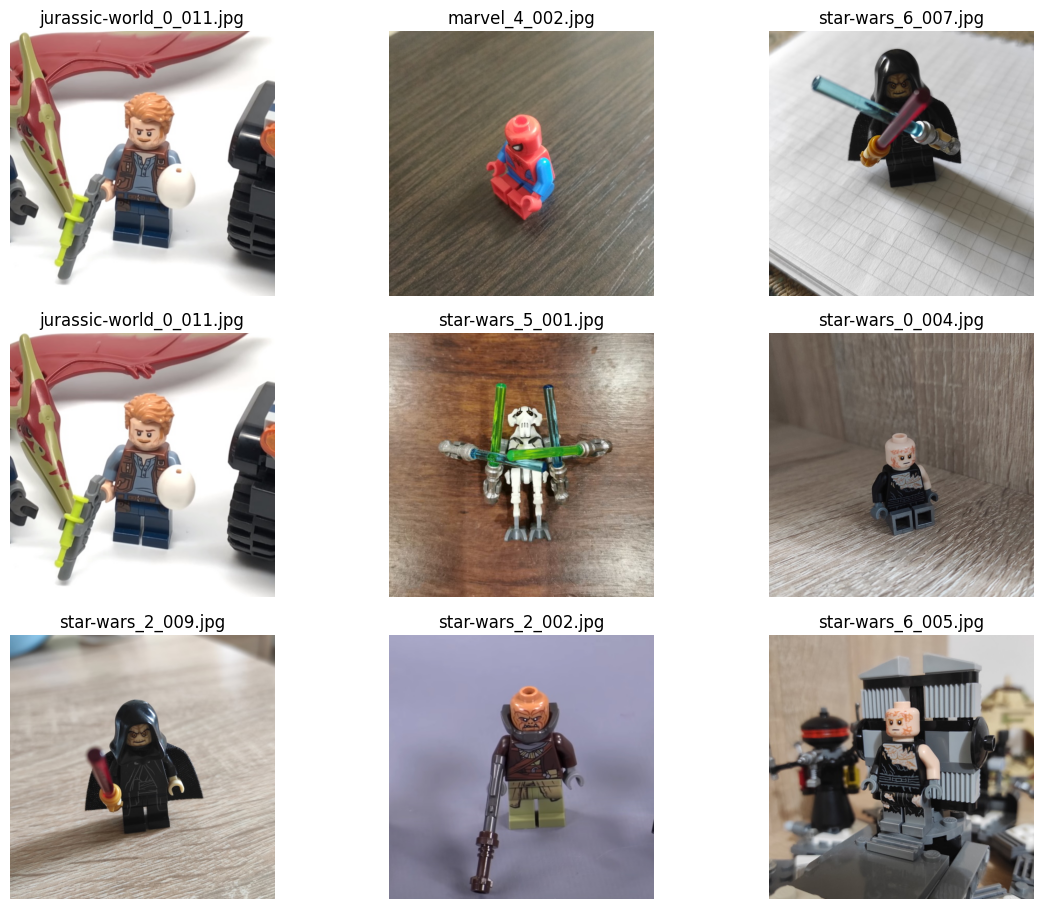

In [ ]:
PATH = '/it32-2020/izlazni_folder/'

# Spisak fajlova sa putanje PATH
images = os.listdir(PATH)

# Kreira se nova lista koja sadrži prvih 5000 elemenata iz liste images
less_images = images[0:5000:1]


# Kreiranje slikovne mreže
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

# Učitavaju se nasumično izabrane slike i prikazuju se sa naslovima na odgovarajućim osama
for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(less_images))
    img = plt.imread(PATH + less_images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(less_images[rnd_indx])
    axis.set_axis_off()

# Podesavanje pozicija slika kako bi se postigao bolji prikaz
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Podešavanje dimenzija slika



In [ ]:
# Učitavanje biblioteka i definisanje klase ImageDataset
import os
from PIL import Image
from torch.utils.data import Dataset

# Definisanje klase ImageDataset koja mora da implementira tri funkcije:
                                                                      #  __init__
                                                                      #  __getitem__
                                                                      #  __len__
class ImageDataset(Dataset):

    # __init__ -> instancira Dataset objekat
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.img_paths = self._get_img_paths() # Poziv metode za dobijanje putanja
        self.images = self._load_imgs() # Poziv metode za učitavanje slika

    # __getitem__ -> poziva transform funkciju i vraća sliku sa zadatim indeksom
    def __getitem__(self, index):
        img = self.images[index]
        if self.transform is not None:
            img = self.transform(img)
        return img

    # __len__ -> vraća broj slika u dataset-u
    def __len__(self):
        return len(self.images)

    def _get_img_paths(self):
        extensions = ['.jpg', '.jpeg', '.png']
        img_paths = []
        for subdir, dirs, files in os.walk(self.root): # Prolazak kroz direktorijum i datoteke
            for file in files:
                ext = os.path.splitext(file)[1].lower()
                if ext in extensions:
                    img_paths.append(os.path.join(subdir, file)) # Dodavanje putanje slike
        return img_paths

    def _load_imgs(self):
        images = []
        for img_path in self.img_paths: # Iteracija  kroz putanje slika
            try:
                img = Image.open(img_path) # Otvaranje slike
                images.append(img) # Dodavanje slike u listu
            except Exception as e:
                print(f"Error loading image: {img_path}")
                print(f"Error message: {str(e)}")
        return images

# Primer korišćenja
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageDataset(root='/it32-2020/izlazni_folder', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32)

images = next(iter(dataloader)) # Dobijanje narednog skupa slika iz dataloader-a
print(images.shape) # Ispis oblika (shape) niza slika



torch.Size([32, 3, 64, 64])


In [ ]:
batch_size = 32
image_size = 64

# Definisanje transformacija koje će biti primenjene na slike
random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.RandomHorizontalFlip(p=0.5),
                               transforms.RandomApply(random_transforms, p=0.2),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Kreiranje instance klase ImageDataset sa zadatom putanjom root i transformacijama transform.
dataset = ImageDataset(root='/it32-2020/izlazni_folder', transform=transform)

# Kreiranje iterabilnog dataloadera za treniranje modela.
train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size)

# Pozivanje sledece batch slike i konvertovanje u oblik pogodan za prikazivanje.
imgs = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

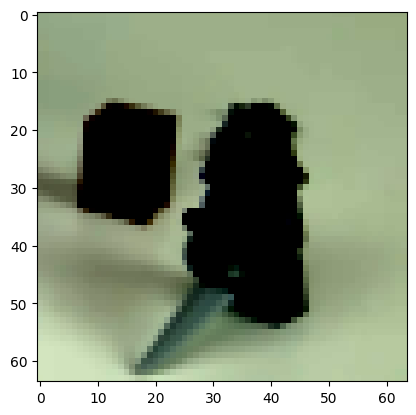

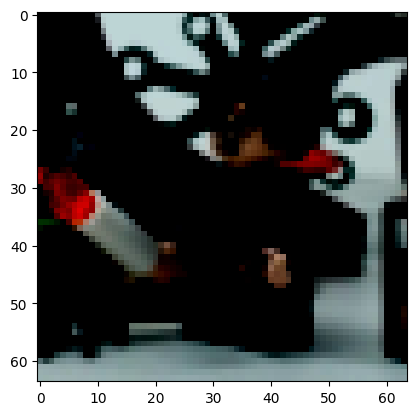

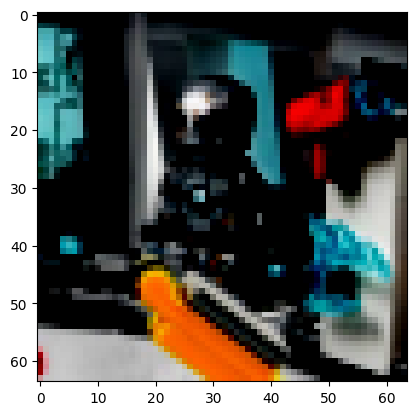

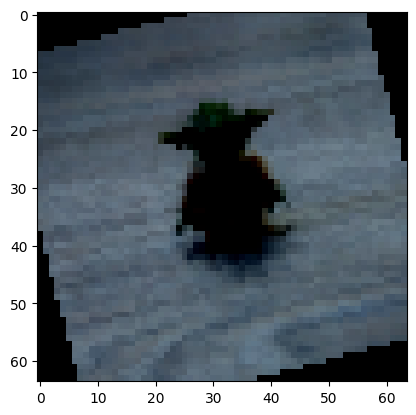

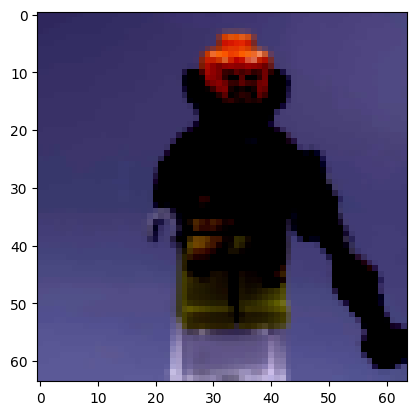

In [ ]:
# Prolazak kroz prvih 5 slika iz imgs niza i prikazivanje jedne po jedne
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

# Inicijalizacija težina

Tokom istraživanja se pokazalo da je ovo jedan od važnijih faktora za stabilno treniranje GAN (Generativnih Adverzalnih Mreža). Težine modela treba da budu centrirane oko nule (srednja vrednost = 0.0) sa blagim povećanjem standardne devijacije (stdev = 0.02). Ovo doprinosi stabilizaciji i diskriminatora i generatora tokom treninga, sprečavajući nestanak ili eksploziju gradijenata modela. Za inicijalizaciju, koriste se slučajne vrednosti u obliku slučajnog vektora šuma, čime se omogućava modelu da započne obučavanje u odgovarajućem režimu.

In [ ]:
# Uzima neuronsku mrežu m kao ulaz i inicijalizuje sve njene težine.

def weights_init(m):

# Postavljanje odgovarajuće vrednosti težina u skladu sa vrstom sloja (konvolucioni sloj ili sloj normalizacije po grupama)
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Definisanje generatora

Definisanje neuronske mreže generatora zaduženog za generisanje veštačkih slika na osnovu trening podataka, nakon treniranja modela.

Tačnije, generator u GAN (Generativna Adverzalna Mreža) metodologiji služi za generisanje novih slika iz slučajnih šumova ili latentnog prostora. Cilj generatora je da nauči kako da generiše slike koje što više liče na stvarne slike, kako bi prevazišao diskriminator i stvorio visokokvalitetne generisane slike.

Šum, odnosno nasumične neželjene varijacije u podacima.

In [ ]:
# Definiše se generator mreža G koja se sastoji od nekoliko transponovanih konvolucionih slojeva,
# slojeva normalizacije po grupama i
# aktivacione funkcije ReLU.
class G(nn.Module):
    def __init__(self):
        super(G, self).__init__()
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )

    def forward(self, input):
        output = self.main(input)
        return output

# Kreiranje generatora
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Definisanje diskriminatora

Definisanje neuronske mreže diskriminatora zaduženog za identifikovanje veštački kreiranih slika od strane generatora i njihovo razlikovanje od pravih podataka tj. slika unešenih u projekat.

Tačnije, diskriminator u GAN metodologiji služi za razlikovanje između stvarnih i generisanih slika.




In [ ]:
# Definiše se diskriminator mreža D koja se sastoji od konvolucionih slojeva,
# slojeva normalizacije po grupama,
# aktivacione funkcije LeakyReLU i
# sigmoidalne aktivacione funkcije.
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1)

# Kreiranje diskriminatora
netD = D()
netD.apply(weights_init)


D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [ ]:
# Ukratko, ovaj kod definiše generativnu mrežu (generator) koja generiše slike iz latentnog vektora,
#  i diskriminatornu mrežu (diskriminator) koja klasifikuje slike na osnovu stvarnosti ili lažnosti.

class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()

        self.nz = nz
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0),
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()

        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)

        return out.view(-1, 1)

# Kreiranje optimizer-a

Uz preporučene parametre (learning_rate=0.0002, beta1=0.5) iz zvaničnog istraživanja. Određivanje težinskih parametara za treniranje modela Potrebno je odabrati odgovarajući optimizator za ažuriranje težina generatora i diskriminatora tokom treniranja.

In [ ]:
EPOCH = 5
LR = 0.0002
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

Ovaj deo koda organizuje proces treniranja GAN modela. Prvo se kreira direktorijum za čuvanje rezultata generisanja slika. Zatim se prolazi kroz iteracije treninga u toku više epoha.

**netD** je diskriminator mreža (deklarisana prethodno)

**criterion** predstavlja funkciju gubitka

**optimizerD** je optimizator za ažuriranje težina diskriminatora

**optimizerG** je optimizator za ažuriranje težina generatora

U svakoj epohi i za svaki paket podataka iz dataloader:

Diskriminator (netD) se ažurira sa pravim slikama (realnim slikama) kako bi naučio da razlikuje stvarne slike od generisanih. Gubitak se računa i propagira unazad. Zatim se generiše buka (noise) i koristi se generator (netG) kako bi se dobile generisane slike. Diskriminator se ažurira sa ovim lažnim slikama. Gubitak se računa i propagira unazad. Težine diskriminatora i generatora se ažuriraju koristeći optimizatore. Ispisuje se trenutni gubitak za diskriminator i generator u toku ove iteracije. Povremeno, nakon određenog broja iteracija (if i % 100 == 0), prave slike se čuvaju u direktorijumu pod nazivom "real_samples.png", a takođe se generišu i čuvaju lažne slike koristeći generator u trenutnom stanju i nazivom "fake_samples_epoch_X.png", gde je X trenutna epoha.

Ovaj deo koda omogućava iterativno poboljšanje performansi GAN-a kroz više epoha obučavanja, usklađujući težine diskriminatora i generatora u skladu sa ciljem postizanja što realističnijih generisanih slika.

In [ ]:
import os

result_dir = "/it32-2020/results"
os.makedirs(result_dir, exist_ok=True)


for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()

        real = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)

        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)

        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()

        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % result_dir, normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % (result_dir, epoch), normalize=True)




[0/5][0/4] Loss_D: 1.5357; Loss_G: 4.3754
[0/5][1/4] Loss_D: 1.2320; Loss_G: 6.2303
[0/5][2/4] Loss_D: 0.5799; Loss_G: 6.5567
[0/5][3/4] Loss_D: 0.3075; Loss_G: 5.9908
[1/5][0/4] Loss_D: 0.3338; Loss_G: 6.2336
[1/5][1/4] Loss_D: 0.3351; Loss_G: 7.2242
[1/5][2/4] Loss_D: 0.2675; Loss_G: 6.7289
[1/5][3/4] Loss_D: 0.2375; Loss_G: 7.4224
[2/5][0/4] Loss_D: 0.2559; Loss_G: 8.2672
[2/5][1/4] Loss_D: 0.1693; Loss_G: 7.8768
[2/5][2/4] Loss_D: 0.2467; Loss_G: 6.7577
[2/5][3/4] Loss_D: 0.4335; Loss_G: 9.0871
[3/5][0/4] Loss_D: 0.0945; Loss_G: 7.9046
[3/5][1/4] Loss_D: 0.0787; Loss_G: 7.4969
[3/5][2/4] Loss_D: 0.2019; Loss_G: 10.4893
[3/5][3/4] Loss_D: 0.0338; Loss_G: 9.0929
[4/5][0/4] Loss_D: 0.0977; Loss_G: 6.9057
[4/5][1/4] Loss_D: 0.4615; Loss_G: 14.9606
[4/5][2/4] Loss_D: 0.4780; Loss_G: 12.0630
[4/5][3/4] Loss_D: 0.0204; Loss_G: 7.6312


# Definisanje learning rate-a
i broja epoha prilikom treniranja modela Defisanje labele za prave i lažne fotografije koje će se koristiti pri izračunavanju diskriminatora i generatora.

Definisanje learning rate-a i broja epoha je važno u GAN-u kako bi se postigao dobar balans između brzine učenja i stabilnosti, i kako bi se model pravilno prilagodio podacima bez prenaučenosti. Ove vrednosti treba pažljivo odabrati eksperimentalno, uz isprobavanje različitih vrednosti i praćenje performansi modela tokom treninga.


In [ ]:
batch_size = 32
LR_G = 0.0002
LR_D = 0.0002

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

In [ ]:

def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    plt.show()
    plt.close()

# **Treniranje modela.**

Ovaj deo koda predstavlja unapređeni postupak treniranja Generativnih Adverzalnih Mreža (GAN) tokom više epoha. Ključni koraci se odvijaju za svaku epohu treninga:

- Za svaki paket realnih slika (`real_images`) iz trening dataloadera:
  - Ažurira se diskriminator (`netD`):
    - Postavlja se gradijent na nulu.
    - Realne slike se prebacuju na uređaj za izračunavanje (GPU).
    - Generišu se ciljne oznake (`labels`) za stvarne slike (pune jedinice).
    - Diskriminator procenjuje stvarne slike i računa grešku sa stvarnim oznakama.
    - Gradijenti se propagiraju unazad i računa se prosečna ocena stvarnih slika (`D_x`).
    - Generišu se slučajni šumovi (`noise`) i koriste se za generisanje lažnih slika pomoću generatora (`netG`).
    - Ciljne oznake se postavljaju na vrednost oznake lažnih slika.
    - Diskriminator procenjuje lažne slike i računa grešku sa lažnim oznakama.
    - Gradijenti se propagiraju unazad i računa se prosečna ocena lažnih slika (`D_G_z1`).
    - Ukupna greška diskriminatora se računa kao suma grešaka sa stvarnim i lažnim slikama.
    - Optimizacija težina diskriminatora se izvodi.
  - Ažurira se generator (`netG`):
    - Postavlja se gradijent generatora na nulu.
    - Ciljne oznake se postavljaju na vrednost oznake stvarnih slika.
    - Diskriminator procenjuje lažne slike koje je generisao generator.
    - Računa se greška generatora sa stvarnim oznakama.
    - Gradijenti se propagiraju unazad i računa se prosečna ocena generisanih slika (`D_G_z2`).
    - Optimizacija težina generatora se izvodi.
  - Gubitci za svaku iteraciju se beleže u listama `G_losses` i `D_losses`.
  - Nakon polovine iteracija u epohi, ispisuje se trenutna gubitak i ocene stvarnih i generisanih slika za tu epohu.
- Nakon završetka epohe:
  - Prikaži dijagram gubitaka (`plot_loss`).
  - Resetuj liste za gubitke (`G_losses` i `D_losses`).
  - Ako je trenutna epoha deljiva sa 10, prikaži generisane slike (`show_generated_img`).
  - Zabeleži vreme trajanja ove epohe u `epoch_time`.

Ovaj kod omogućava detaljno praćenje i ažuriranje gubitaka tokom treninga GAN modela tokom više epoha, te prikazuje rezultate i vreme trajanja svake epohe.

<ipython-input-45-9da94dbbdd1a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ii, real_images in tqdm(enumerate(train_loader), total=len(train_loader)):


  0%|          | 0/4 [00:00<?, ?it/s]

[1/100][2/4] Loss_D: 1.9901 Loss_G: 1.2633 D(x): 0.5820 D(G(z)): 0.7426 / 0.2606
[1/100][4/4] Loss_D: 1.8087 Loss_G: 1.8516 D(x): 0.6111 D(G(z)): 0.6900 / 0.1373


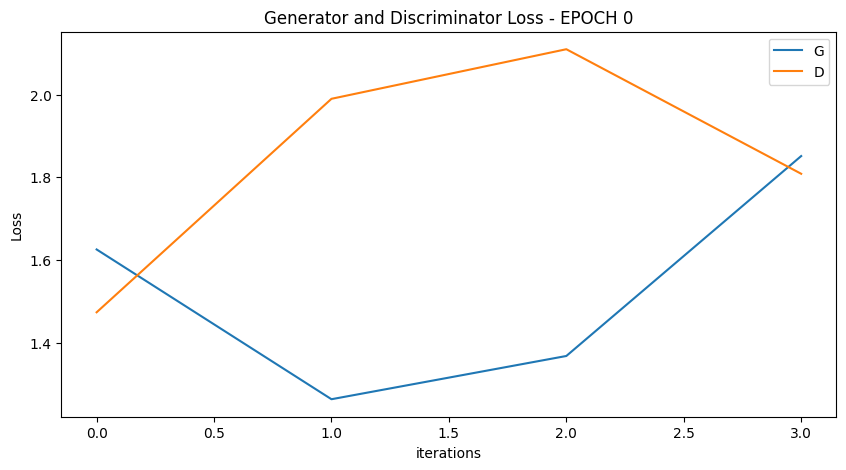

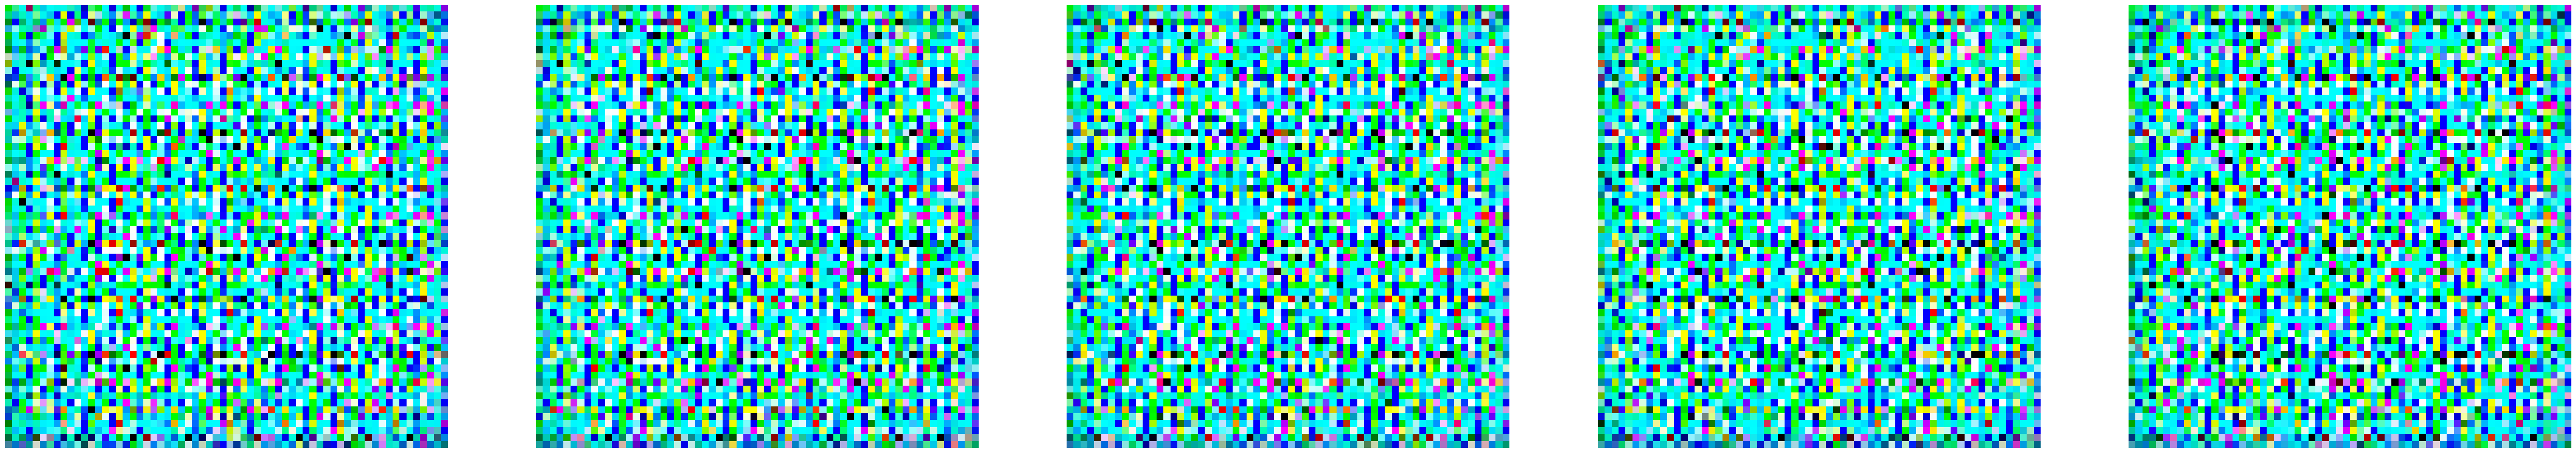

  0%|          | 0/4 [00:00<?, ?it/s]

[2/100][2/4] Loss_D: 1.6590 Loss_G: 2.3789 D(x): 0.6321 D(G(z)): 0.6607 / 0.0745
[2/100][4/4] Loss_D: 1.0156 Loss_G: 3.1119 D(x): 0.5574 D(G(z)): 0.2911 / 0.0322


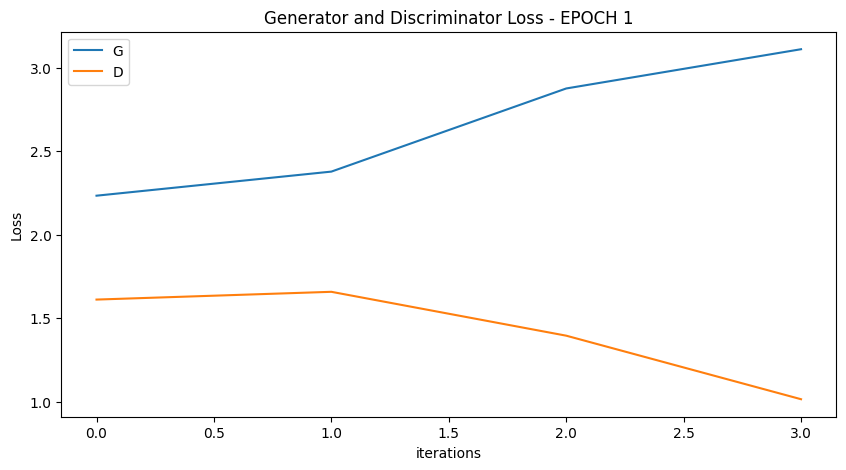

  0%|          | 0/4 [00:00<?, ?it/s]

[3/100][2/4] Loss_D: 1.1075 Loss_G: 3.3675 D(x): 0.6113 D(G(z)): 0.3868 / 0.0244
[3/100][4/4] Loss_D: 0.9467 Loss_G: 3.9163 D(x): 0.6418 D(G(z)): 0.2798 / 0.0133


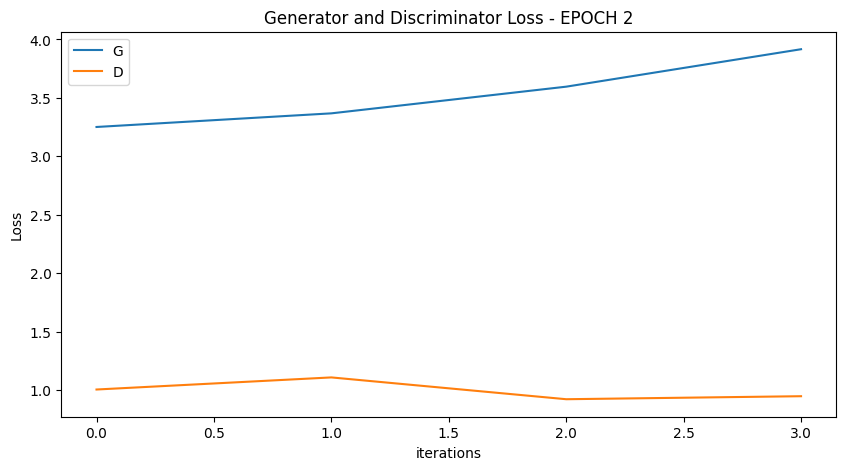

  0%|          | 0/4 [00:00<?, ?it/s]

[4/100][2/4] Loss_D: 0.8536 Loss_G: 3.8865 D(x): 0.6650 D(G(z)): 0.2571 / 0.0138
[4/100][4/4] Loss_D: 0.6465 Loss_G: 4.1512 D(x): 0.7619 D(G(z)): 0.1893 / 0.0100


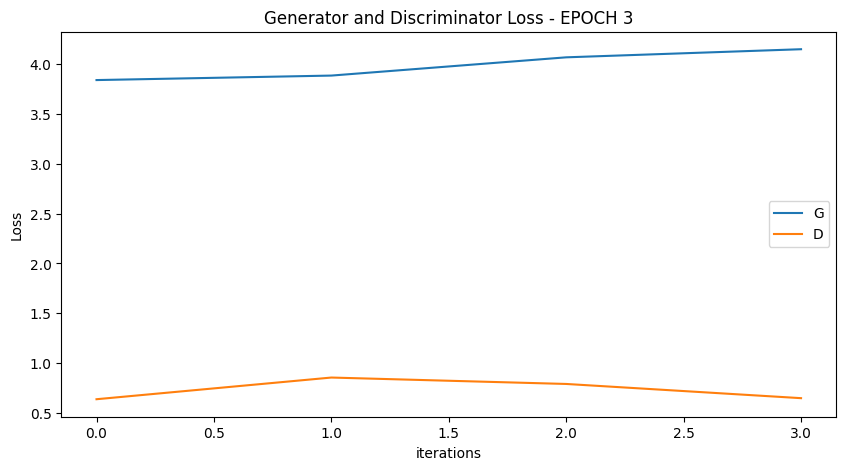

  0%|          | 0/4 [00:00<?, ?it/s]

[5/100][2/4] Loss_D: 0.6788 Loss_G: 4.1105 D(x): 0.7329 D(G(z)): 0.1748 / 0.0105
[5/100][4/4] Loss_D: 0.6821 Loss_G: 4.0700 D(x): 0.6902 D(G(z)): 0.1386 / 0.0110


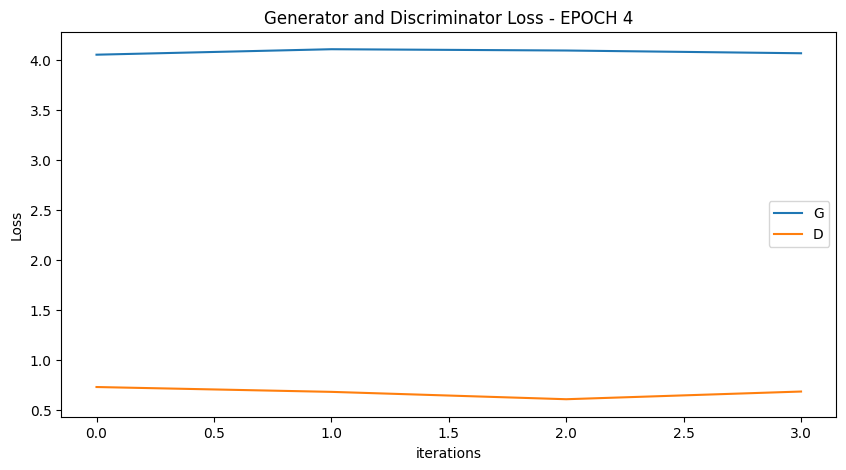

  0%|          | 0/4 [00:00<?, ?it/s]

[6/100][2/4] Loss_D: 0.5124 Loss_G: 4.0978 D(x): 0.7786 D(G(z)): 0.0896 / 0.0106
[6/100][4/4] Loss_D: 0.5036 Loss_G: 4.4522 D(x): 0.8317 D(G(z)): 0.1286 / 0.0072


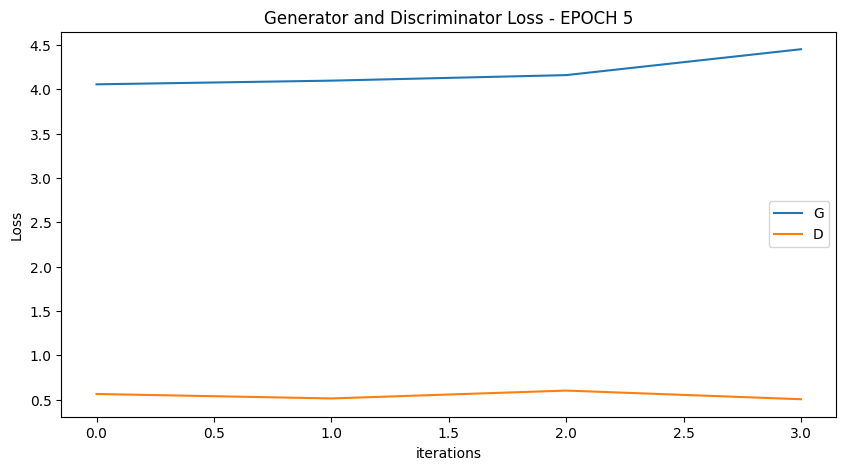

  0%|          | 0/4 [00:00<?, ?it/s]

[7/100][2/4] Loss_D: 0.4718 Loss_G: 4.0438 D(x): 0.8273 D(G(z)): 0.0927 / 0.0113
[7/100][4/4] Loss_D: 0.5304 Loss_G: 4.3029 D(x): 0.7815 D(G(z)): 0.0882 / 0.0084


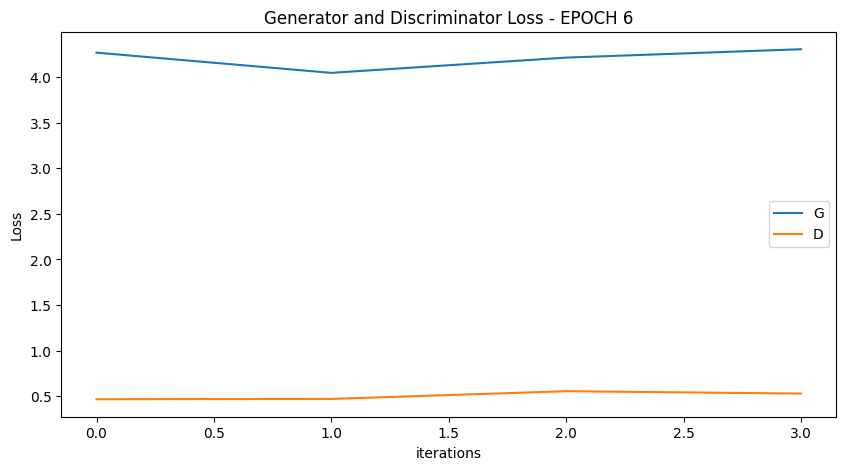

  0%|          | 0/4 [00:00<?, ?it/s]

[8/100][2/4] Loss_D: 0.4640 Loss_G: 4.3125 D(x): 0.8380 D(G(z)): 0.0942 / 0.0084
[8/100][4/4] Loss_D: 0.4445 Loss_G: 4.2980 D(x): 0.8445 D(G(z)): 0.0694 / 0.0085


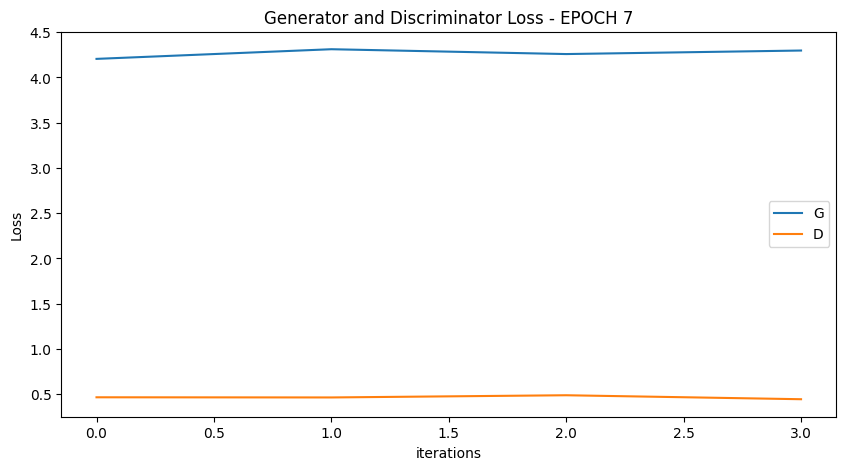

  0%|          | 0/4 [00:00<?, ?it/s]

[9/100][2/4] Loss_D: 0.4200 Loss_G: 4.3599 D(x): 0.8455 D(G(z)): 0.0646 / 0.0079
[9/100][4/4] Loss_D: 0.4500 Loss_G: 4.3216 D(x): 0.8033 D(G(z)): 0.0688 / 0.0083


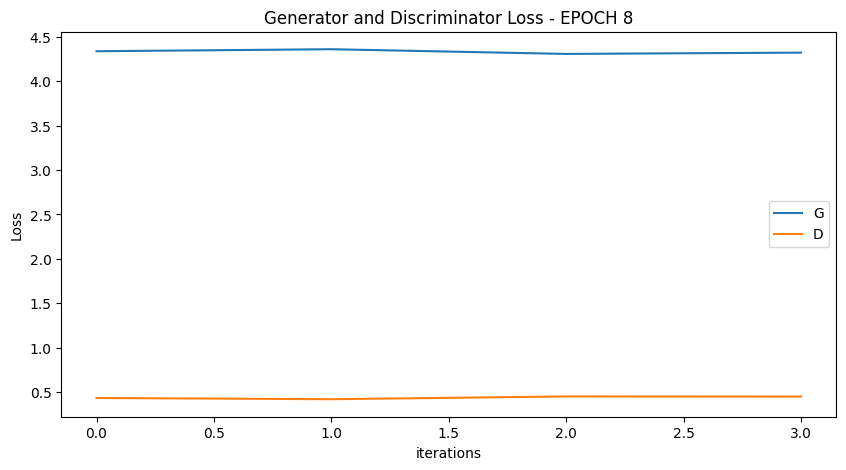

  0%|          | 0/4 [00:00<?, ?it/s]

[10/100][2/4] Loss_D: 0.4280 Loss_G: 4.5303 D(x): 0.8434 D(G(z)): 0.0579 / 0.0065
[10/100][4/4] Loss_D: 0.4010 Loss_G: 4.5690 D(x): 0.8680 D(G(z)): 0.0515 / 0.0063


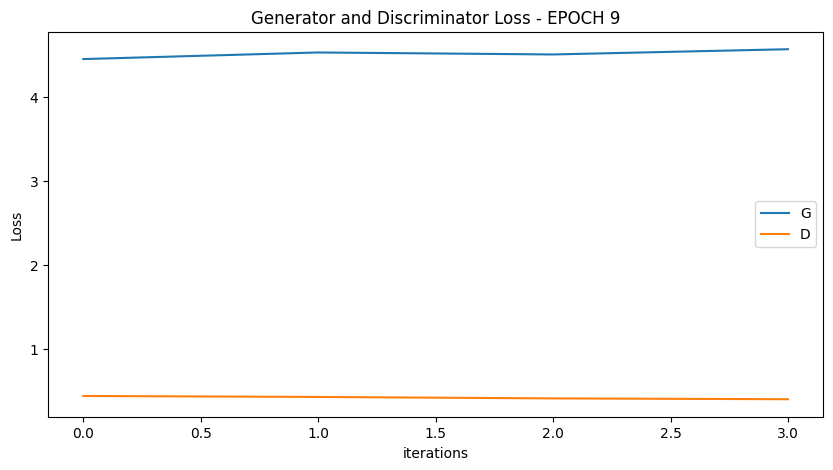

  0%|          | 0/4 [00:00<?, ?it/s]

[11/100][2/4] Loss_D: 0.4152 Loss_G: 4.4300 D(x): 0.8033 D(G(z)): 0.0340 / 0.0073
[11/100][4/4] Loss_D: 0.4060 Loss_G: 4.6809 D(x): 0.8714 D(G(z)): 0.0579 / 0.0055


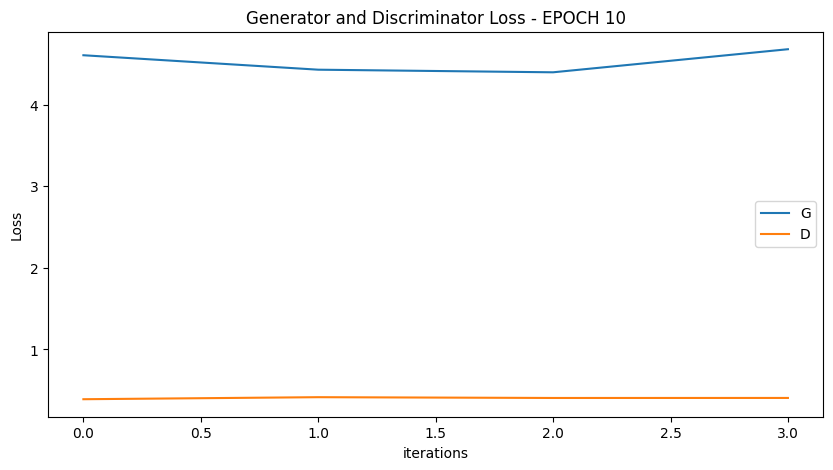

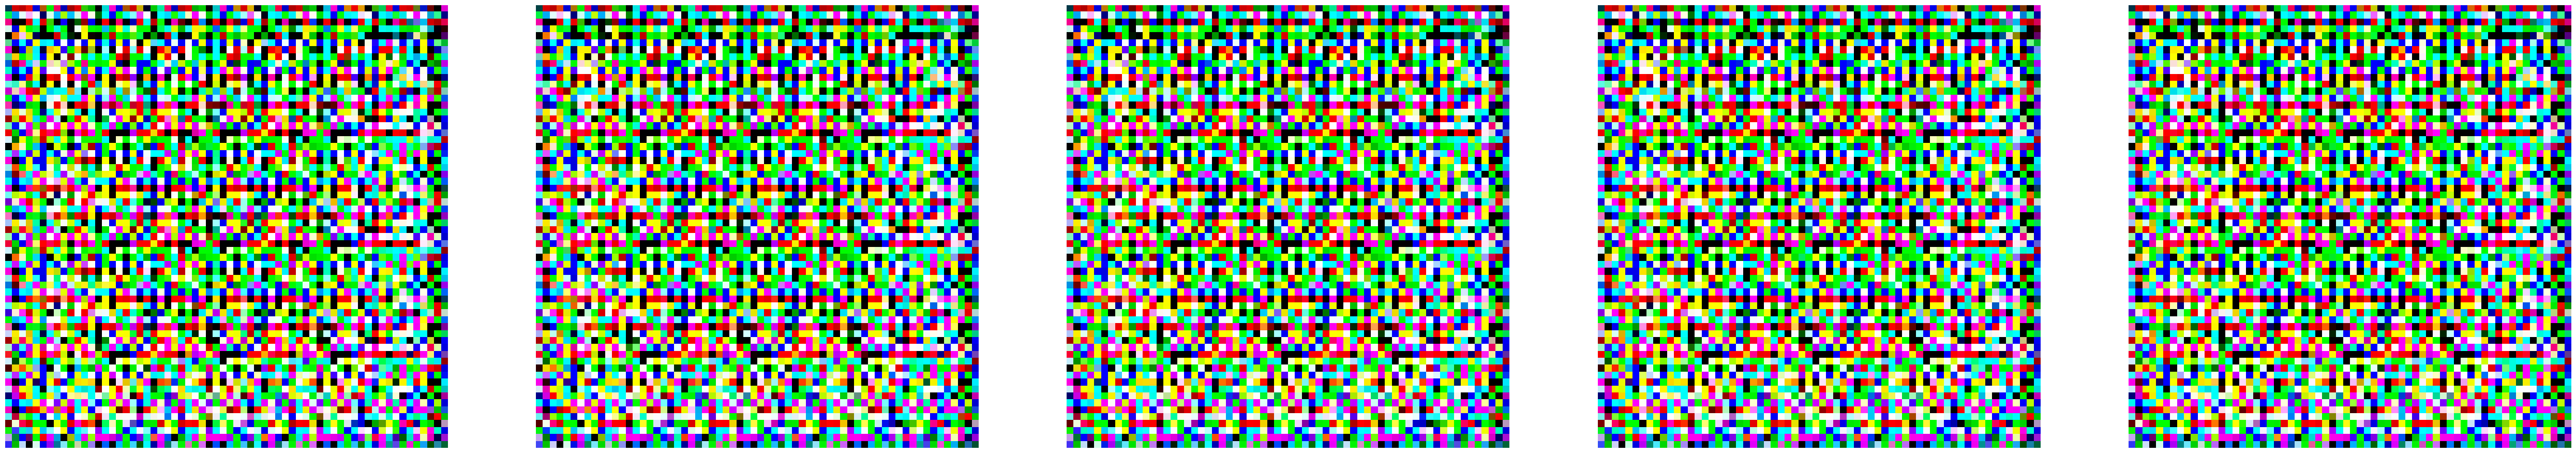

  0%|          | 0/4 [00:00<?, ?it/s]

[12/100][2/4] Loss_D: 0.4023 Loss_G: 4.4542 D(x): 0.8218 D(G(z)): 0.0324 / 0.0071
[12/100][4/4] Loss_D: 0.3940 Loss_G: 4.5886 D(x): 0.8434 D(G(z)): 0.0428 / 0.0061


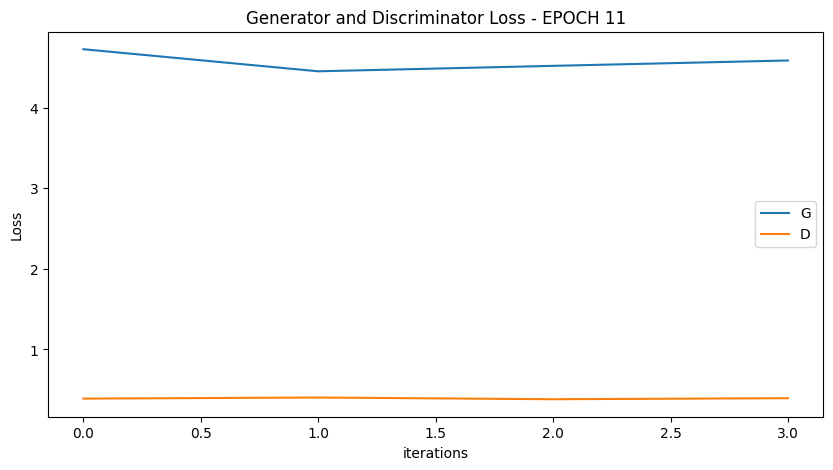

  0%|          | 0/4 [00:00<?, ?it/s]

[13/100][2/4] Loss_D: 0.4304 Loss_G: 5.3035 D(x): 0.8649 D(G(z)): 0.0837 / 0.0028
[13/100][4/4] Loss_D: 0.3821 Loss_G: 4.8250 D(x): 0.8569 D(G(z)): 0.0371 / 0.0047


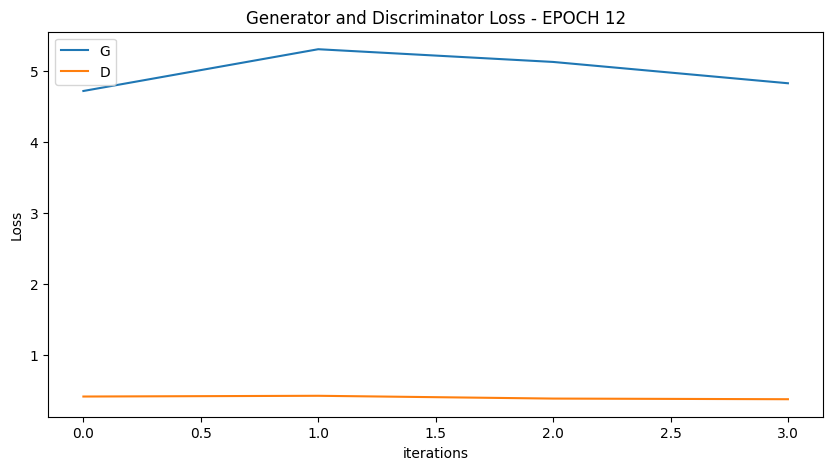

  0%|          | 0/4 [00:00<?, ?it/s]

[14/100][2/4] Loss_D: 0.4353 Loss_G: 5.6688 D(x): 0.8719 D(G(z)): 0.0919 / 0.0018
[14/100][4/4] Loss_D: 0.4016 Loss_G: 5.3184 D(x): 0.9151 D(G(z)): 0.0618 / 0.0027


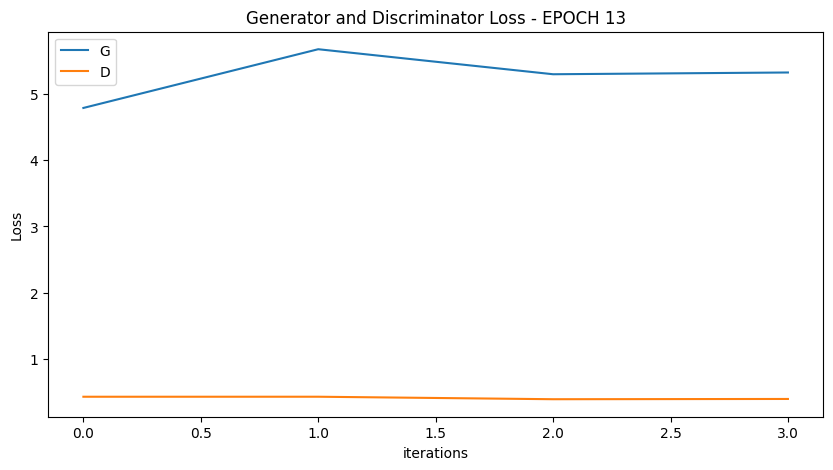

  0%|          | 0/4 [00:00<?, ?it/s]

[15/100][2/4] Loss_D: 0.4593 Loss_G: 5.4818 D(x): 0.7901 D(G(z)): 0.0750 / 0.0023
[15/100][4/4] Loss_D: 0.4083 Loss_G: 5.0549 D(x): 0.8218 D(G(z)): 0.0403 / 0.0037


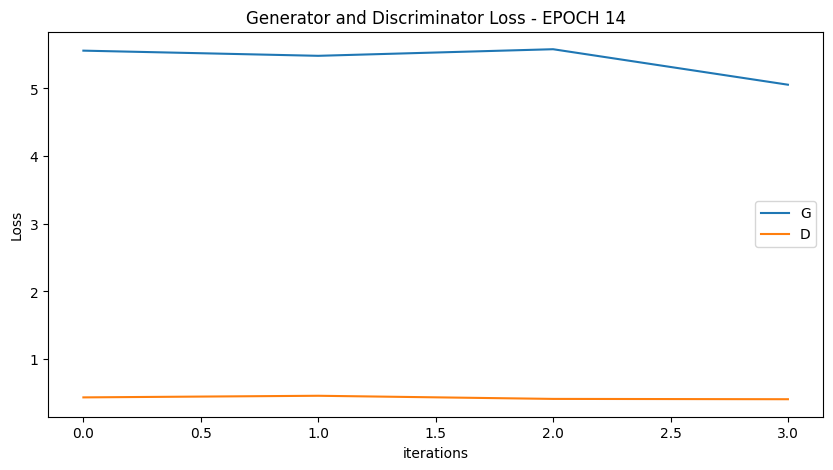

  0%|          | 0/4 [00:00<?, ?it/s]

[16/100][2/4] Loss_D: 0.4387 Loss_G: 4.9816 D(x): 0.7901 D(G(z)): 0.0546 / 0.0040
[16/100][4/4] Loss_D: 0.3895 Loss_G: 5.0113 D(x): 0.8403 D(G(z)): 0.0317 / 0.0038


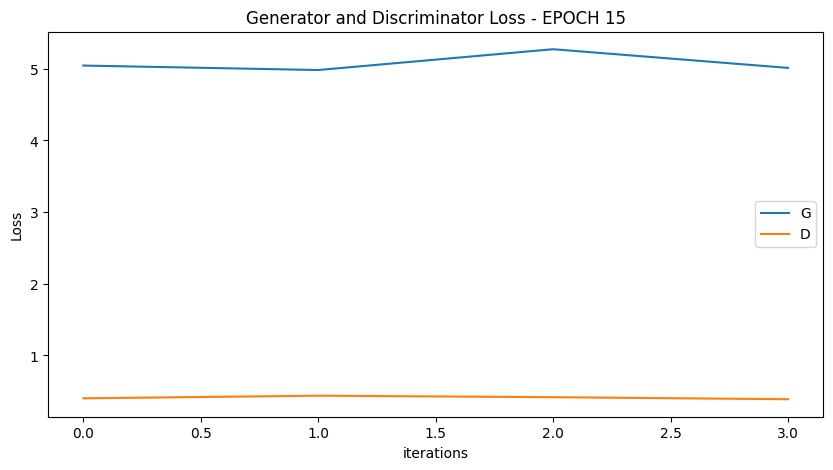

  0%|          | 0/4 [00:00<?, ?it/s]

[17/100][2/4] Loss_D: 0.3984 Loss_G: 5.1678 D(x): 0.8711 D(G(z)): 0.0539 / 0.0032
[17/100][4/4] Loss_D: 0.3935 Loss_G: 5.0991 D(x): 0.8628 D(G(z)): 0.0424 / 0.0035


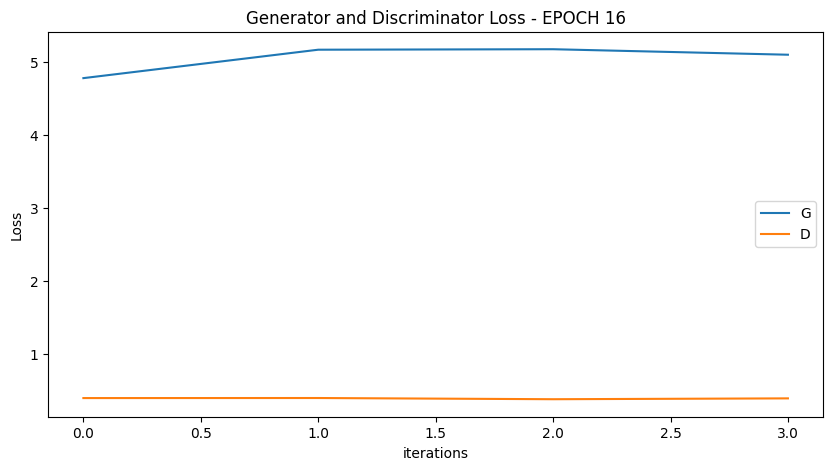

  0%|          | 0/4 [00:00<?, ?it/s]

[18/100][2/4] Loss_D: 0.4558 Loss_G: 5.9769 D(x): 0.8413 D(G(z)): 0.0948 / 0.0013
[18/100][4/4] Loss_D: 0.3867 Loss_G: 5.0460 D(x): 0.8886 D(G(z)): 0.0430 / 0.0037


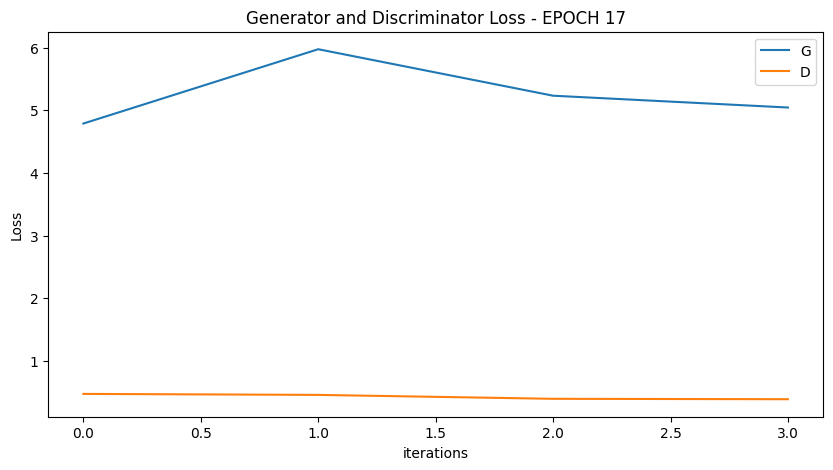

  0%|          | 0/4 [00:00<?, ?it/s]

[19/100][2/4] Loss_D: 0.4345 Loss_G: 4.6260 D(x): 0.8166 D(G(z)): 0.0590 / 0.0059
[19/100][4/4] Loss_D: 0.4075 Loss_G: 5.3338 D(x): 0.9009 D(G(z)): 0.0568 / 0.0027


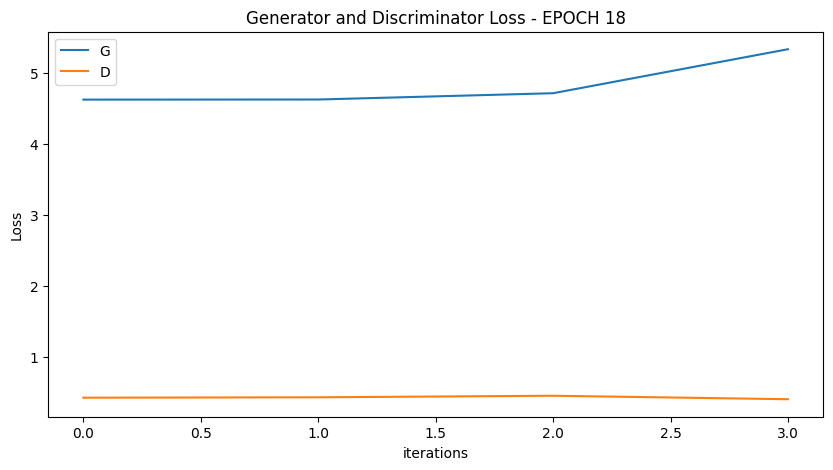

  0%|          | 0/4 [00:00<?, ?it/s]

[20/100][2/4] Loss_D: 0.4644 Loss_G: 4.6858 D(x): 0.7761 D(G(z)): 0.0611 / 0.0055
[20/100][4/4] Loss_D: 0.4862 Loss_G: 5.4102 D(x): 0.8444 D(G(z)): 0.0947 / 0.0025


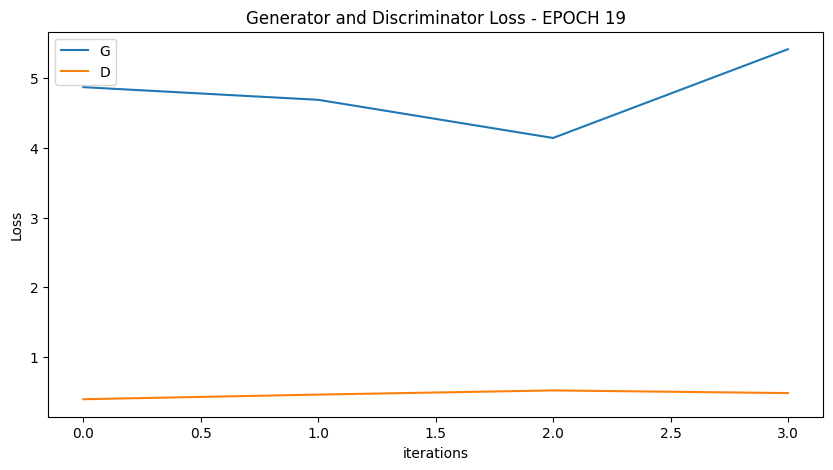

  0%|          | 0/4 [00:00<?, ?it/s]

[21/100][2/4] Loss_D: 0.3833 Loss_G: 4.6002 D(x): 0.8785 D(G(z)): 0.0248 / 0.0061
[21/100][4/4] Loss_D: 0.4621 Loss_G: 3.9349 D(x): 0.7948 D(G(z)): 0.0349 / 0.0127


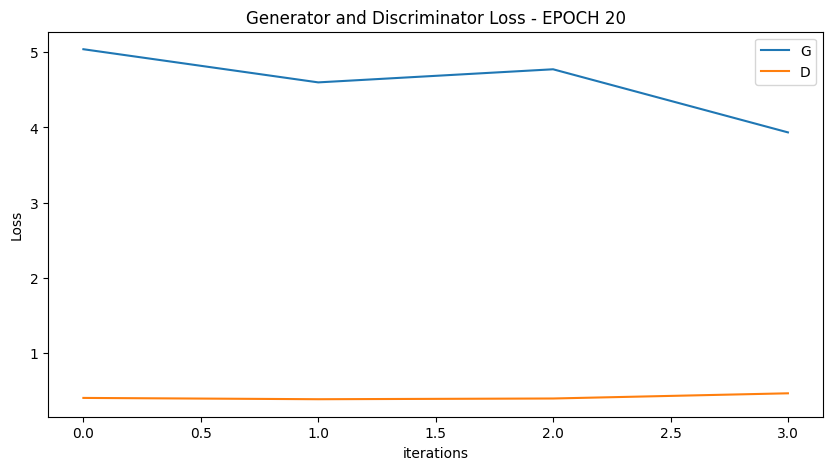

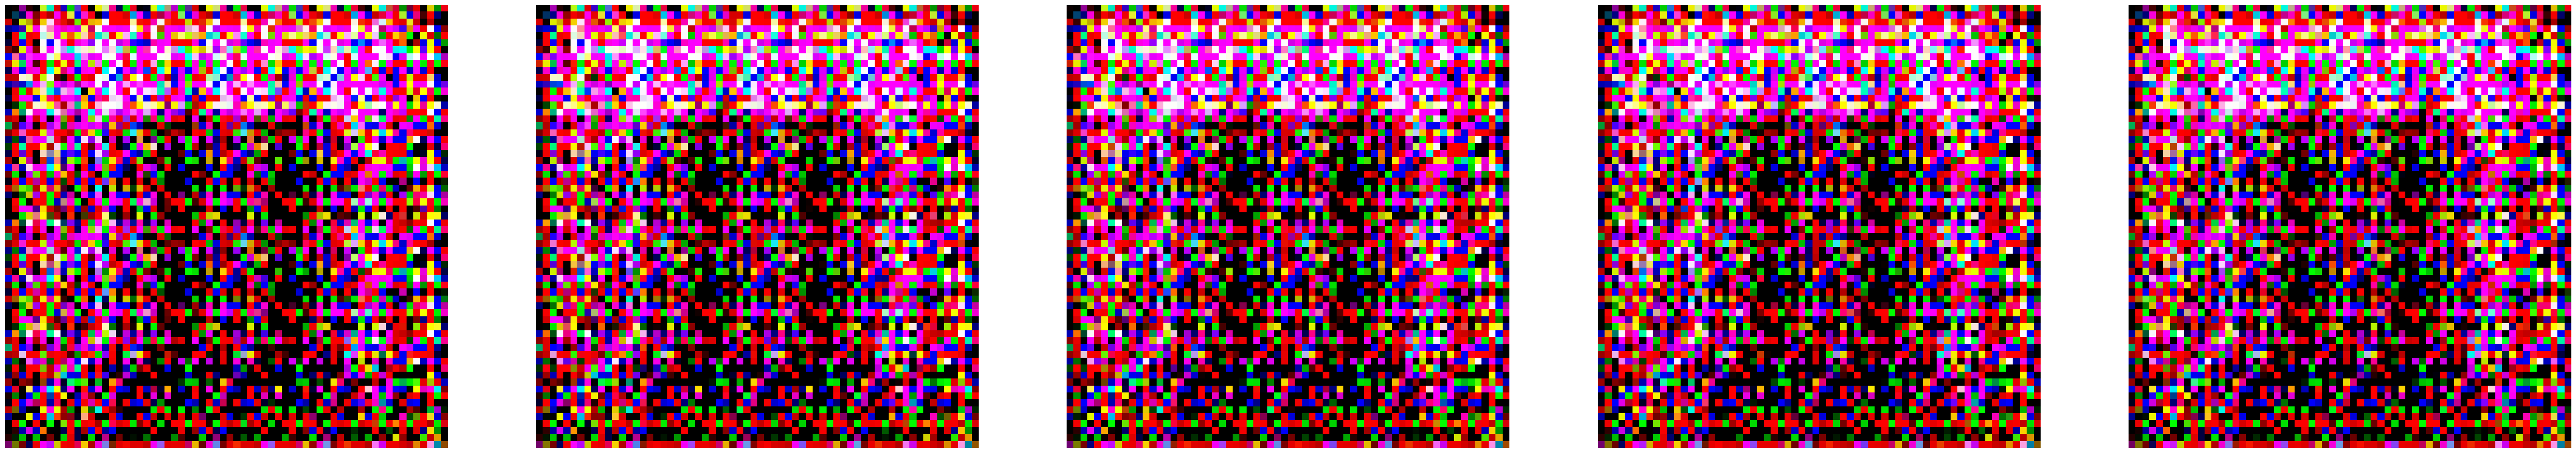

  0%|          | 0/4 [00:00<?, ?it/s]

[22/100][2/4] Loss_D: 0.4307 Loss_G: 4.4274 D(x): 0.7852 D(G(z)): 0.0143 / 0.0074
[22/100][4/4] Loss_D: 0.4317 Loss_G: 5.4669 D(x): 0.8922 D(G(z)): 0.0840 / 0.0023


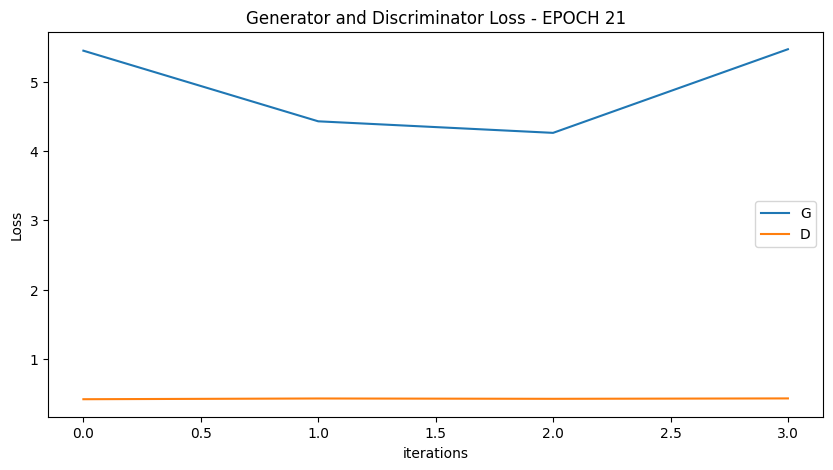

  0%|          | 0/4 [00:00<?, ?it/s]

[23/100][2/4] Loss_D: 0.4611 Loss_G: 4.3119 D(x): 0.8037 D(G(z)): 0.0736 / 0.0084
[23/100][4/4] Loss_D: 0.4927 Loss_G: 3.3754 D(x): 0.7837 D(G(z)): 0.0283 / 0.0238


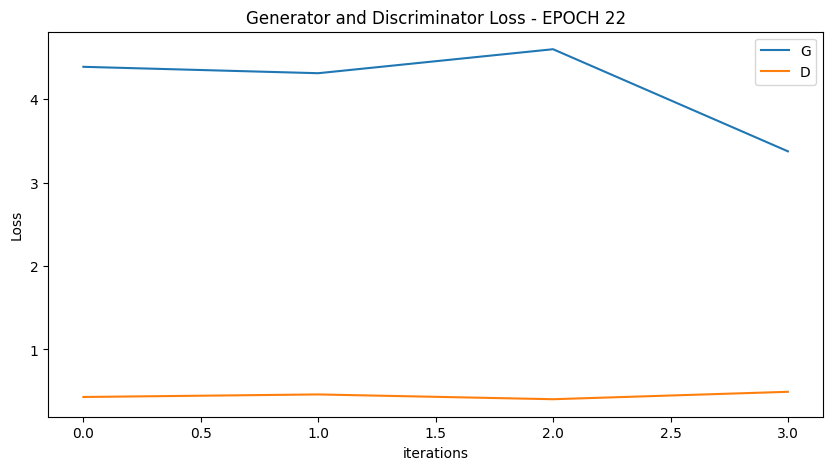

  0%|          | 0/4 [00:00<?, ?it/s]

[24/100][2/4] Loss_D: 0.4144 Loss_G: 5.1748 D(x): 0.7934 D(G(z)): 0.0108 / 0.0032
[24/100][4/4] Loss_D: 0.5178 Loss_G: 6.5647 D(x): 0.9238 D(G(z)): 0.1523 / 0.0007


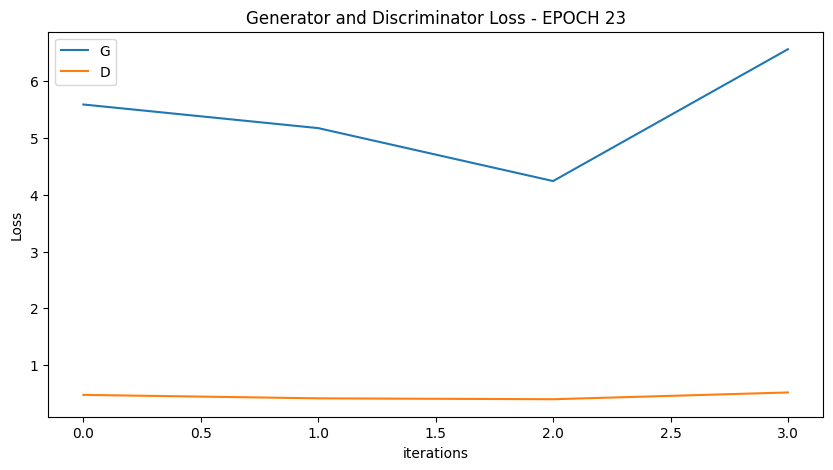

  0%|          | 0/4 [00:00<?, ?it/s]

[25/100][2/4] Loss_D: 0.4937 Loss_G: 4.2863 D(x): 0.8788 D(G(z)): 0.1097 / 0.0088
[25/100][4/4] Loss_D: 0.5072 Loss_G: 4.7060 D(x): 0.8422 D(G(z)): 0.0923 / 0.0056


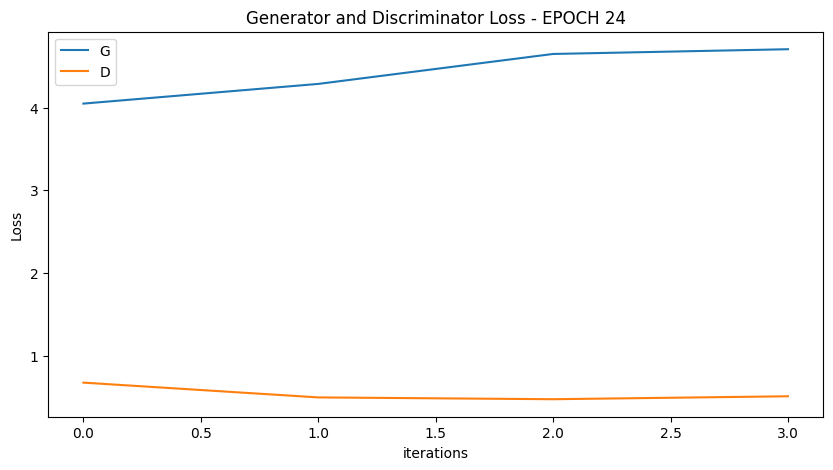

  0%|          | 0/4 [00:00<?, ?it/s]

[26/100][2/4] Loss_D: 0.5486 Loss_G: 4.6046 D(x): 0.7637 D(G(z)): 0.0309 / 0.0064
[26/100][4/4] Loss_D: 0.5370 Loss_G: 6.1525 D(x): 0.8364 D(G(z)): 0.1383 / 0.0011


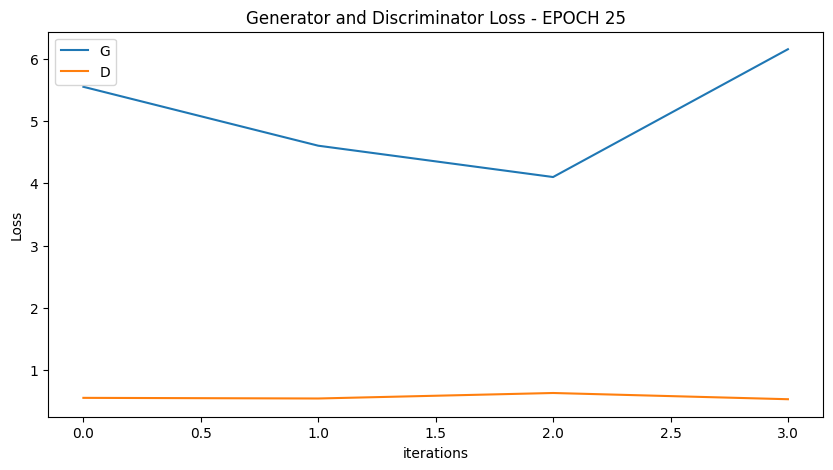

  0%|          | 0/4 [00:00<?, ?it/s]

[27/100][2/4] Loss_D: 0.6423 Loss_G: 3.7739 D(x): 0.6769 D(G(z)): 0.0077 / 0.0240
[27/100][4/4] Loss_D: 0.4619 Loss_G: 4.3553 D(x): 0.8285 D(G(z)): 0.0400 / 0.0090


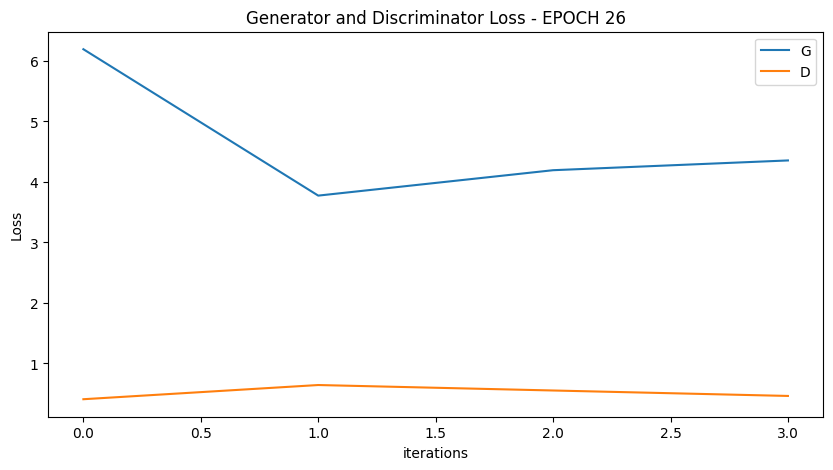

  0%|          | 0/4 [00:00<?, ?it/s]

[28/100][2/4] Loss_D: 0.4258 Loss_G: 4.1683 D(x): 0.9175 D(G(z)): 0.0411 / 0.0105
[28/100][4/4] Loss_D: 0.4710 Loss_G: 4.0976 D(x): 0.8848 D(G(z)): 0.0725 / 0.0134


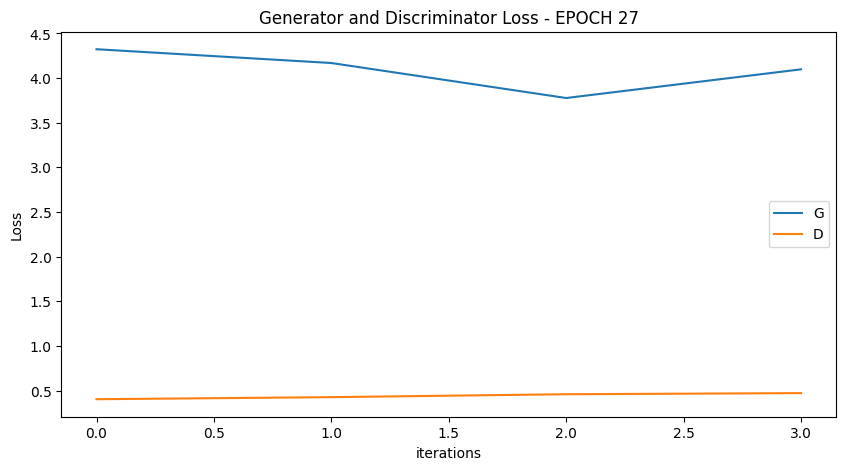

  0%|          | 0/4 [00:00<?, ?it/s]

[29/100][2/4] Loss_D: 0.6399 Loss_G: 3.6595 D(x): 0.7426 D(G(z)): 0.1527 / 0.0216
[29/100][4/4] Loss_D: 0.7100 Loss_G: 3.9499 D(x): 0.7233 D(G(z)): 0.1984 / 0.0184


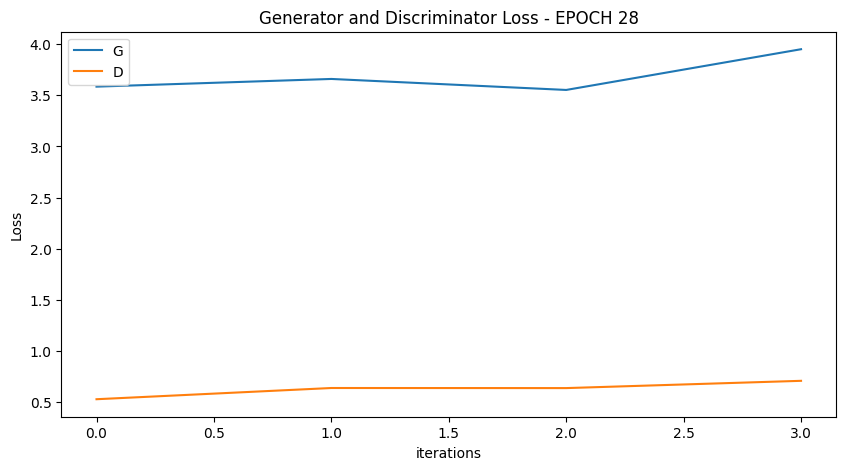

  0%|          | 0/4 [00:00<?, ?it/s]

[30/100][2/4] Loss_D: 1.2550 Loss_G: 1.2184 D(x): 0.3904 D(G(z)): 0.0638 / 0.3349
[30/100][4/4] Loss_D: 1.1170 Loss_G: 2.8746 D(x): 0.3948 D(G(z)): 0.0864 / 0.0789


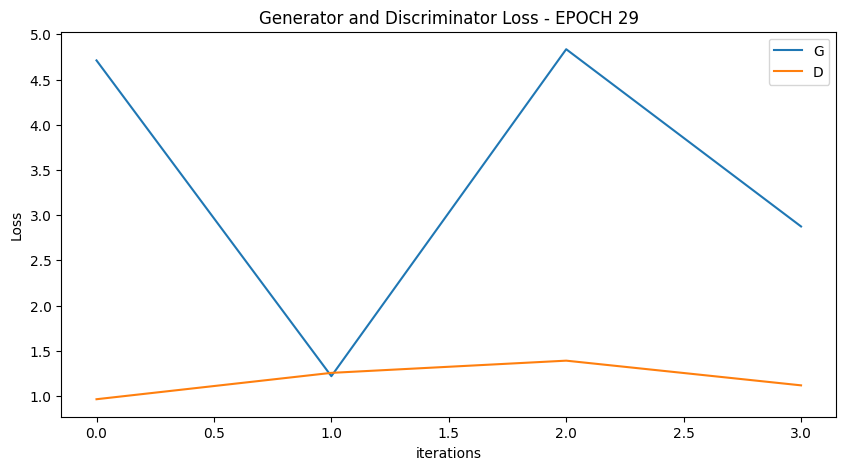

  0%|          | 0/4 [00:00<?, ?it/s]

[31/100][2/4] Loss_D: 0.8711 Loss_G: 3.0167 D(x): 0.7658 D(G(z)): 0.2858 / 0.0610
[31/100][4/4] Loss_D: 1.0623 Loss_G: 2.6763 D(x): 0.6367 D(G(z)): 0.2873 / 0.0743


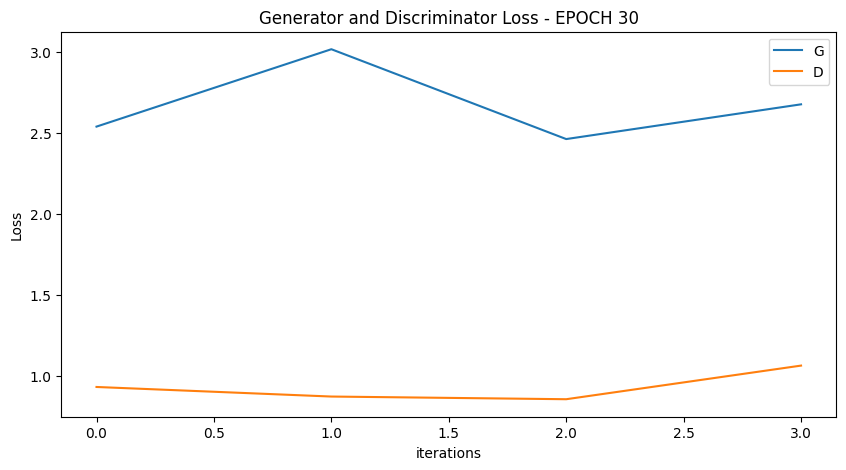

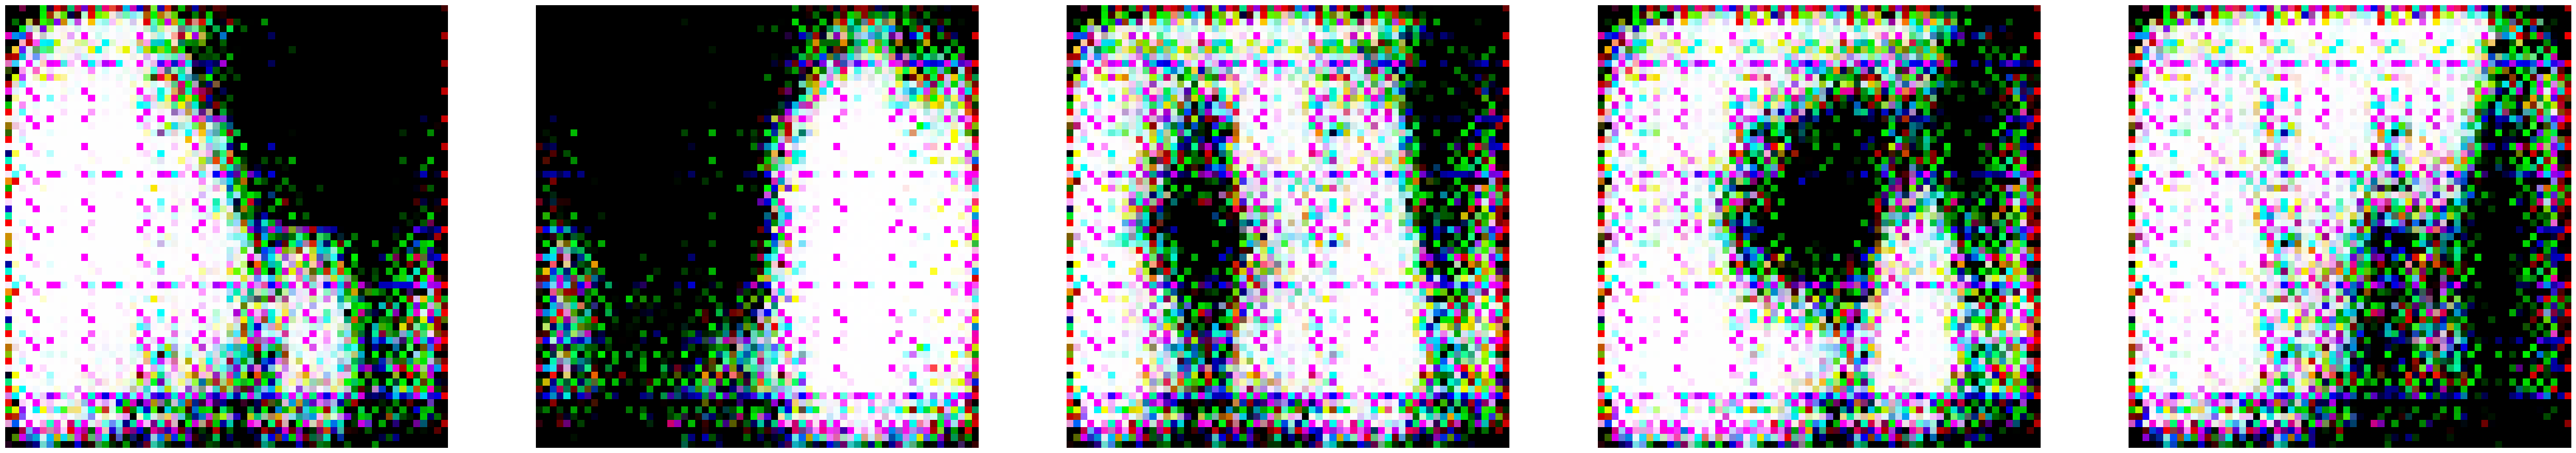

  0%|          | 0/4 [00:00<?, ?it/s]

[32/100][2/4] Loss_D: 0.7428 Loss_G: 2.4321 D(x): 0.6890 D(G(z)): 0.1587 / 0.0884
[32/100][4/4] Loss_D: 0.7526 Loss_G: 1.9427 D(x): 0.5828 D(G(z)): 0.1071 / 0.1307


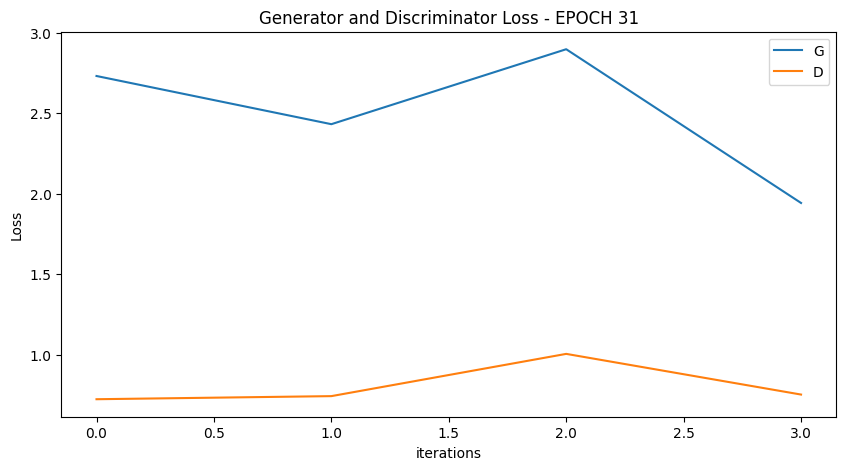

  0%|          | 0/4 [00:00<?, ?it/s]

[33/100][2/4] Loss_D: 0.7151 Loss_G: 1.6644 D(x): 0.5532 D(G(z)): 0.0222 / 0.1952
[33/100][4/4] Loss_D: 1.7359 Loss_G: 2.2270 D(x): 0.1837 D(G(z)): 0.0084 / 0.1090


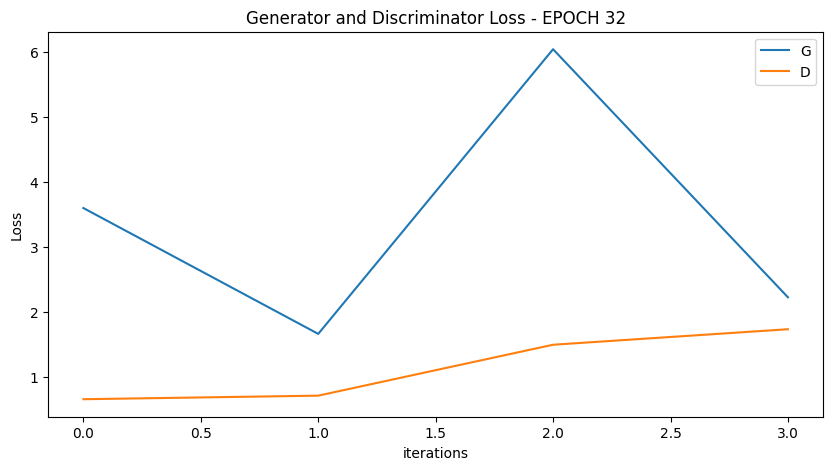

  0%|          | 0/4 [00:00<?, ?it/s]

[34/100][2/4] Loss_D: 0.8421 Loss_G: 2.7063 D(x): 0.8101 D(G(z)): 0.3407 / 0.0636
[34/100][4/4] Loss_D: 0.6091 Loss_G: 2.7536 D(x): 0.8015 D(G(z)): 0.1784 / 0.0553


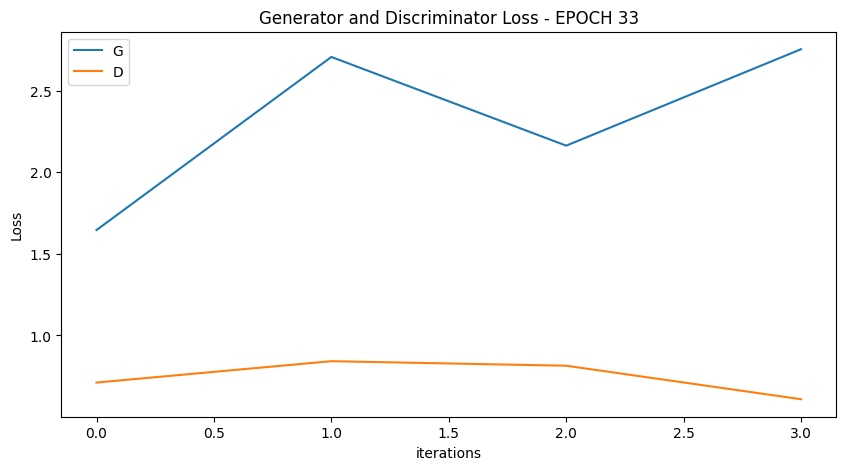

  0%|          | 0/4 [00:00<?, ?it/s]

[35/100][2/4] Loss_D: 0.6729 Loss_G: 2.3386 D(x): 0.6551 D(G(z)): 0.0968 / 0.0918
[35/100][4/4] Loss_D: 0.5009 Loss_G: 2.9865 D(x): 0.7903 D(G(z)): 0.0832 / 0.0413


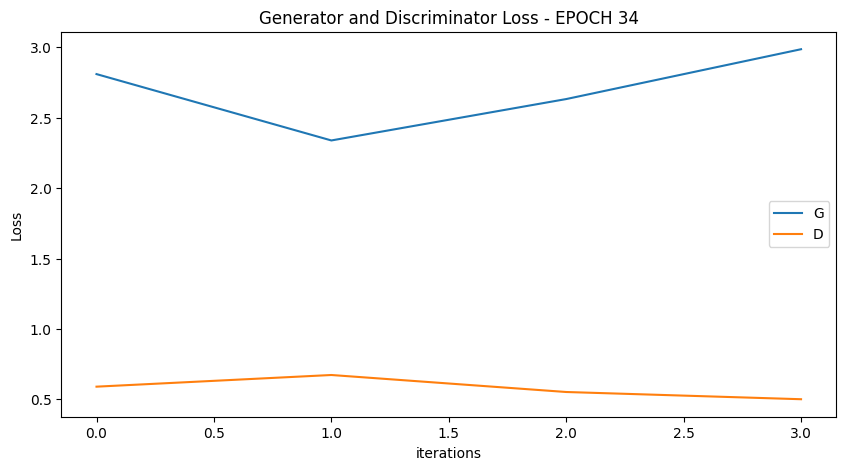

  0%|          | 0/4 [00:00<?, ?it/s]

[36/100][2/4] Loss_D: 0.6581 Loss_G: 2.0004 D(x): 0.5675 D(G(z)): 0.0281 / 0.1242
[36/100][4/4] Loss_D: 0.4469 Loss_G: 3.7527 D(x): 0.7878 D(G(z)): 0.0309 / 0.0177


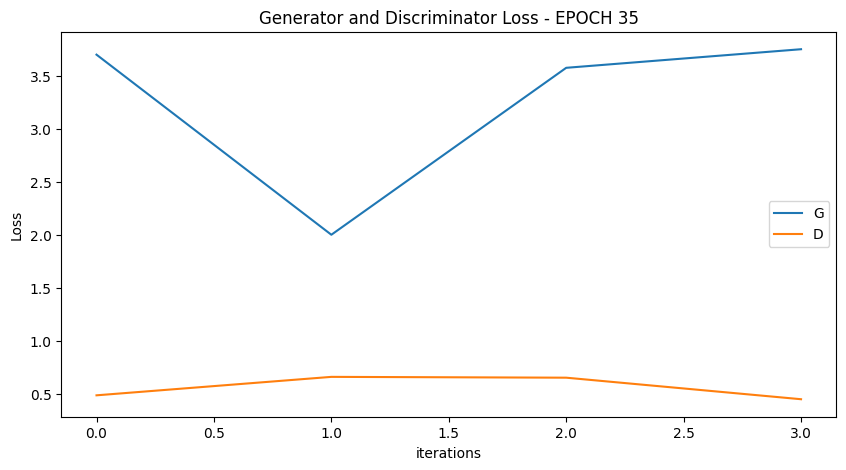

  0%|          | 0/4 [00:00<?, ?it/s]

[37/100][2/4] Loss_D: 0.4587 Loss_G: 3.0571 D(x): 0.8327 D(G(z)): 0.0834 / 0.0411
[37/100][4/4] Loss_D: 0.4212 Loss_G: 3.5184 D(x): 0.7755 D(G(z)): 0.0172 / 0.0267


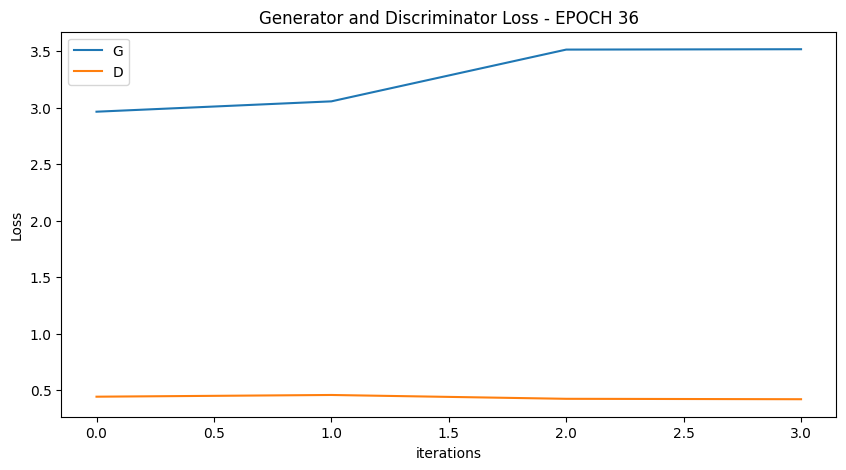

  0%|          | 0/4 [00:00<?, ?it/s]

[38/100][2/4] Loss_D: 0.4083 Loss_G: 4.0036 D(x): 0.8699 D(G(z)): 0.0592 / 0.0148
[38/100][4/4] Loss_D: 0.6322 Loss_G: 4.8739 D(x): 0.9532 D(G(z)): 0.2185 / 0.0052


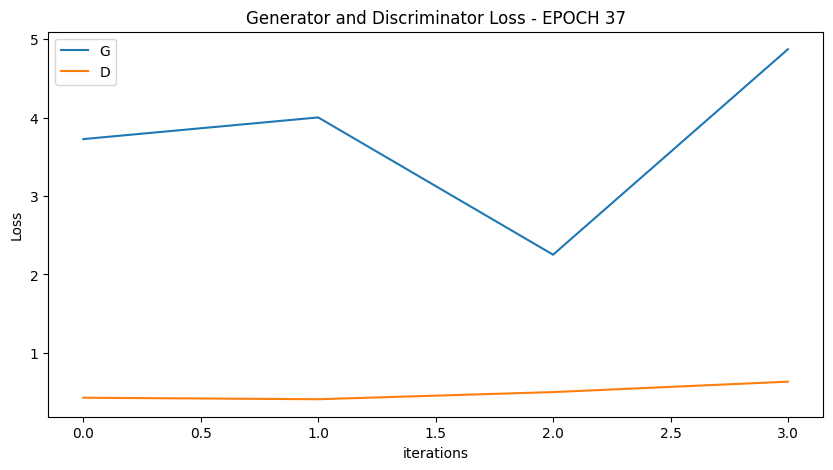

  0%|          | 0/4 [00:00<?, ?it/s]

[39/100][2/4] Loss_D: 0.3928 Loss_G: 3.2816 D(x): 0.9108 D(G(z)): 0.0377 / 0.0306
[39/100][4/4] Loss_D: 0.4208 Loss_G: 3.2579 D(x): 0.8375 D(G(z)): 0.0475 / 0.0292


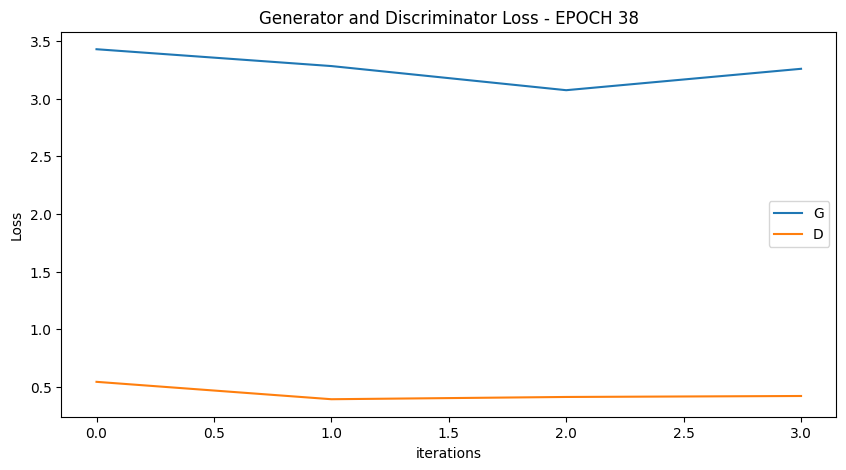

  0%|          | 0/4 [00:00<?, ?it/s]

[40/100][2/4] Loss_D: 0.5528 Loss_G: 4.4130 D(x): 0.9096 D(G(z)): 0.1892 / 0.0083
[40/100][4/4] Loss_D: 1.1531 Loss_G: 4.5188 D(x): 0.7346 D(G(z)): 0.5001 / 0.0083


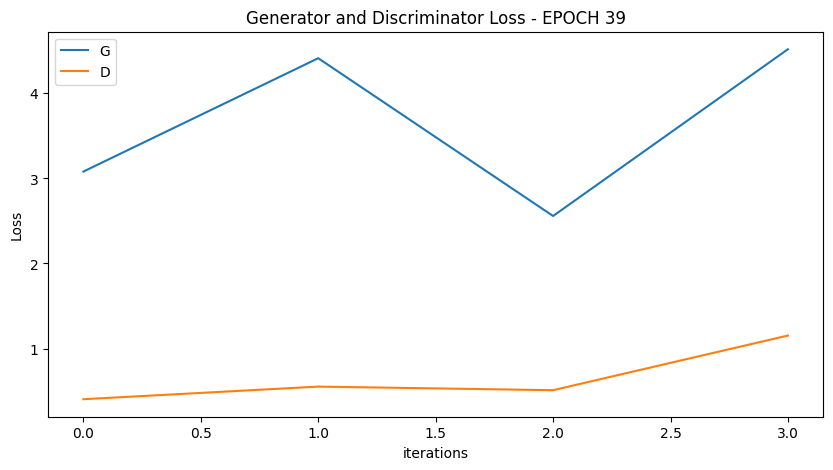

  0%|          | 0/4 [00:00<?, ?it/s]

[41/100][2/4] Loss_D: 2.2305 Loss_G: 2.9706 D(x): 0.8569 D(G(z)): 0.8326 / 0.0462
[41/100][4/4] Loss_D: 0.8484 Loss_G: 1.6795 D(x): 0.6728 D(G(z)): 0.2794 / 0.1733


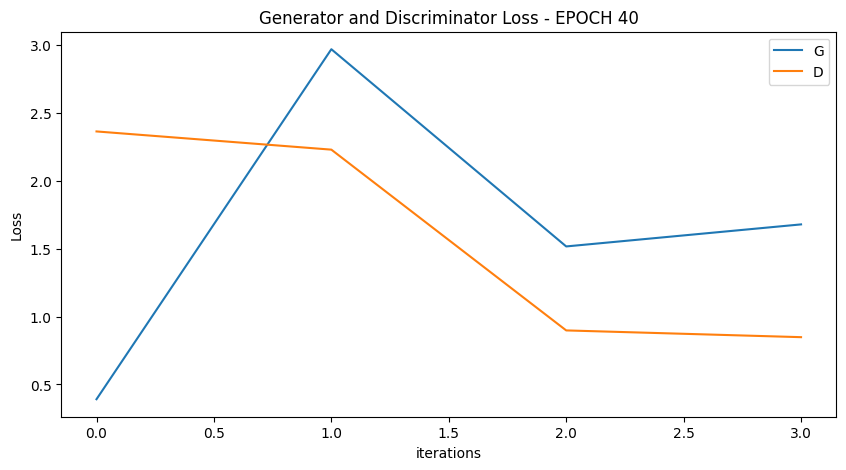

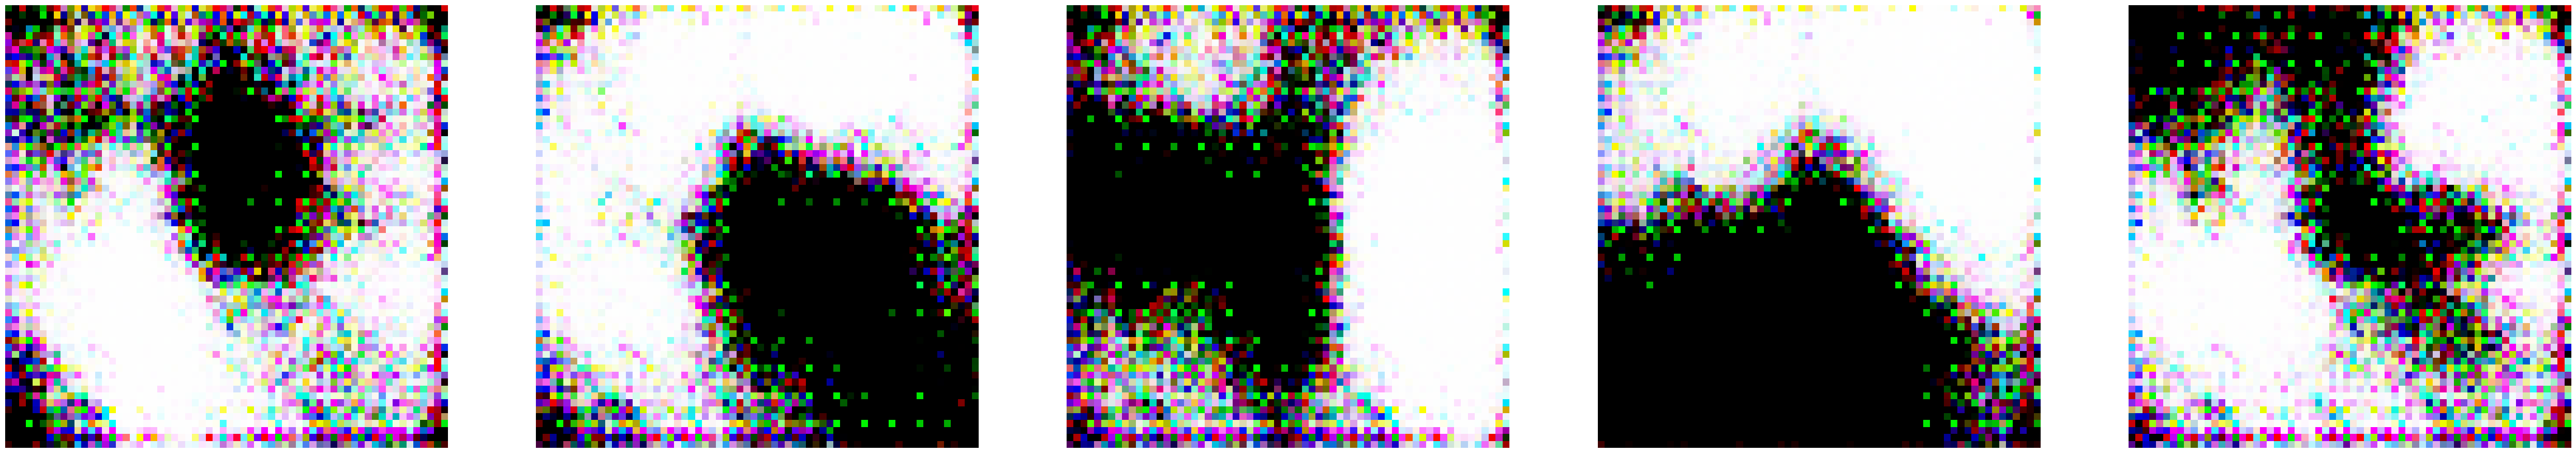

  0%|          | 0/4 [00:00<?, ?it/s]

[42/100][2/4] Loss_D: 1.0549 Loss_G: 1.6952 D(x): 0.5777 D(G(z)): 0.3164 / 0.1685
[42/100][4/4] Loss_D: 0.7157 Loss_G: 2.1330 D(x): 0.7248 D(G(z)): 0.2185 / 0.1064


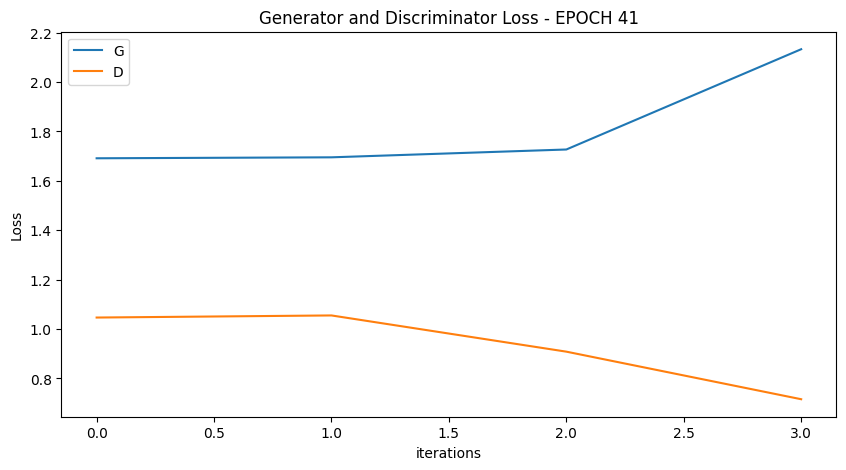

  0%|          | 0/4 [00:00<?, ?it/s]

[43/100][2/4] Loss_D: 0.8988 Loss_G: 2.8910 D(x): 0.8010 D(G(z)): 0.3839 / 0.0464
[43/100][4/4] Loss_D: 0.7624 Loss_G: 1.9477 D(x): 0.6915 D(G(z)): 0.2275 / 0.1378


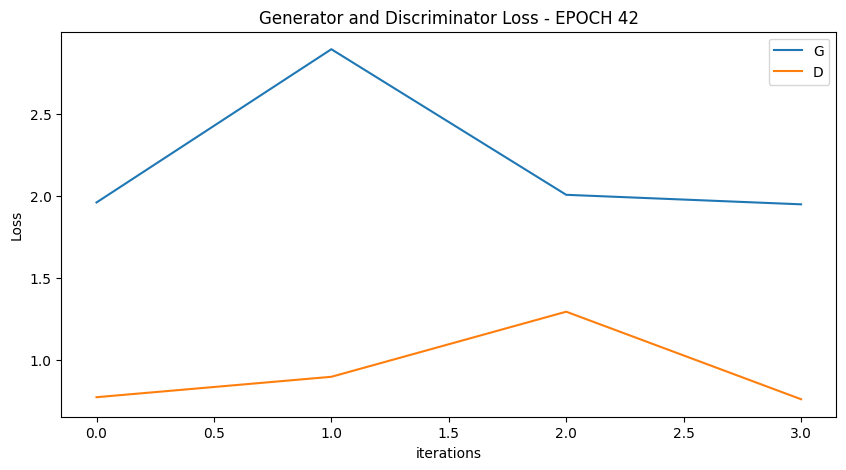

  0%|          | 0/4 [00:00<?, ?it/s]

[44/100][2/4] Loss_D: 1.4097 Loss_G: 2.9284 D(x): 0.2565 D(G(z)): 0.0417 / 0.0467
[44/100][4/4] Loss_D: 0.8820 Loss_G: 2.2142 D(x): 0.6757 D(G(z)): 0.3133 / 0.0893


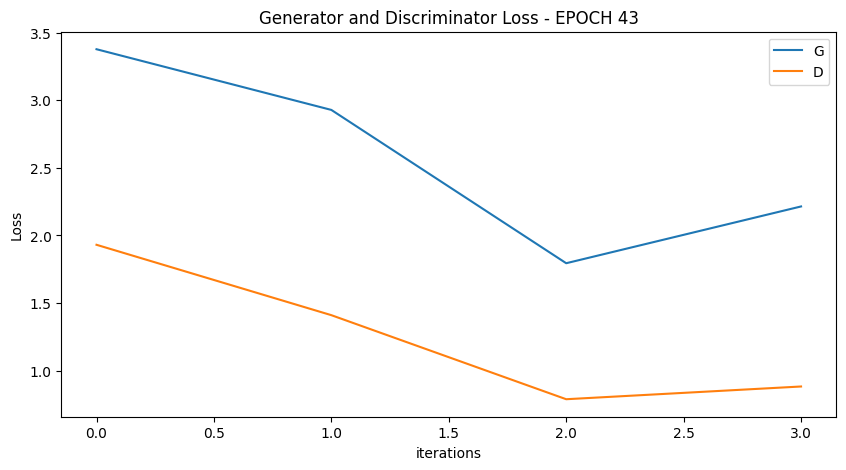

  0%|          | 0/4 [00:00<?, ?it/s]

[45/100][2/4] Loss_D: 0.6001 Loss_G: 2.2498 D(x): 0.7265 D(G(z)): 0.1416 / 0.0891
[45/100][4/4] Loss_D: 0.6837 Loss_G: 2.2291 D(x): 0.7617 D(G(z)): 0.2304 / 0.0893


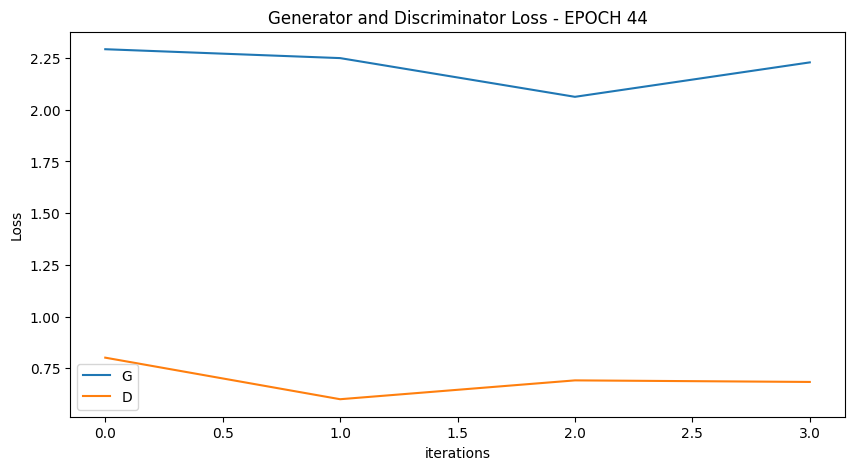

  0%|          | 0/4 [00:00<?, ?it/s]

[46/100][2/4] Loss_D: 0.6403 Loss_G: 1.9231 D(x): 0.6887 D(G(z)): 0.1443 / 0.1251
[46/100][4/4] Loss_D: 0.7546 Loss_G: 1.8625 D(x): 0.6701 D(G(z)): 0.2023 / 0.1449


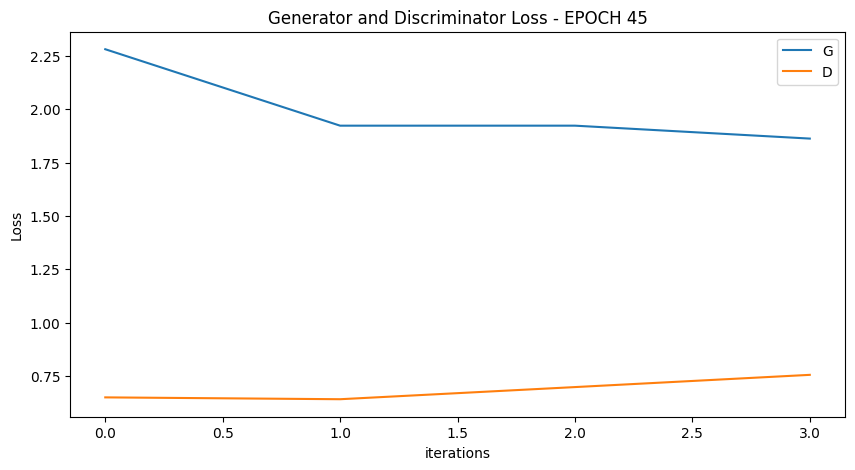

  0%|          | 0/4 [00:00<?, ?it/s]

[47/100][2/4] Loss_D: 0.6494 Loss_G: 2.1312 D(x): 0.7381 D(G(z)): 0.1823 / 0.1013
[47/100][4/4] Loss_D: 0.6499 Loss_G: 1.9227 D(x): 0.6896 D(G(z)): 0.1469 / 0.1346


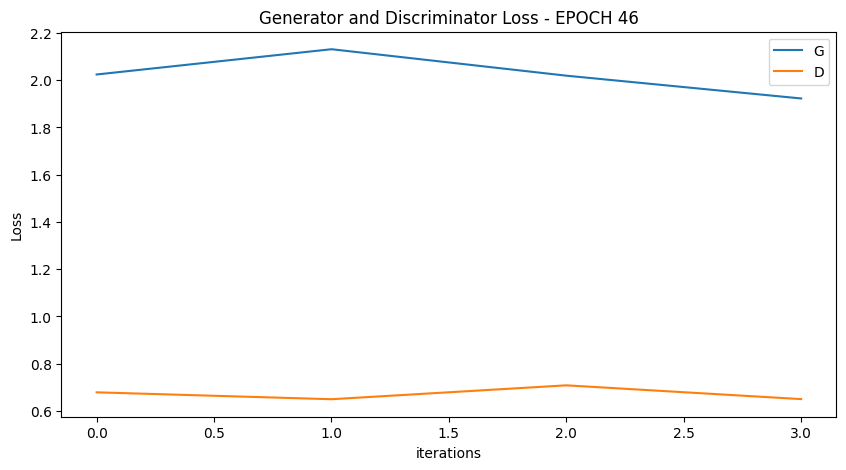

  0%|          | 0/4 [00:00<?, ?it/s]

[48/100][2/4] Loss_D: 0.5921 Loss_G: 2.1786 D(x): 0.7371 D(G(z)): 0.1472 / 0.1006
[48/100][4/4] Loss_D: 0.4839 Loss_G: 2.6131 D(x): 0.8030 D(G(z)): 0.0880 / 0.0692


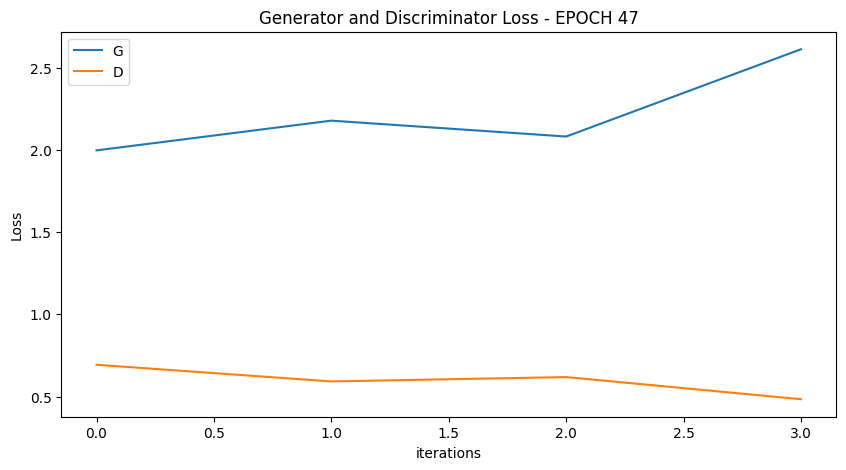

  0%|          | 0/4 [00:00<?, ?it/s]

[49/100][2/4] Loss_D: 0.4495 Loss_G: 2.4896 D(x): 0.8273 D(G(z)): 0.0787 / 0.0675
[49/100][4/4] Loss_D: 0.7821 Loss_G: 2.4236 D(x): 0.5909 D(G(z)): 0.1209 / 0.0928


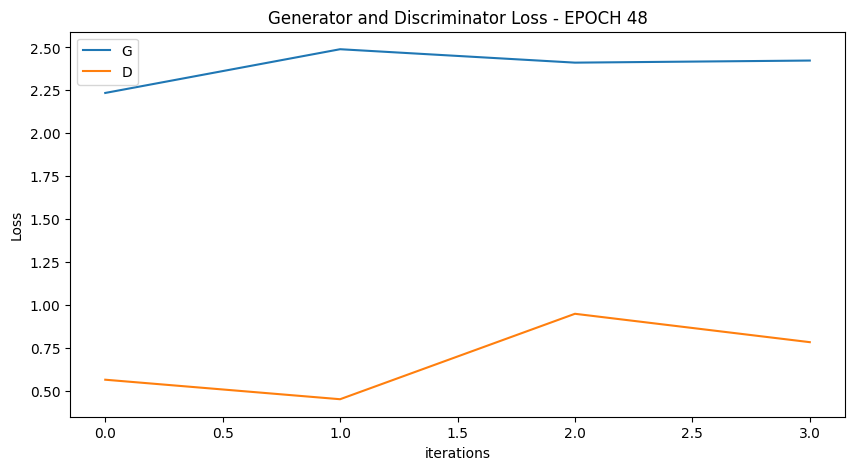

  0%|          | 0/4 [00:00<?, ?it/s]

[50/100][2/4] Loss_D: 0.9597 Loss_G: 2.2805 D(x): 0.7359 D(G(z)): 0.3829 / 0.0980
[50/100][4/4] Loss_D: 0.6100 Loss_G: 2.7872 D(x): 0.6643 D(G(z)): 0.0682 / 0.0539


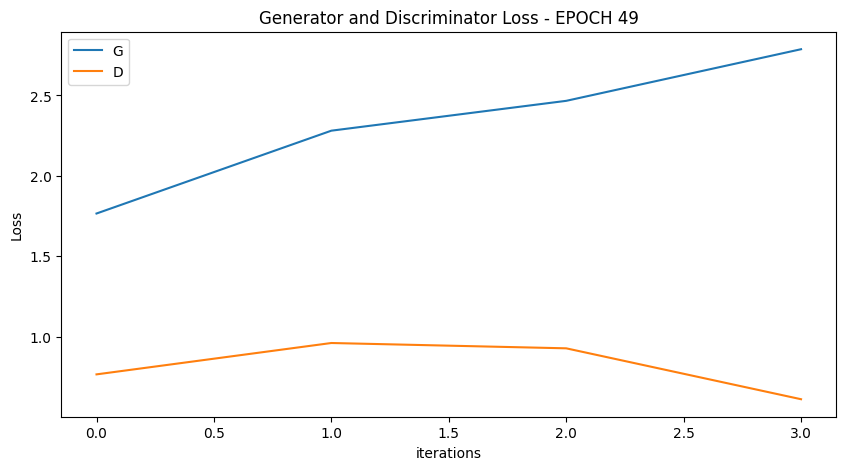

  0%|          | 0/4 [00:00<?, ?it/s]

[51/100][2/4] Loss_D: 1.0524 Loss_G: 3.2221 D(x): 0.7555 D(G(z)): 0.4338 / 0.0349
[51/100][4/4] Loss_D: 0.8315 Loss_G: 2.3646 D(x): 0.6144 D(G(z)): 0.1743 / 0.0966


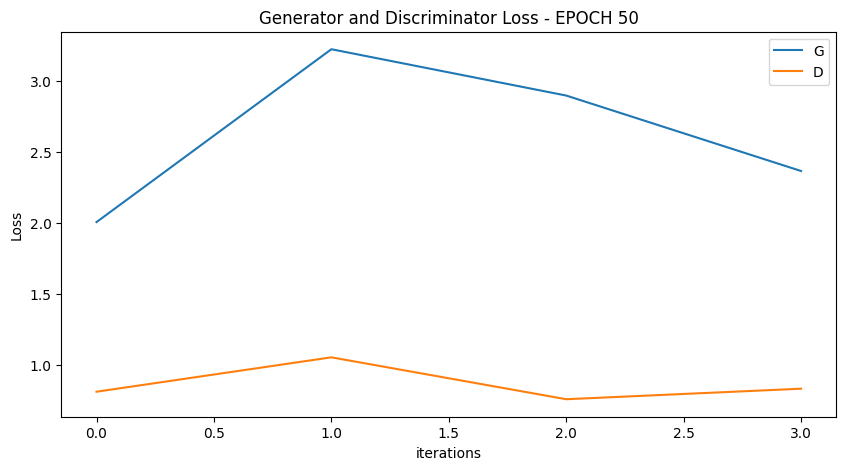

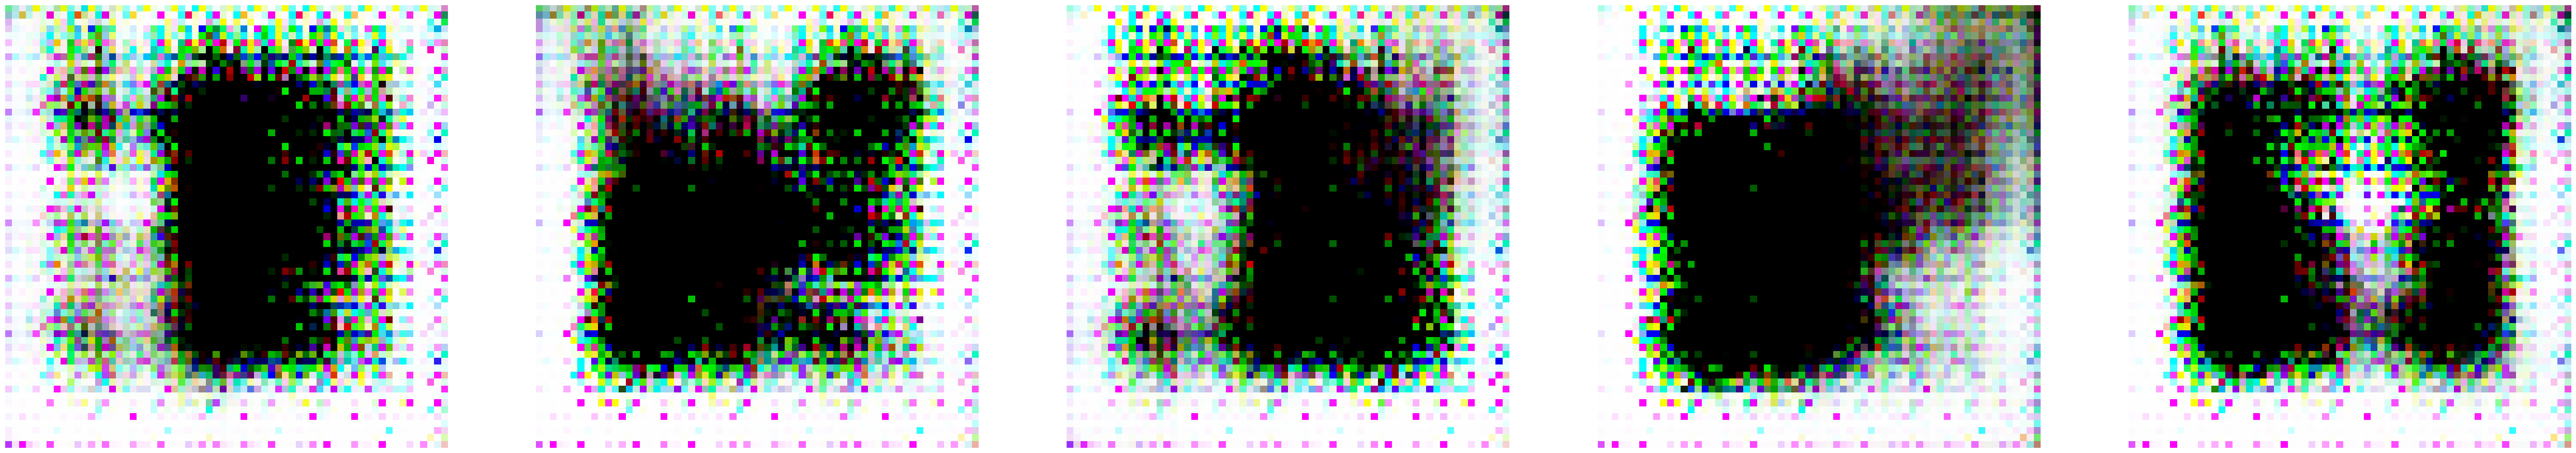

  0%|          | 0/4 [00:00<?, ?it/s]

[52/100][2/4] Loss_D: 0.8219 Loss_G: 2.3418 D(x): 0.7457 D(G(z)): 0.2941 / 0.1004
[52/100][4/4] Loss_D: 0.8074 Loss_G: 2.0938 D(x): 0.6135 D(G(z)): 0.1530 / 0.1223


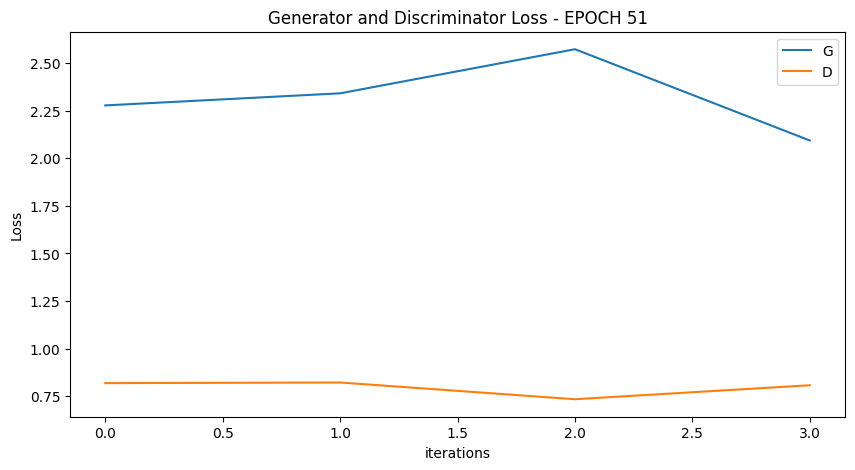

  0%|          | 0/4 [00:00<?, ?it/s]

[53/100][2/4] Loss_D: 1.1101 Loss_G: 2.2023 D(x): 0.7951 D(G(z)): 0.4531 / 0.1243
[53/100][4/4] Loss_D: 1.2437 Loss_G: 2.2636 D(x): 0.5899 D(G(z)): 0.3622 / 0.0926


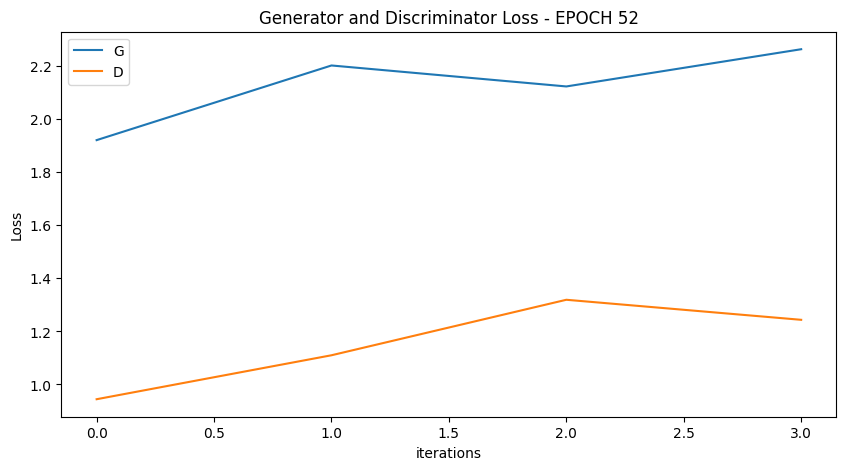

  0%|          | 0/4 [00:00<?, ?it/s]

[54/100][2/4] Loss_D: 0.9780 Loss_G: 1.9244 D(x): 0.6174 D(G(z)): 0.2762 / 0.1567
[54/100][4/4] Loss_D: 1.0751 Loss_G: 2.0924 D(x): 0.6152 D(G(z)): 0.2979 / 0.1366


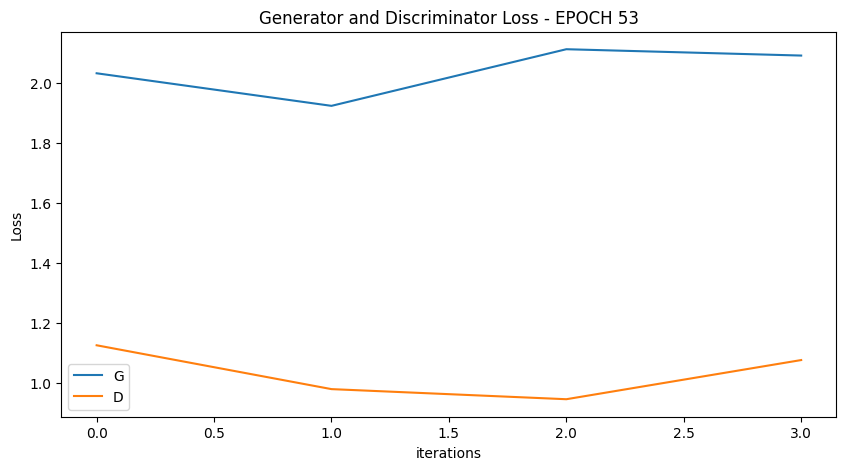

  0%|          | 0/4 [00:00<?, ?it/s]

[55/100][2/4] Loss_D: 0.9885 Loss_G: 2.2050 D(x): 0.5959 D(G(z)): 0.2661 / 0.1388
[55/100][4/4] Loss_D: 1.0706 Loss_G: 1.3929 D(x): 0.7261 D(G(z)): 0.4098 / 0.2643


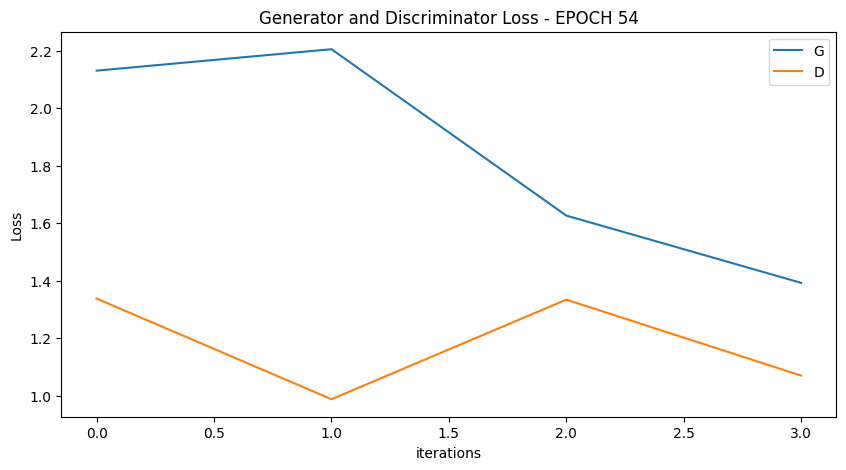

  0%|          | 0/4 [00:00<?, ?it/s]

[56/100][2/4] Loss_D: 0.8902 Loss_G: 1.9513 D(x): 0.6775 D(G(z)): 0.2729 / 0.1956
[56/100][4/4] Loss_D: 0.8388 Loss_G: 1.7429 D(x): 0.6588 D(G(z)): 0.2342 / 0.2054


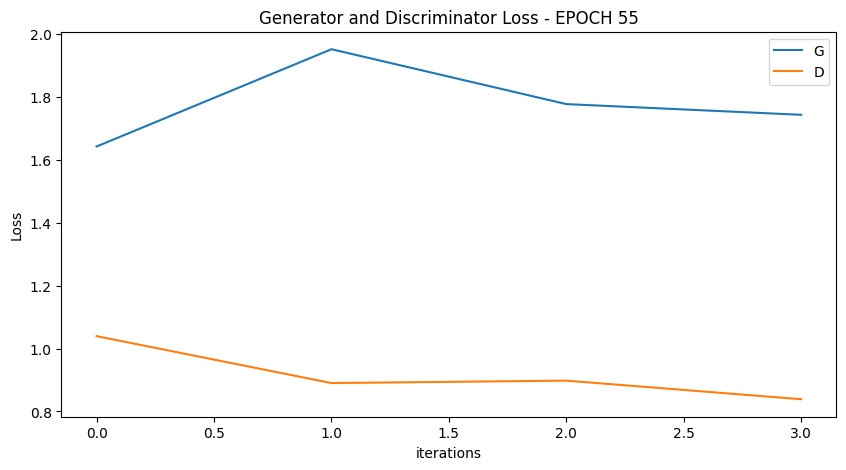

  0%|          | 0/4 [00:00<?, ?it/s]

[57/100][2/4] Loss_D: 1.1195 Loss_G: 1.7144 D(x): 0.7136 D(G(z)): 0.3698 / 0.2220
[57/100][4/4] Loss_D: 1.0155 Loss_G: 1.6790 D(x): 0.6641 D(G(z)): 0.3159 / 0.1897


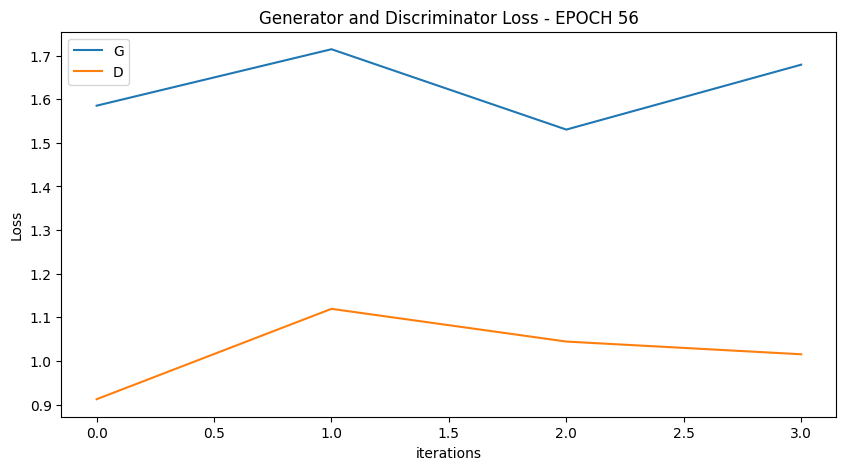

  0%|          | 0/4 [00:00<?, ?it/s]

[58/100][2/4] Loss_D: 1.0844 Loss_G: 2.0909 D(x): 0.6388 D(G(z)): 0.3476 / 0.1276
[58/100][4/4] Loss_D: 0.9239 Loss_G: 2.0177 D(x): 0.6630 D(G(z)): 0.2353 / 0.1582


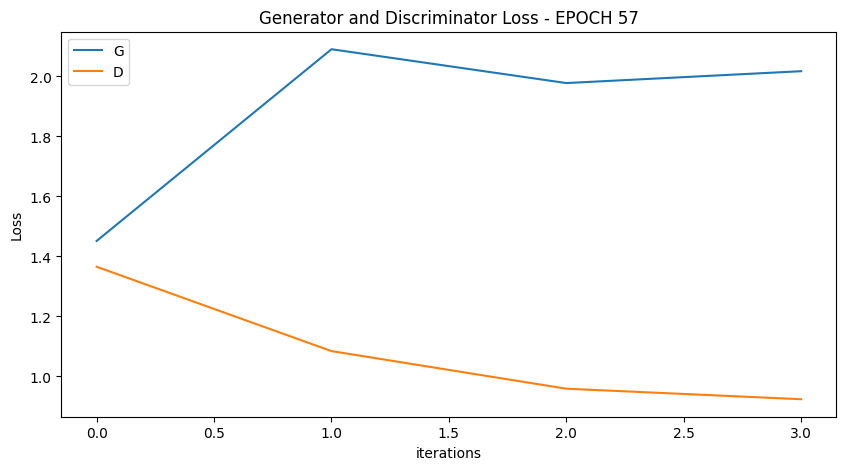

  0%|          | 0/4 [00:00<?, ?it/s]

[59/100][2/4] Loss_D: 0.9027 Loss_G: 1.8076 D(x): 0.7538 D(G(z)): 0.3062 / 0.1702
[59/100][4/4] Loss_D: 1.0286 Loss_G: 1.8712 D(x): 0.6215 D(G(z)): 0.2918 / 0.1664


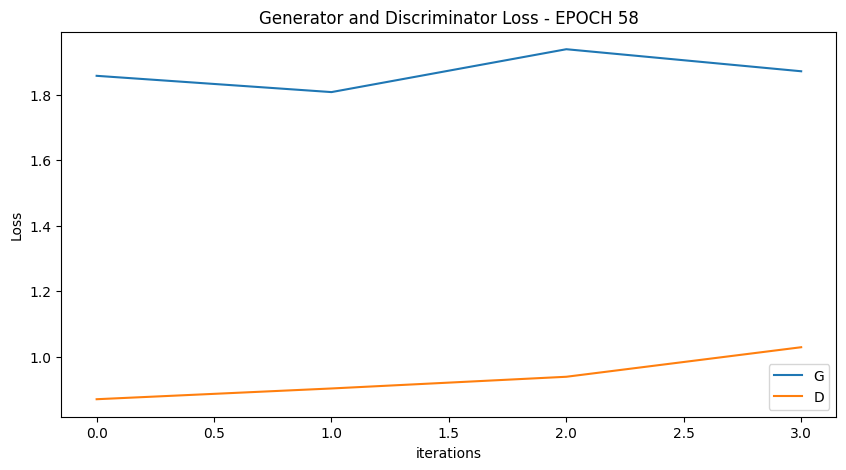

  0%|          | 0/4 [00:00<?, ?it/s]

[60/100][2/4] Loss_D: 1.2371 Loss_G: 1.0099 D(x): 0.4411 D(G(z)): 0.2813 / 0.3859
[60/100][4/4] Loss_D: 0.9034 Loss_G: 2.1092 D(x): 0.7070 D(G(z)): 0.2981 / 0.1450


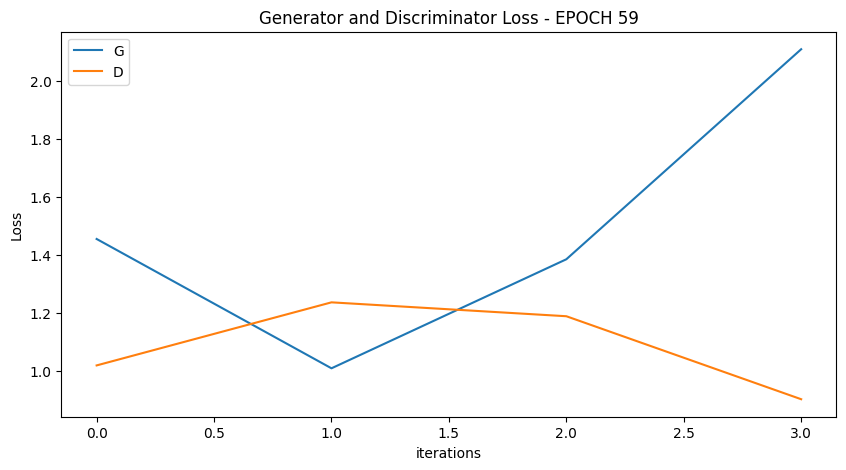

  0%|          | 0/4 [00:00<?, ?it/s]

[61/100][2/4] Loss_D: 0.9513 Loss_G: 1.6108 D(x): 0.6097 D(G(z)): 0.2208 / 0.2001
[61/100][4/4] Loss_D: 1.0015 Loss_G: 1.6747 D(x): 0.6721 D(G(z)): 0.3378 / 0.2019


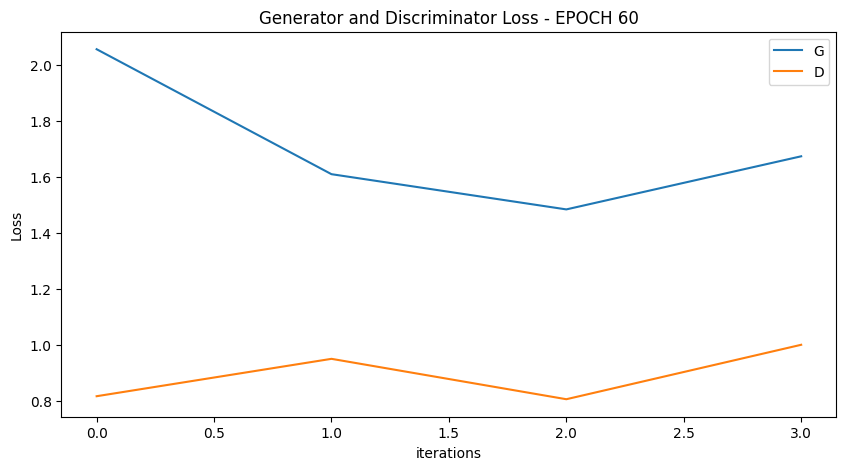

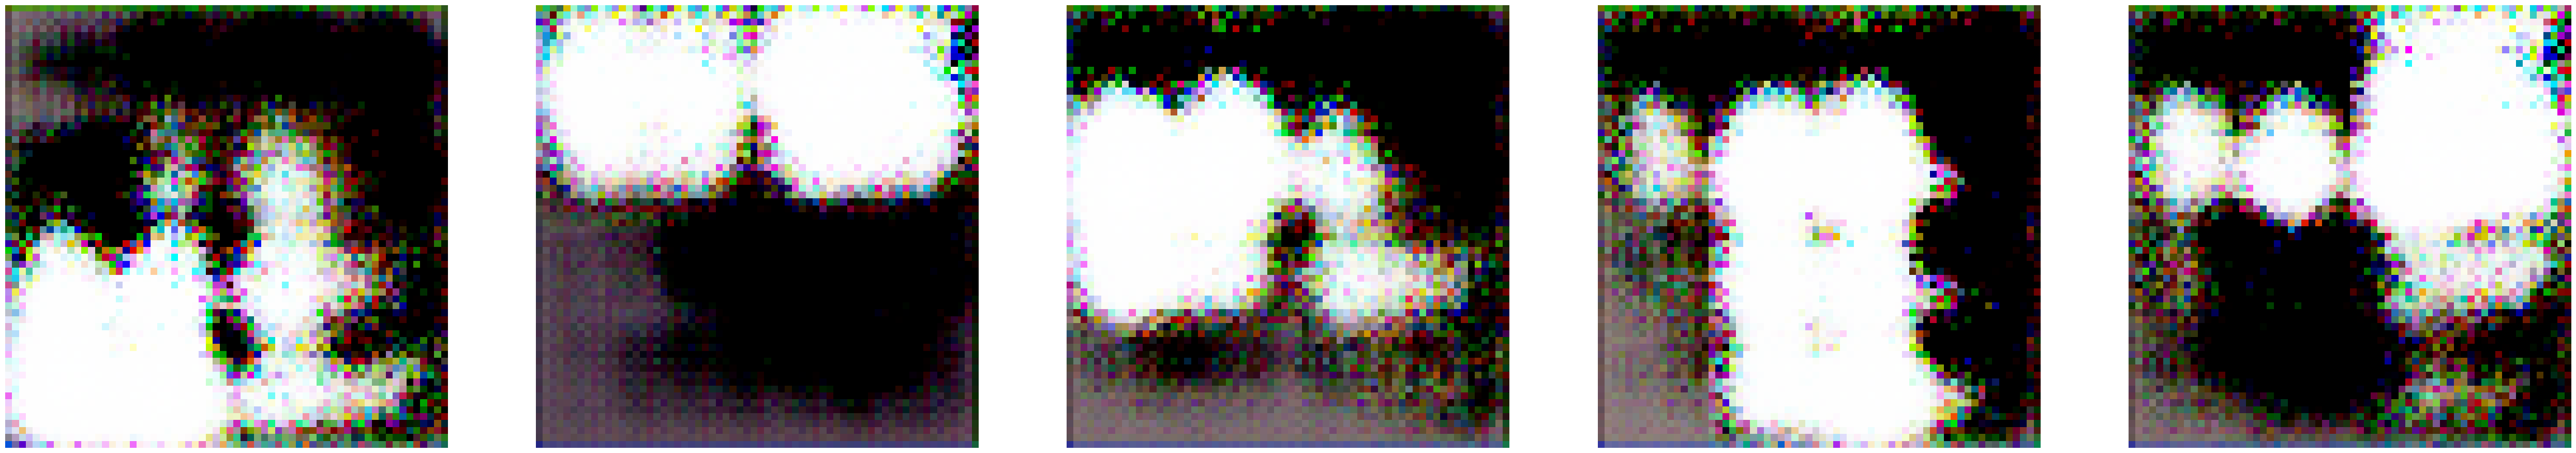

  0%|          | 0/4 [00:00<?, ?it/s]

[62/100][2/4] Loss_D: 0.9692 Loss_G: 1.5322 D(x): 0.5963 D(G(z)): 0.2859 / 0.2210
[62/100][4/4] Loss_D: 1.2404 Loss_G: 1.5439 D(x): 0.4956 D(G(z)): 0.2916 / 0.2550


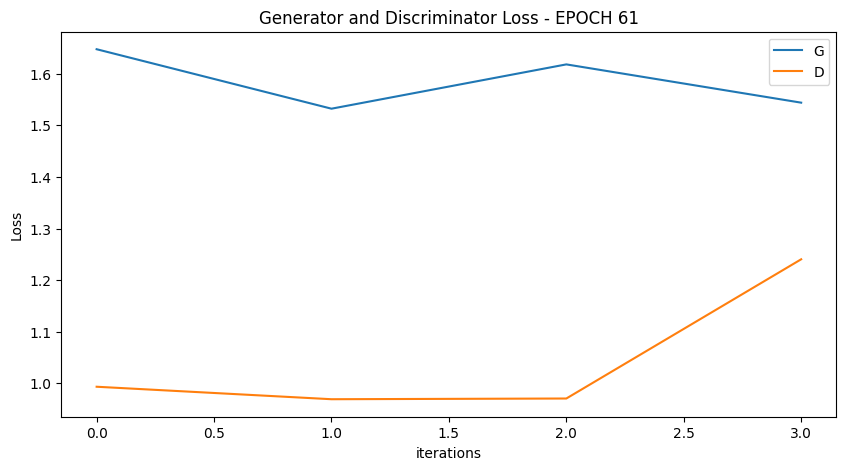

  0%|          | 0/4 [00:00<?, ?it/s]

[63/100][2/4] Loss_D: 1.0031 Loss_G: 1.7743 D(x): 0.6713 D(G(z)): 0.3479 / 0.1644
[63/100][4/4] Loss_D: 1.0811 Loss_G: 1.5287 D(x): 0.6711 D(G(z)): 0.3727 / 0.2445


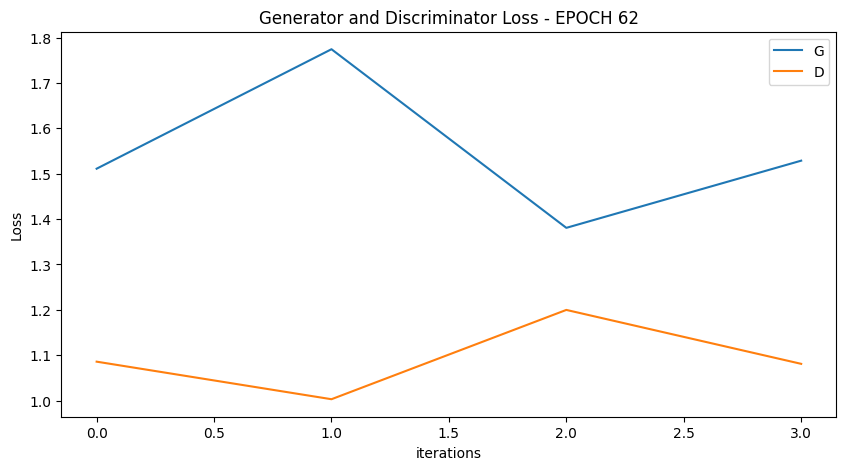

  0%|          | 0/4 [00:00<?, ?it/s]

[64/100][2/4] Loss_D: 1.2298 Loss_G: 1.3120 D(x): 0.4927 D(G(z)): 0.3468 / 0.2834
[64/100][4/4] Loss_D: 1.0389 Loss_G: 1.5637 D(x): 0.6046 D(G(z)): 0.3236 / 0.2104


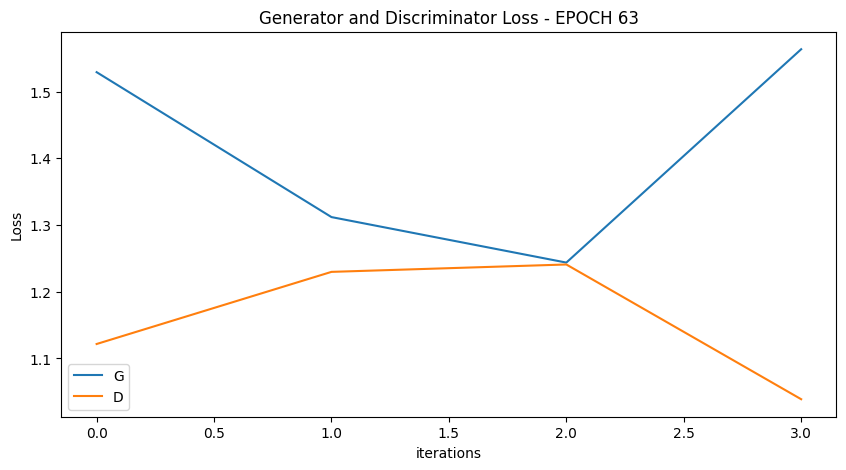

  0%|          | 0/4 [00:00<?, ?it/s]

[65/100][2/4] Loss_D: 1.3391 Loss_G: 1.3639 D(x): 0.5384 D(G(z)): 0.3924 / 0.2920
[65/100][4/4] Loss_D: 1.3552 Loss_G: 1.3818 D(x): 0.5082 D(G(z)): 0.4134 / 0.2582


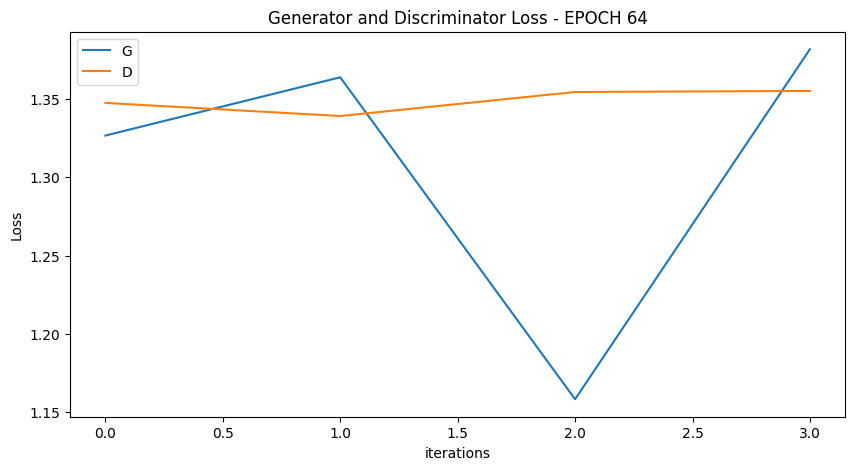

  0%|          | 0/4 [00:00<?, ?it/s]

[66/100][2/4] Loss_D: 1.2245 Loss_G: 1.3645 D(x): 0.5396 D(G(z)): 0.3552 / 0.2540
[66/100][4/4] Loss_D: 1.2067 Loss_G: 1.3330 D(x): 0.5308 D(G(z)): 0.3820 / 0.2549


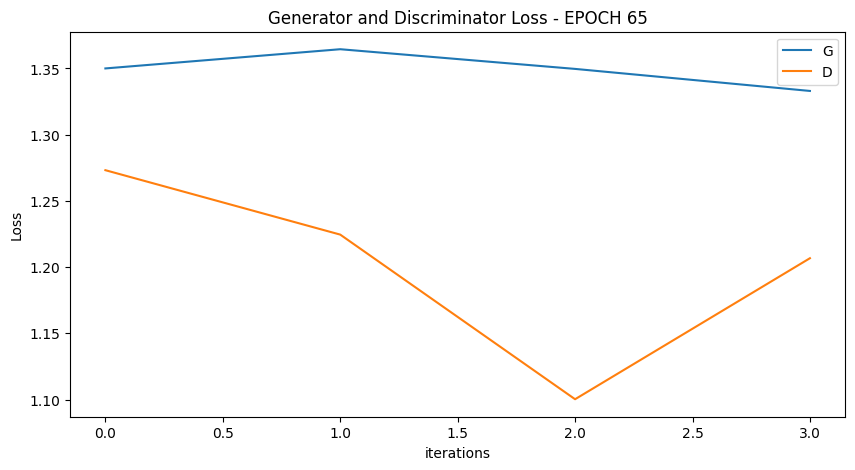

  0%|          | 0/4 [00:00<?, ?it/s]

[67/100][2/4] Loss_D: 1.1333 Loss_G: 1.5401 D(x): 0.6452 D(G(z)): 0.4246 / 0.2061
[67/100][4/4] Loss_D: 1.0526 Loss_G: 1.2947 D(x): 0.5568 D(G(z)): 0.3183 / 0.2640


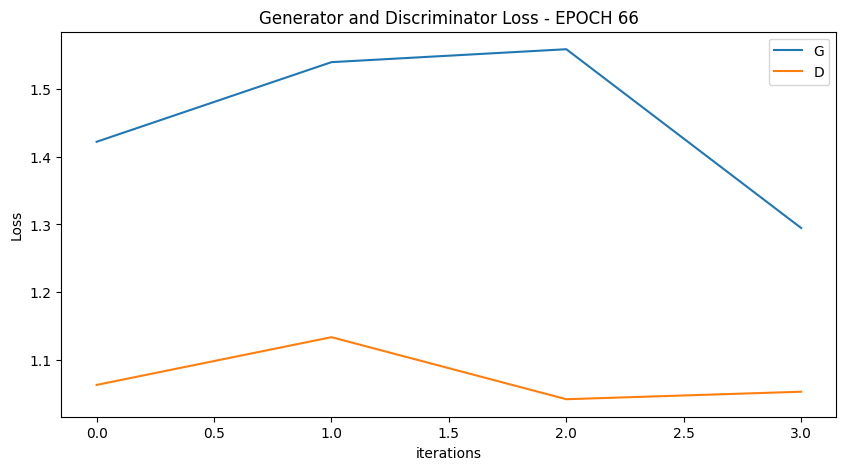

  0%|          | 0/4 [00:00<?, ?it/s]

[68/100][2/4] Loss_D: 1.2000 Loss_G: 1.4126 D(x): 0.4944 D(G(z)): 0.3310 / 0.2490
[68/100][4/4] Loss_D: 1.2311 Loss_G: 1.2161 D(x): 0.5296 D(G(z)): 0.3800 / 0.2949


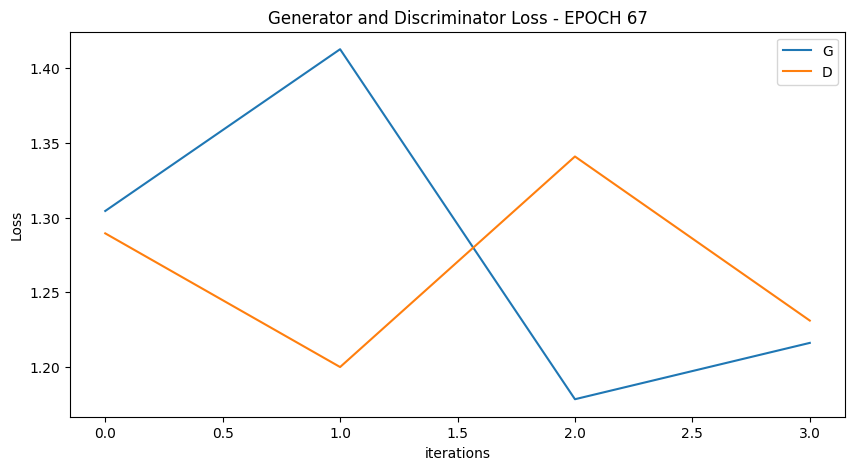

  0%|          | 0/4 [00:00<?, ?it/s]

[69/100][2/4] Loss_D: 1.2424 Loss_G: 1.4337 D(x): 0.4523 D(G(z)): 0.3048 / 0.2381
[69/100][4/4] Loss_D: 1.1523 Loss_G: 1.2802 D(x): 0.5554 D(G(z)): 0.3790 / 0.2669


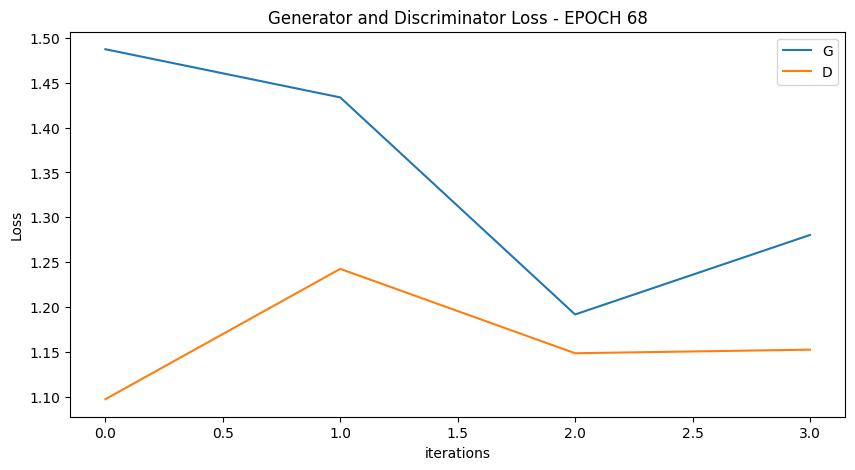

  0%|          | 0/4 [00:00<?, ?it/s]

[70/100][2/4] Loss_D: 1.1280 Loss_G: 1.2601 D(x): 0.5456 D(G(z)): 0.3579 / 0.2734
[70/100][4/4] Loss_D: 1.2863 Loss_G: 1.2750 D(x): 0.5064 D(G(z)): 0.3778 / 0.2771


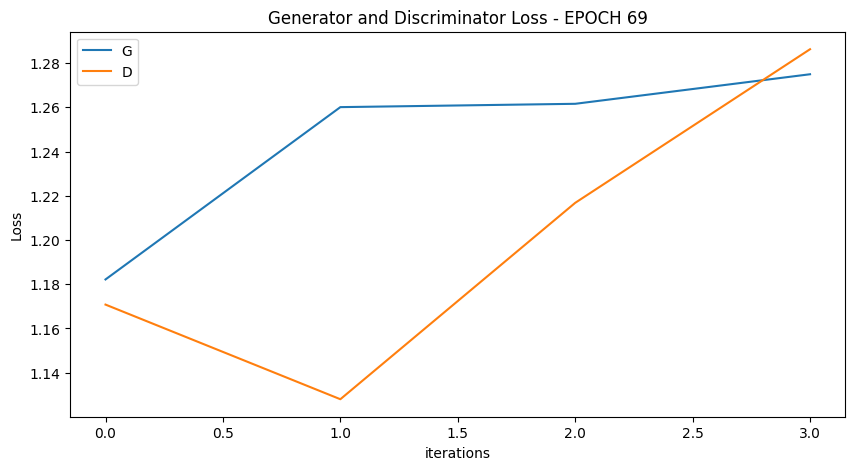

  0%|          | 0/4 [00:00<?, ?it/s]

[71/100][2/4] Loss_D: 1.2402 Loss_G: 1.3529 D(x): 0.5268 D(G(z)): 0.3944 / 0.2495
[71/100][4/4] Loss_D: 1.0805 Loss_G: 1.5323 D(x): 0.5642 D(G(z)): 0.3416 / 0.2122


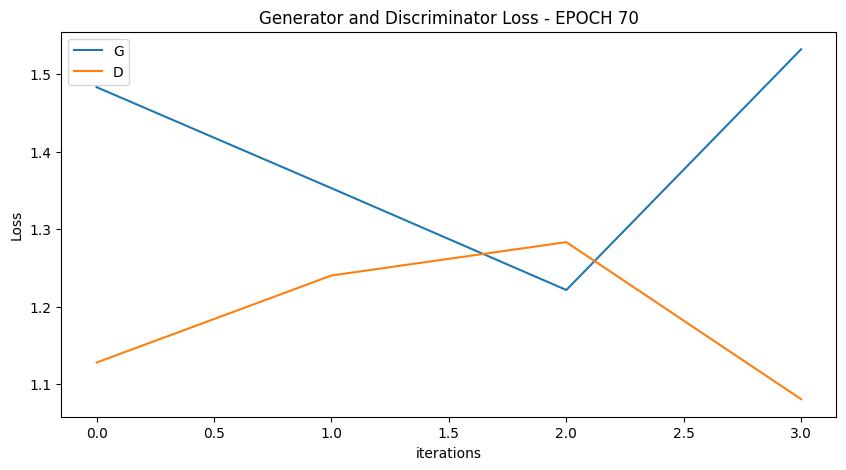

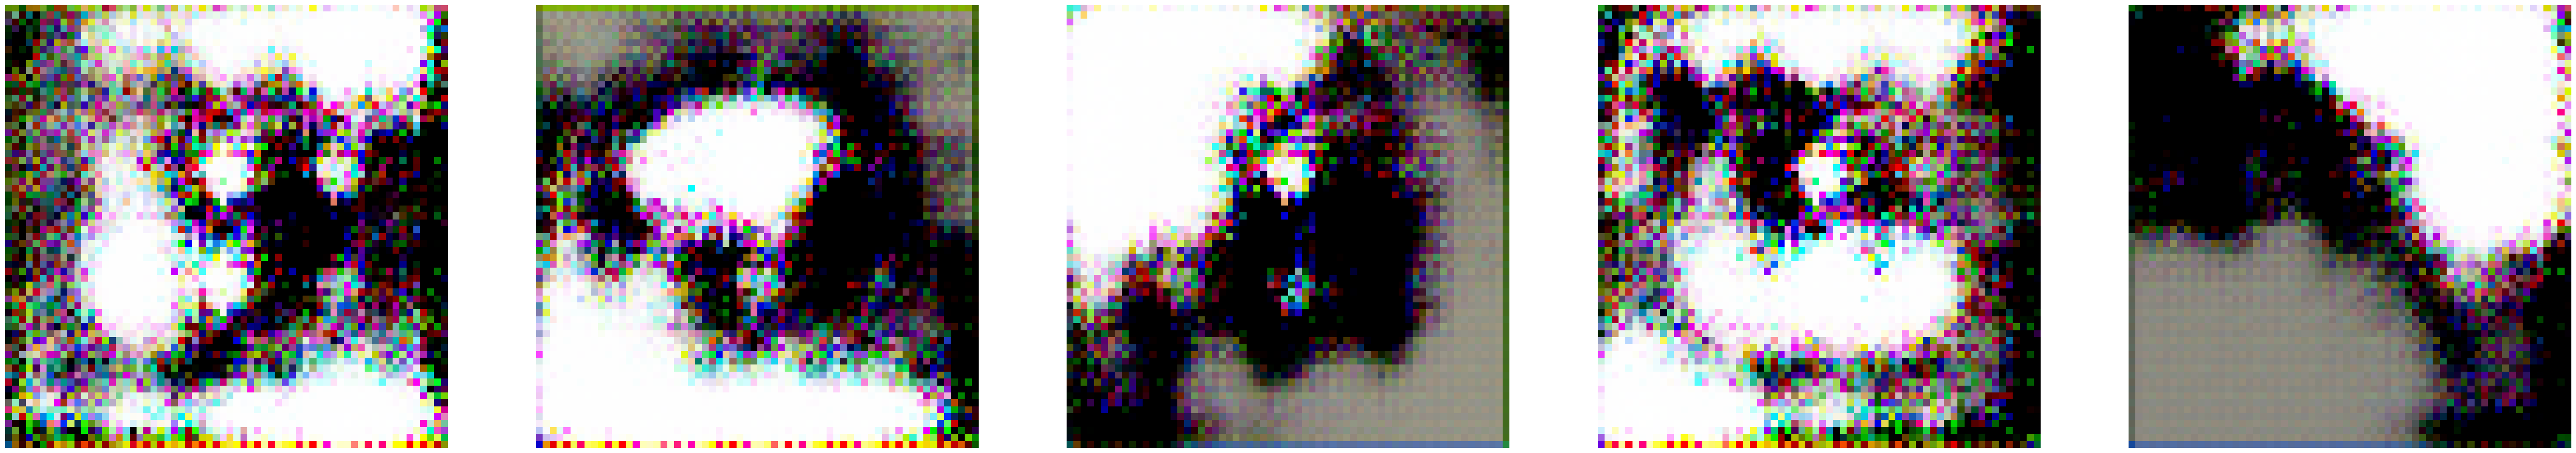

  0%|          | 0/4 [00:00<?, ?it/s]

[72/100][2/4] Loss_D: 1.1752 Loss_G: 1.3945 D(x): 0.5066 D(G(z)): 0.3189 / 0.2537
[72/100][4/4] Loss_D: 1.4791 Loss_G: 1.1975 D(x): 0.5186 D(G(z)): 0.5050 / 0.2967


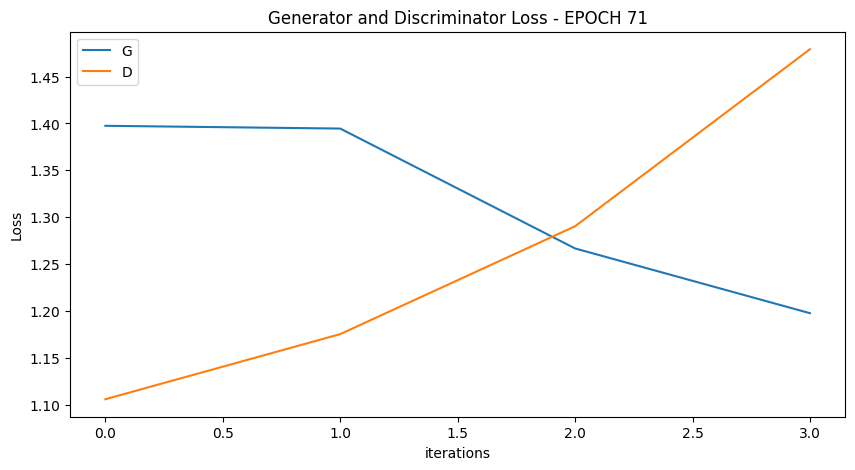

  0%|          | 0/4 [00:00<?, ?it/s]

[73/100][2/4] Loss_D: 1.1807 Loss_G: 1.1739 D(x): 0.4904 D(G(z)): 0.3167 / 0.3033
[73/100][4/4] Loss_D: 1.1710 Loss_G: 1.2656 D(x): 0.5416 D(G(z)): 0.3705 / 0.2759


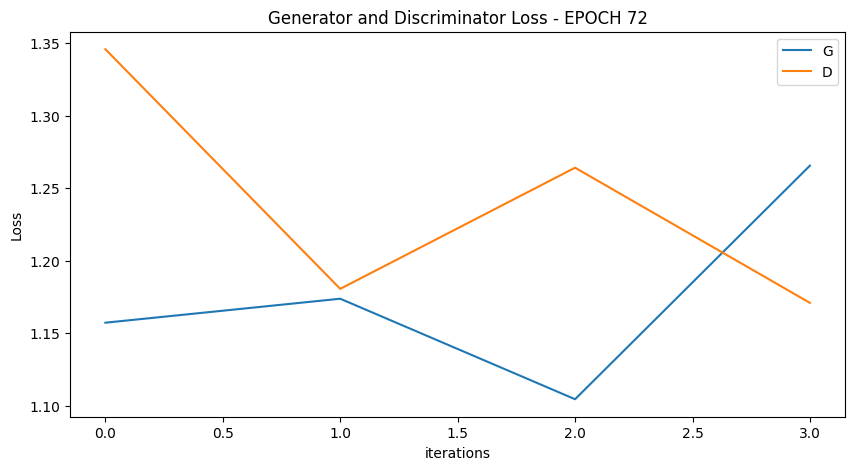

  0%|          | 0/4 [00:00<?, ?it/s]

[74/100][2/4] Loss_D: 1.1437 Loss_G: 1.2876 D(x): 0.5402 D(G(z)): 0.3584 / 0.2684
[74/100][4/4] Loss_D: 1.0018 Loss_G: 1.2944 D(x): 0.5696 D(G(z)): 0.2929 / 0.2634


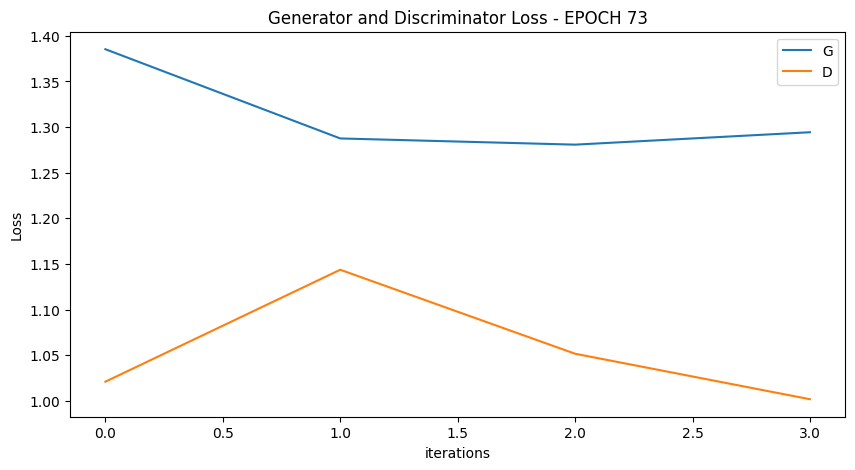

  0%|          | 0/4 [00:00<?, ?it/s]

[75/100][2/4] Loss_D: 1.1495 Loss_G: 1.4923 D(x): 0.5502 D(G(z)): 0.3589 / 0.2141
[75/100][4/4] Loss_D: 1.2136 Loss_G: 0.9818 D(x): 0.5435 D(G(z)): 0.3871 / 0.3677


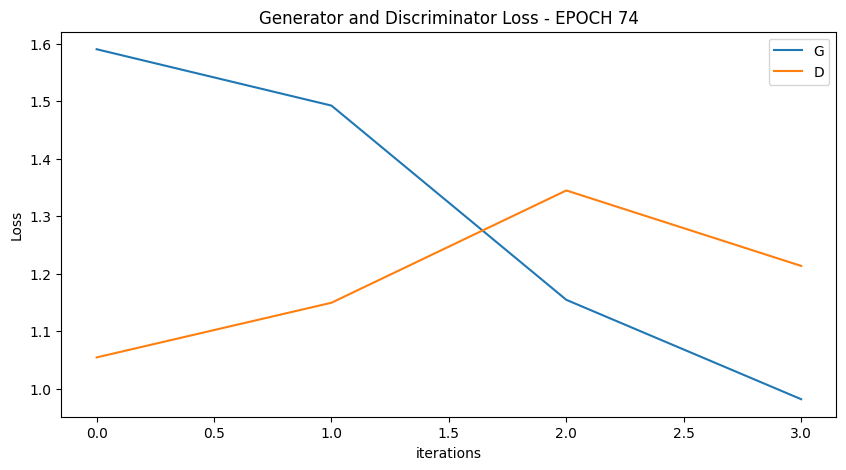

  0%|          | 0/4 [00:00<?, ?it/s]

[76/100][2/4] Loss_D: 1.1425 Loss_G: 1.6819 D(x): 0.6086 D(G(z)): 0.3832 / 0.1832
[76/100][4/4] Loss_D: 1.1600 Loss_G: 1.3513 D(x): 0.4463 D(G(z)): 0.2552 / 0.2447


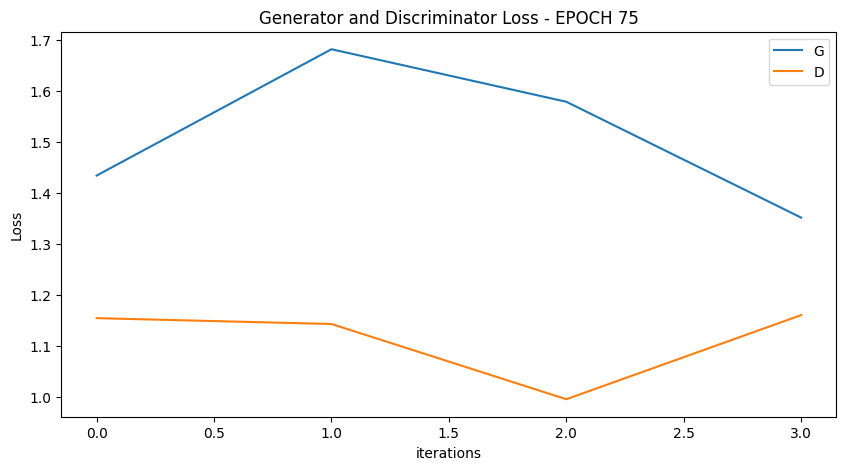

  0%|          | 0/4 [00:00<?, ?it/s]

[77/100][2/4] Loss_D: 1.3740 Loss_G: 1.3419 D(x): 0.5170 D(G(z)): 0.4641 / 0.2491
[77/100][4/4] Loss_D: 1.2301 Loss_G: 1.2563 D(x): 0.5407 D(G(z)): 0.4005 / 0.2717


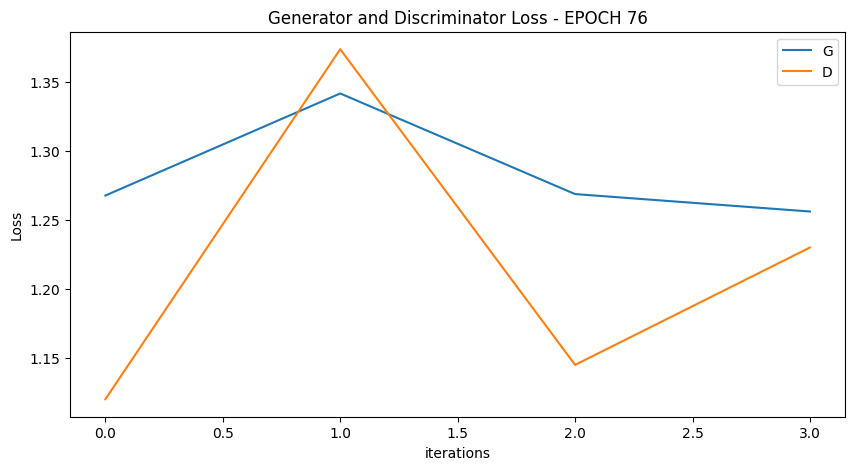

  0%|          | 0/4 [00:00<?, ?it/s]

[78/100][2/4] Loss_D: 1.1816 Loss_G: 1.1612 D(x): 0.4835 D(G(z)): 0.3287 / 0.3073
[78/100][4/4] Loss_D: 1.0552 Loss_G: 1.4221 D(x): 0.5869 D(G(z)): 0.3583 / 0.2259


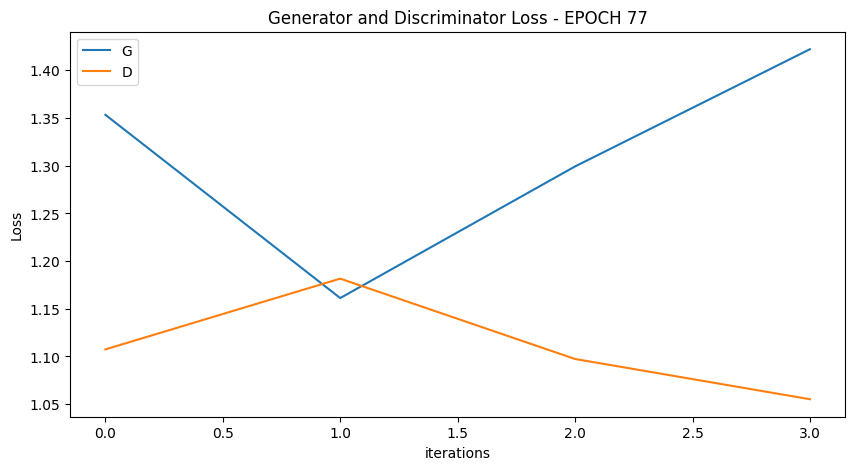

  0%|          | 0/4 [00:00<?, ?it/s]

[79/100][2/4] Loss_D: 1.2391 Loss_G: 1.2317 D(x): 0.5104 D(G(z)): 0.3913 / 0.2809
[79/100][4/4] Loss_D: 1.1565 Loss_G: 1.4528 D(x): 0.5530 D(G(z)): 0.3615 / 0.2418


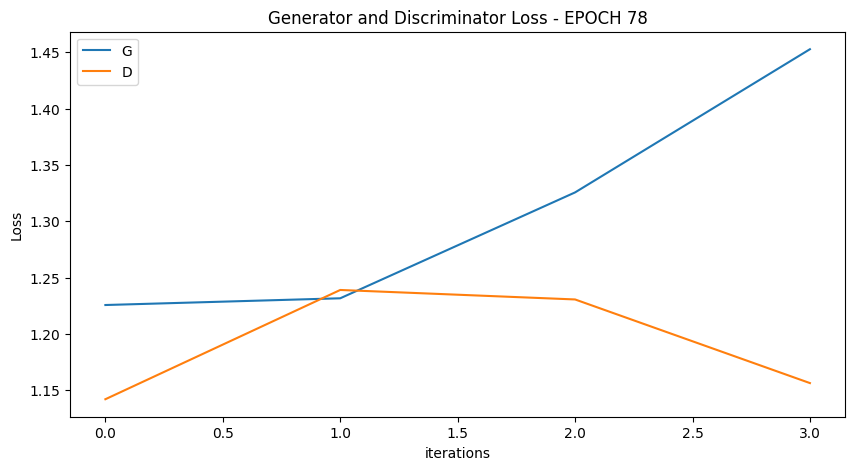

  0%|          | 0/4 [00:00<?, ?it/s]

[80/100][2/4] Loss_D: 1.0356 Loss_G: 1.5348 D(x): 0.4973 D(G(z)): 0.2535 / 0.2057
[80/100][4/4] Loss_D: 1.2527 Loss_G: 1.4253 D(x): 0.6602 D(G(z)): 0.5051 / 0.2226


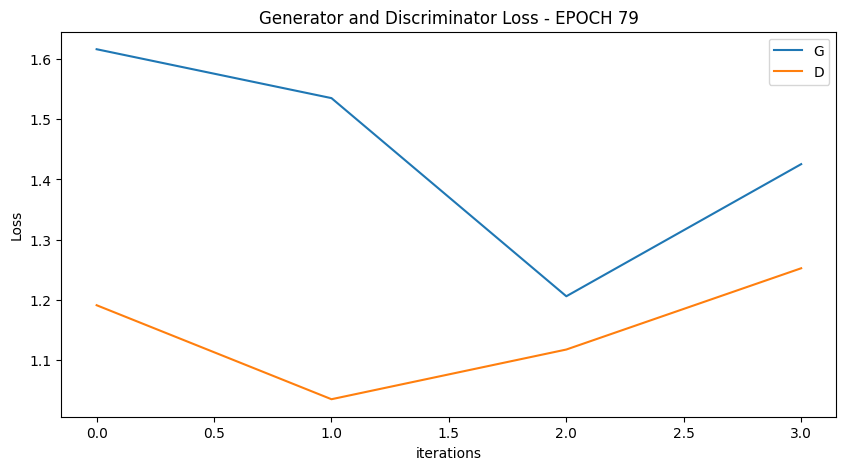

  0%|          | 0/4 [00:00<?, ?it/s]

[81/100][2/4] Loss_D: 1.4807 Loss_G: 1.2207 D(x): 0.3943 D(G(z)): 0.3633 / 0.2899
[81/100][4/4] Loss_D: 1.2042 Loss_G: 1.4822 D(x): 0.5568 D(G(z)): 0.4062 / 0.2153


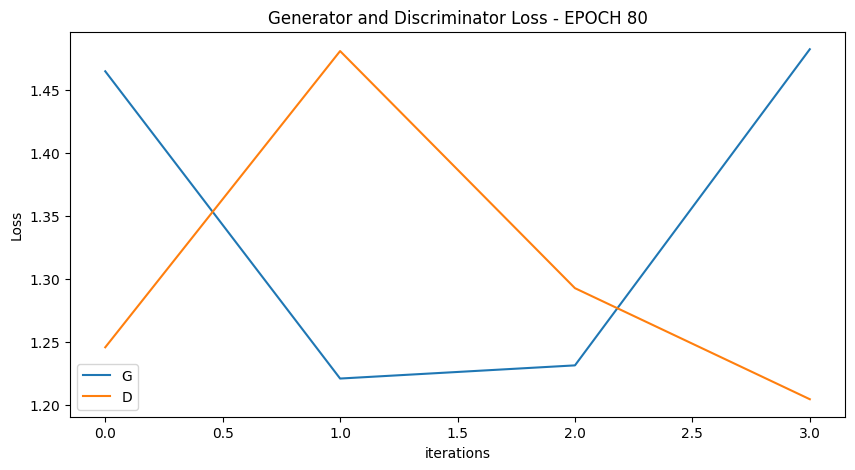

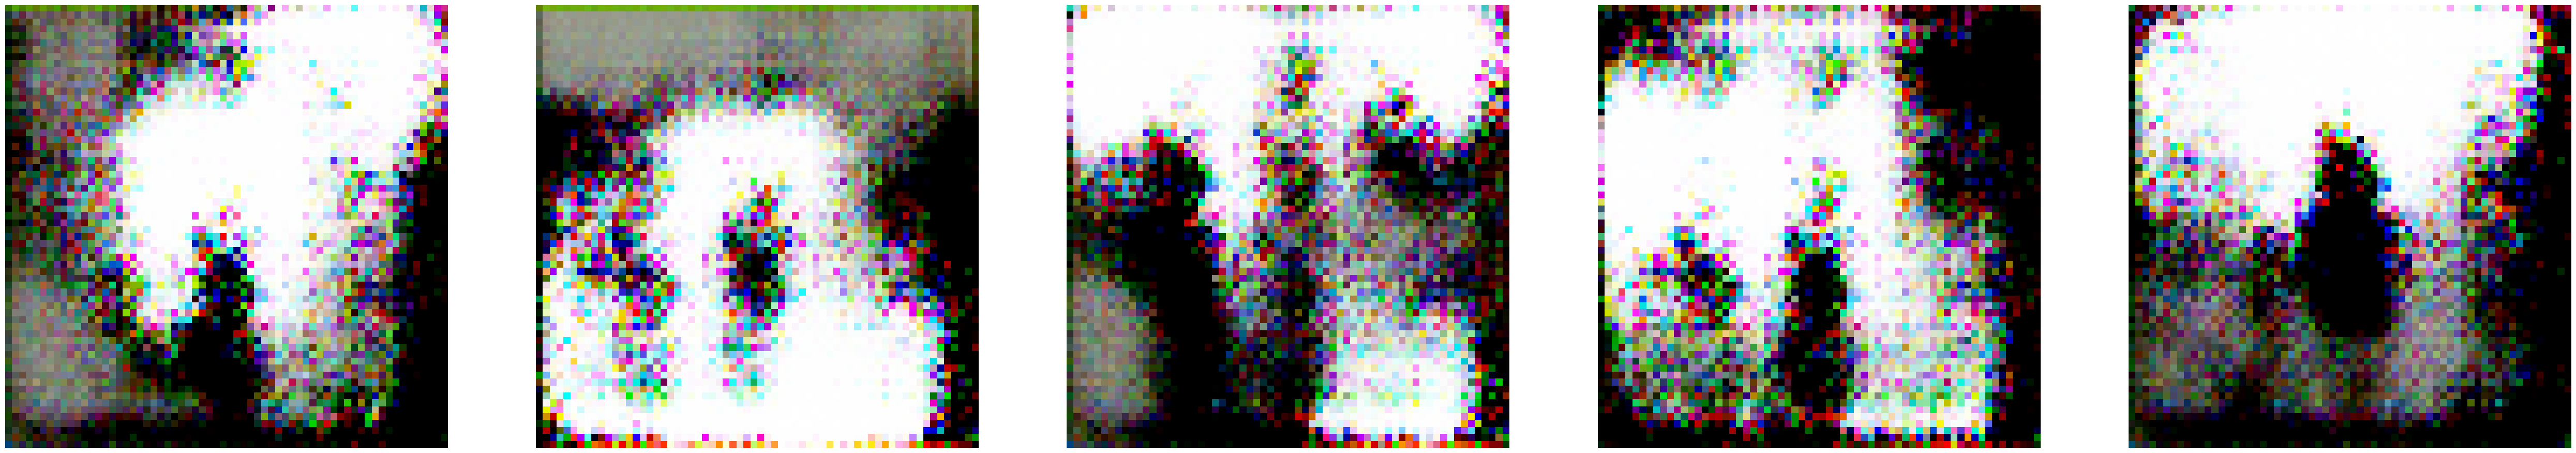

  0%|          | 0/4 [00:00<?, ?it/s]

[82/100][2/4] Loss_D: 1.0247 Loss_G: 1.5506 D(x): 0.5698 D(G(z)): 0.3124 / 0.1989
[82/100][4/4] Loss_D: 1.1809 Loss_G: 1.3182 D(x): 0.5530 D(G(z)): 0.3882 / 0.2554


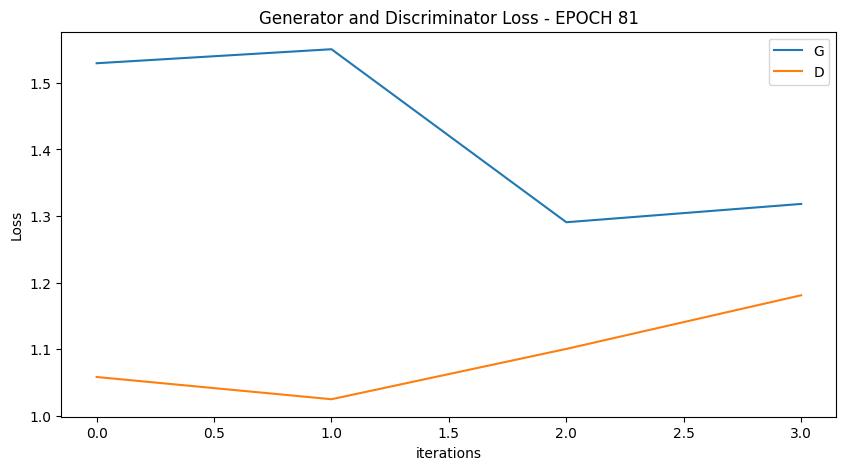

  0%|          | 0/4 [00:00<?, ?it/s]

[83/100][2/4] Loss_D: 1.1648 Loss_G: 1.8490 D(x): 0.6053 D(G(z)): 0.4034 / 0.1492
[83/100][4/4] Loss_D: 1.0578 Loss_G: 1.1750 D(x): 0.5333 D(G(z)): 0.2929 / 0.3056


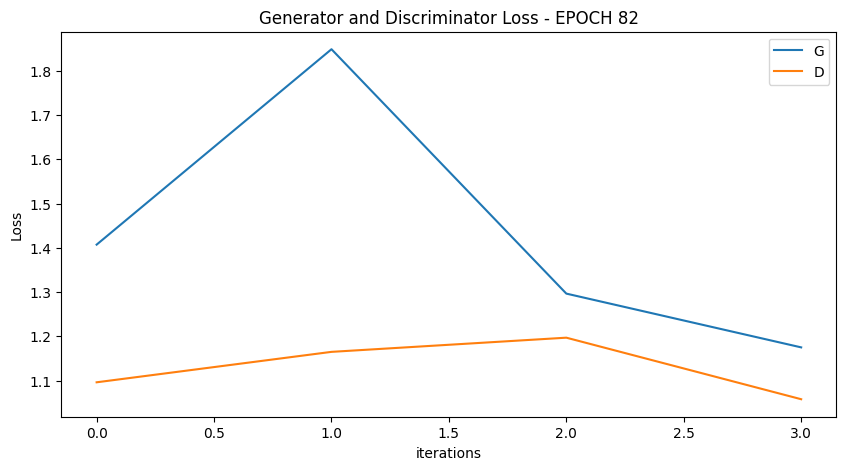

  0%|          | 0/4 [00:00<?, ?it/s]

[84/100][2/4] Loss_D: 1.1312 Loss_G: 1.5707 D(x): 0.6394 D(G(z)): 0.4196 / 0.1939
[84/100][4/4] Loss_D: 0.9948 Loss_G: 1.4006 D(x): 0.6192 D(G(z)): 0.3385 / 0.2318


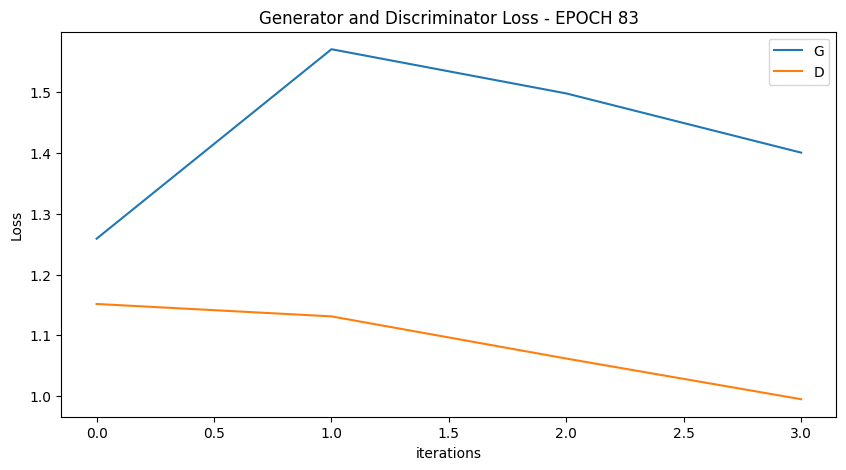

  0%|          | 0/4 [00:00<?, ?it/s]

[85/100][2/4] Loss_D: 1.2244 Loss_G: 1.3238 D(x): 0.4877 D(G(z)): 0.3518 / 0.2554
[85/100][4/4] Loss_D: 1.1385 Loss_G: 1.3957 D(x): 0.5433 D(G(z)): 0.3720 / 0.2321


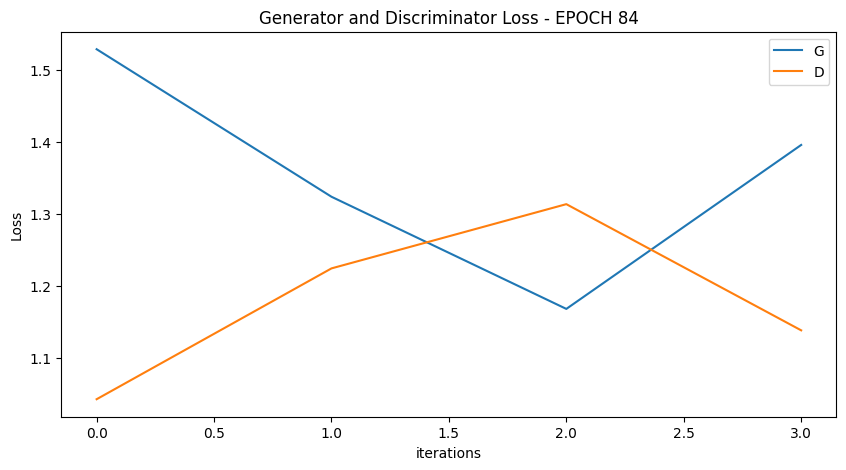

  0%|          | 0/4 [00:00<?, ?it/s]

[86/100][2/4] Loss_D: 1.0846 Loss_G: 1.4641 D(x): 0.5216 D(G(z)): 0.3115 / 0.2207
[86/100][4/4] Loss_D: 1.1519 Loss_G: 1.3940 D(x): 0.5713 D(G(z)): 0.3766 / 0.2317


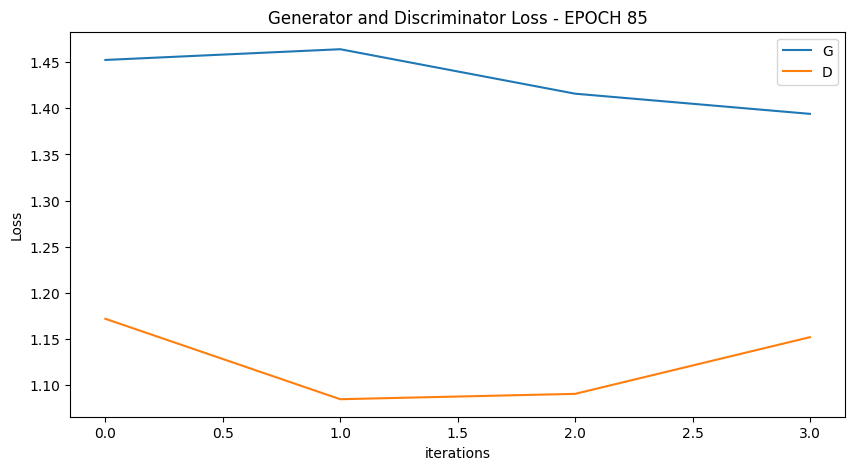

  0%|          | 0/4 [00:00<?, ?it/s]

[87/100][2/4] Loss_D: 1.1480 Loss_G: 1.2052 D(x): 0.5080 D(G(z)): 0.3369 / 0.2859
[87/100][4/4] Loss_D: 1.2810 Loss_G: 1.1603 D(x): 0.3991 D(G(z)): 0.2604 / 0.3025


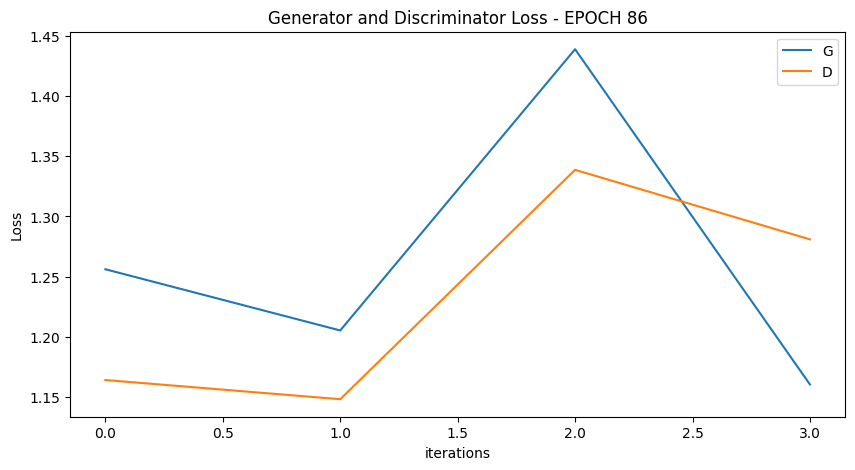

  0%|          | 0/4 [00:00<?, ?it/s]

[88/100][2/4] Loss_D: 1.0287 Loss_G: 1.3698 D(x): 0.6419 D(G(z)): 0.3806 / 0.2374
[88/100][4/4] Loss_D: 1.0645 Loss_G: 1.3521 D(x): 0.5185 D(G(z)): 0.3001 / 0.2534


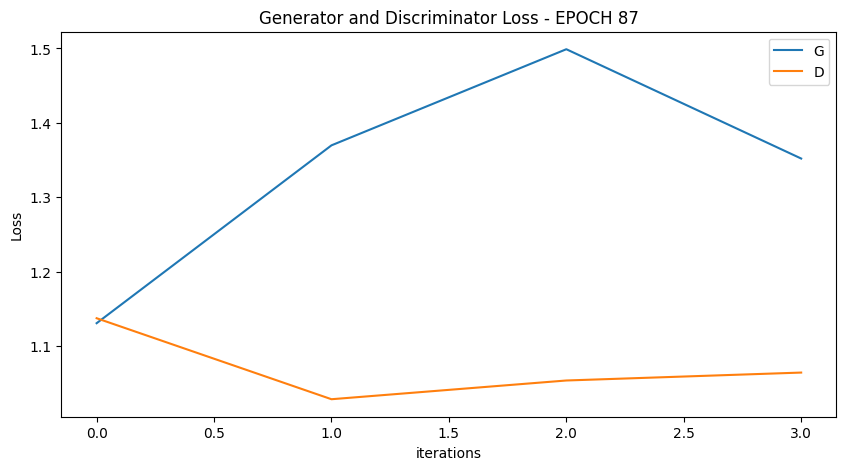

  0%|          | 0/4 [00:00<?, ?it/s]

[89/100][2/4] Loss_D: 1.1262 Loss_G: 1.3004 D(x): 0.5597 D(G(z)): 0.3600 / 0.2815
[89/100][4/4] Loss_D: 1.1706 Loss_G: 1.6437 D(x): 0.6459 D(G(z)): 0.4574 / 0.1883


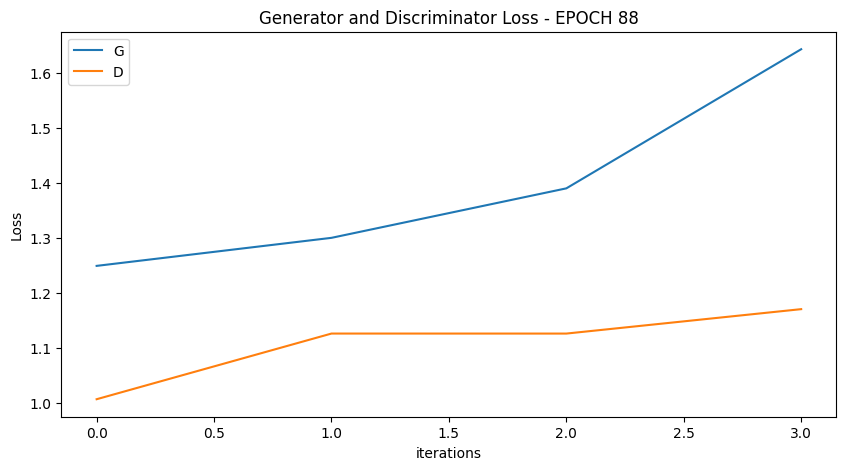

  0%|          | 0/4 [00:00<?, ?it/s]

[90/100][2/4] Loss_D: 1.3504 Loss_G: 1.2289 D(x): 0.4478 D(G(z)): 0.3876 / 0.2822
[90/100][4/4] Loss_D: 1.1964 Loss_G: 1.5886 D(x): 0.4403 D(G(z)): 0.3020 / 0.1998


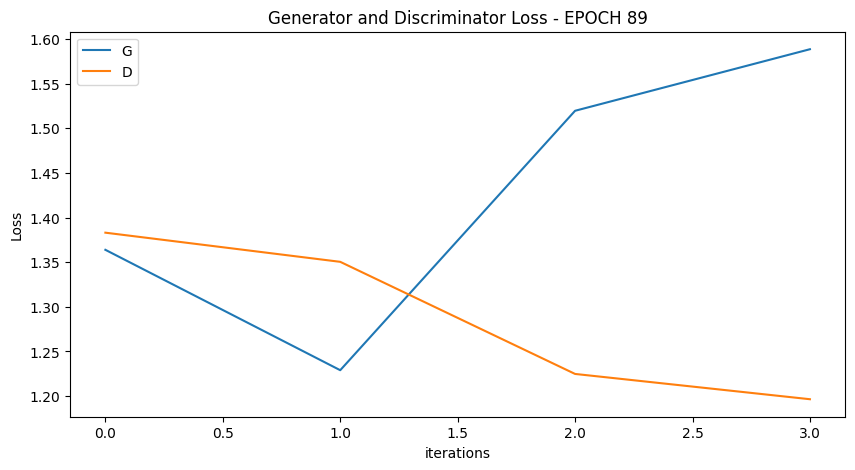

  0%|          | 0/4 [00:00<?, ?it/s]

[91/100][2/4] Loss_D: 1.1965 Loss_G: 1.3426 D(x): 0.5592 D(G(z)): 0.3873 / 0.2616
[91/100][4/4] Loss_D: 1.4749 Loss_G: 1.4256 D(x): 0.4096 D(G(z)): 0.3643 / 0.2206


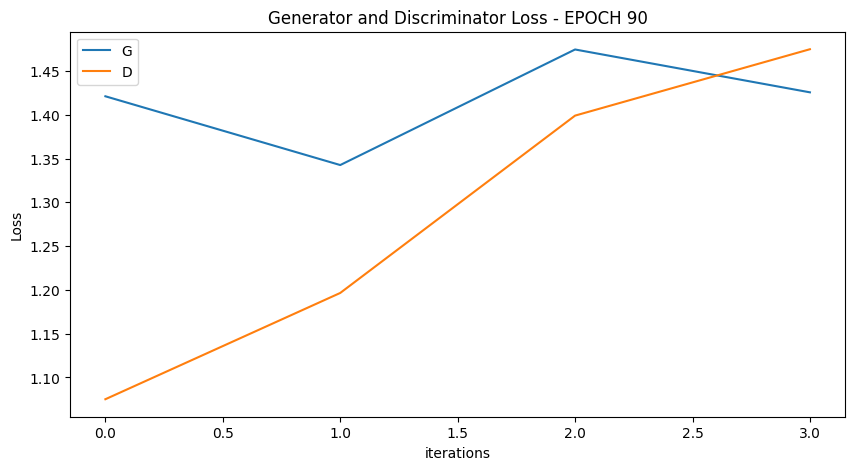

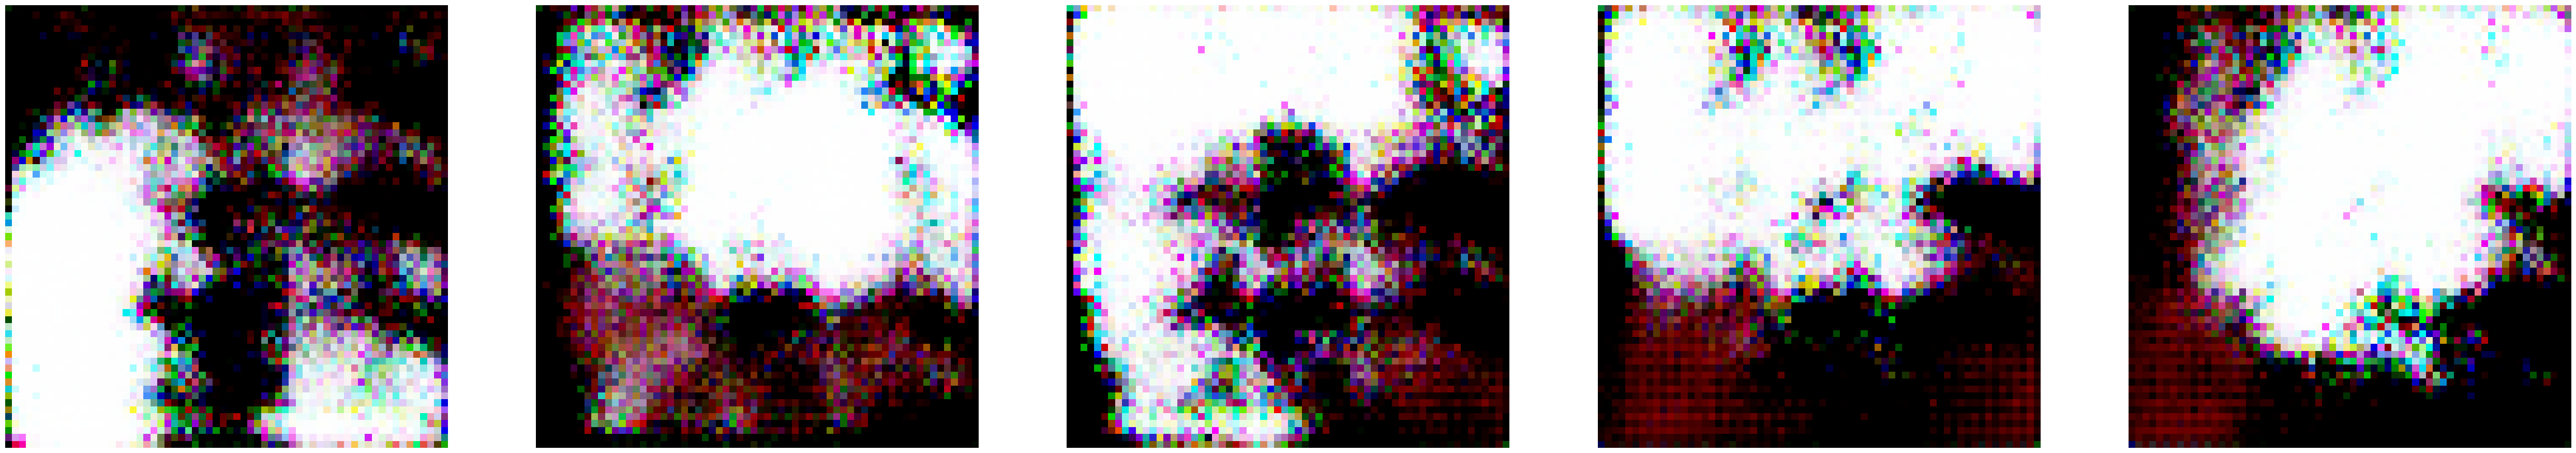

  0%|          | 0/4 [00:00<?, ?it/s]

[92/100][2/4] Loss_D: 1.2744 Loss_G: 1.4389 D(x): 0.6345 D(G(z)): 0.4859 / 0.2293
[92/100][4/4] Loss_D: 1.0934 Loss_G: 1.4381 D(x): 0.5135 D(G(z)): 0.2978 / 0.2494


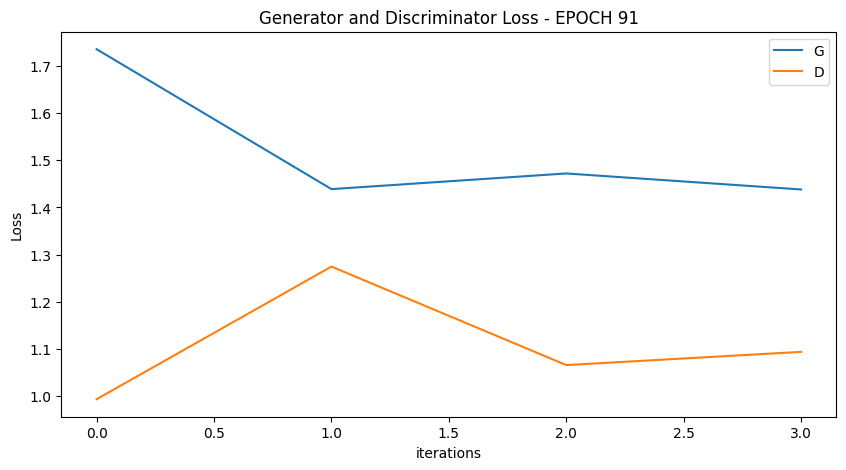

  0%|          | 0/4 [00:00<?, ?it/s]

[93/100][2/4] Loss_D: 1.2729 Loss_G: 1.5246 D(x): 0.4940 D(G(z)): 0.3795 / 0.2054
[93/100][4/4] Loss_D: 1.1261 Loss_G: 1.3218 D(x): 0.5233 D(G(z)): 0.3270 / 0.2613


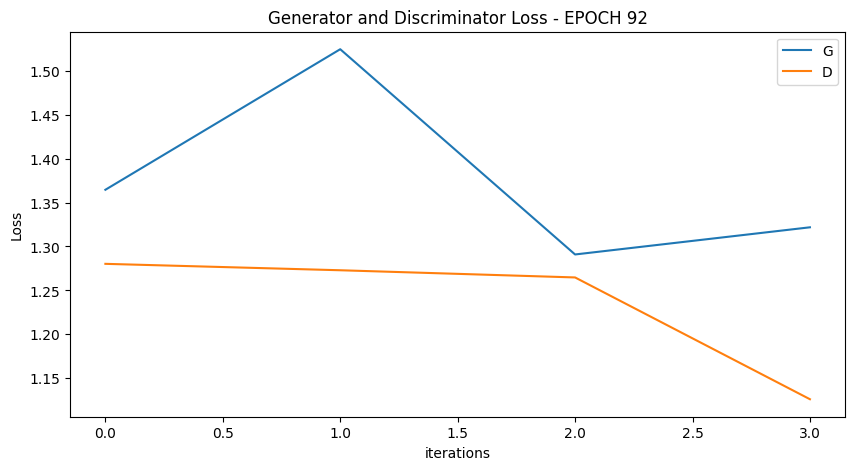

  0%|          | 0/4 [00:00<?, ?it/s]

[94/100][2/4] Loss_D: 0.8956 Loss_G: 1.6566 D(x): 0.6384 D(G(z)): 0.2935 / 0.1781
[94/100][4/4] Loss_D: 0.9692 Loss_G: 1.3083 D(x): 0.6606 D(G(z)): 0.3374 / 0.2671


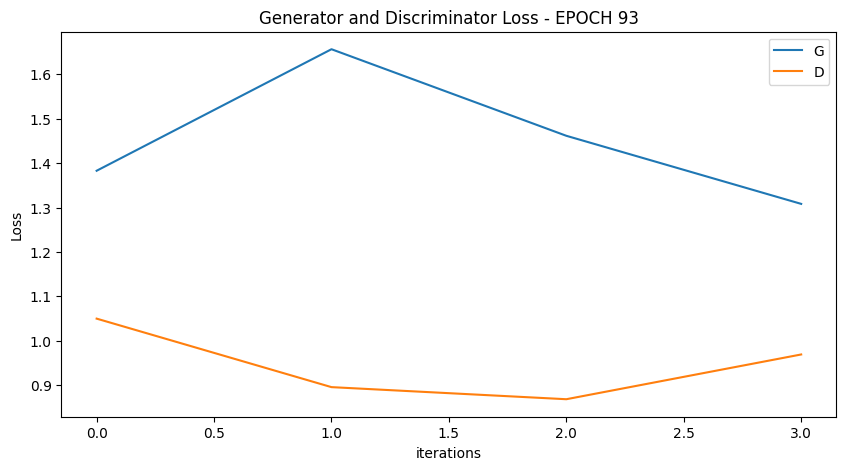

  0%|          | 0/4 [00:00<?, ?it/s]

[95/100][2/4] Loss_D: 1.0090 Loss_G: 1.6174 D(x): 0.5201 D(G(z)): 0.2558 / 0.1815
[95/100][4/4] Loss_D: 1.2959 Loss_G: 1.5629 D(x): 0.5879 D(G(z)): 0.4851 / 0.2188


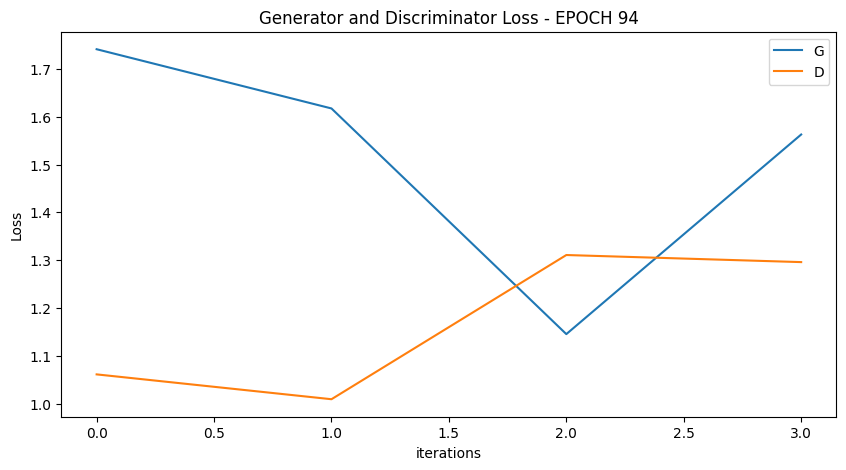

  0%|          | 0/4 [00:00<?, ?it/s]

[96/100][2/4] Loss_D: 1.0871 Loss_G: 1.5716 D(x): 0.5663 D(G(z)): 0.3414 / 0.2098
[96/100][4/4] Loss_D: 1.2864 Loss_G: 1.4692 D(x): 0.5346 D(G(z)): 0.4157 / 0.2113


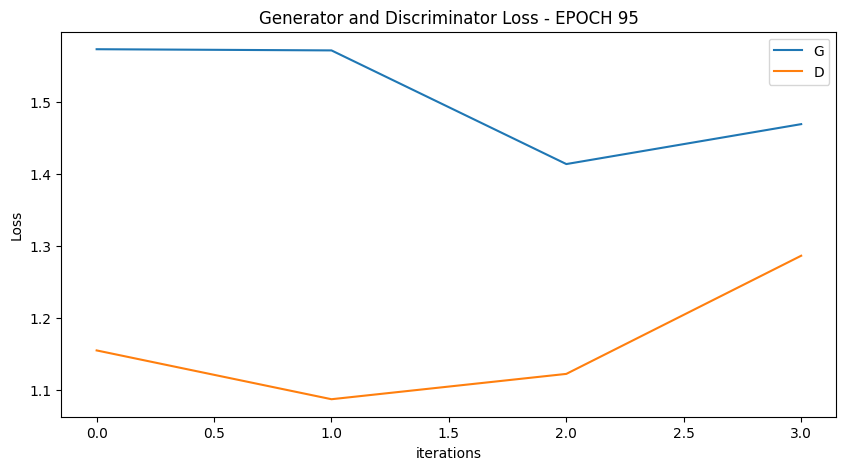

  0%|          | 0/4 [00:00<?, ?it/s]

[97/100][2/4] Loss_D: 1.0786 Loss_G: 1.4460 D(x): 0.5911 D(G(z)): 0.3569 / 0.2211
[97/100][4/4] Loss_D: 1.3363 Loss_G: 1.5180 D(x): 0.4585 D(G(z)): 0.3656 / 0.2242


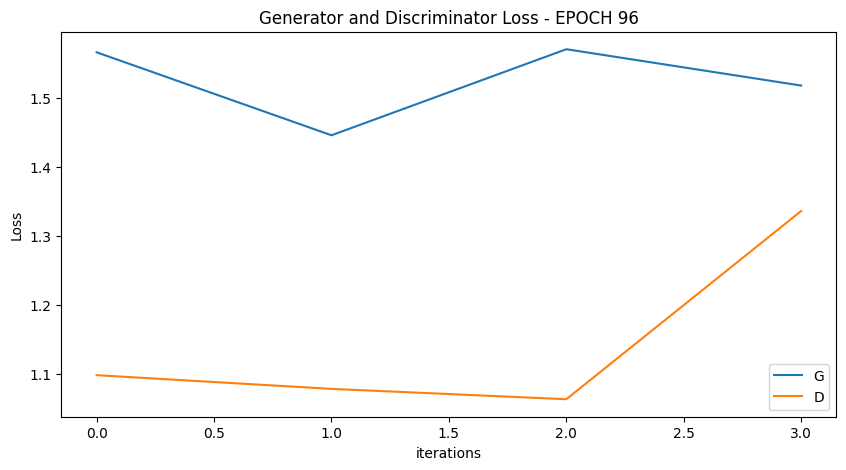

  0%|          | 0/4 [00:00<?, ?it/s]

[98/100][2/4] Loss_D: 1.3164 Loss_G: 1.5059 D(x): 0.4312 D(G(z)): 0.3582 / 0.2077
[98/100][4/4] Loss_D: 1.1444 Loss_G: 1.5282 D(x): 0.6065 D(G(z)): 0.4048 / 0.2134


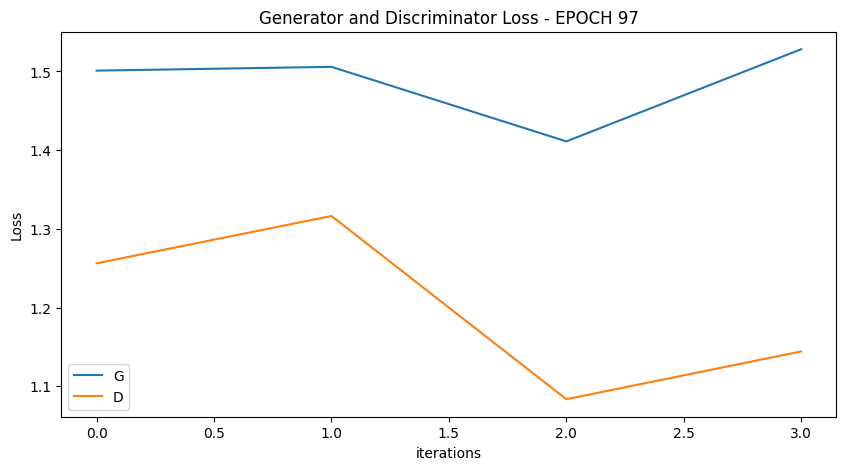

  0%|          | 0/4 [00:00<?, ?it/s]

[99/100][2/4] Loss_D: 1.2077 Loss_G: 1.2674 D(x): 0.4799 D(G(z)): 0.3365 / 0.2799
[99/100][4/4] Loss_D: 1.1090 Loss_G: 1.2927 D(x): 0.4924 D(G(z)): 0.2861 / 0.2589


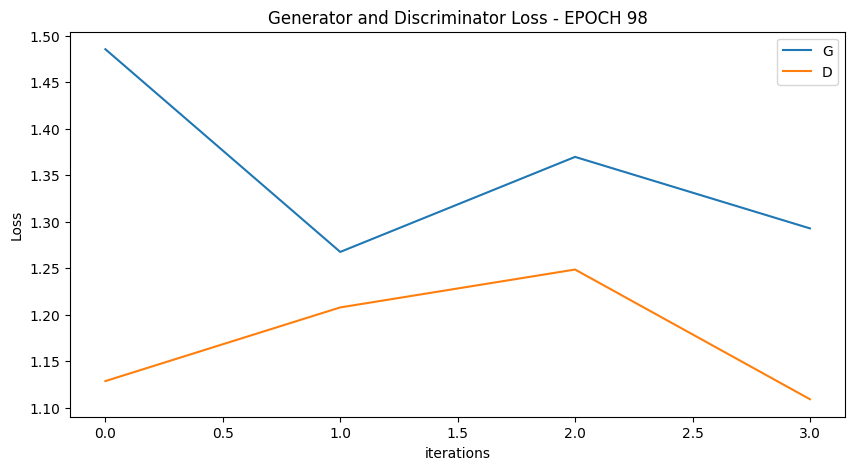

  0%|          | 0/4 [00:00<?, ?it/s]

[100/100][2/4] Loss_D: 0.9918 Loss_G: 1.7087 D(x): 0.6918 D(G(z)): 0.3832 / 0.1705
[100/100][4/4] Loss_D: 1.2365 Loss_G: 1.1512 D(x): 0.4748 D(G(z)): 0.3520 / 0.3228


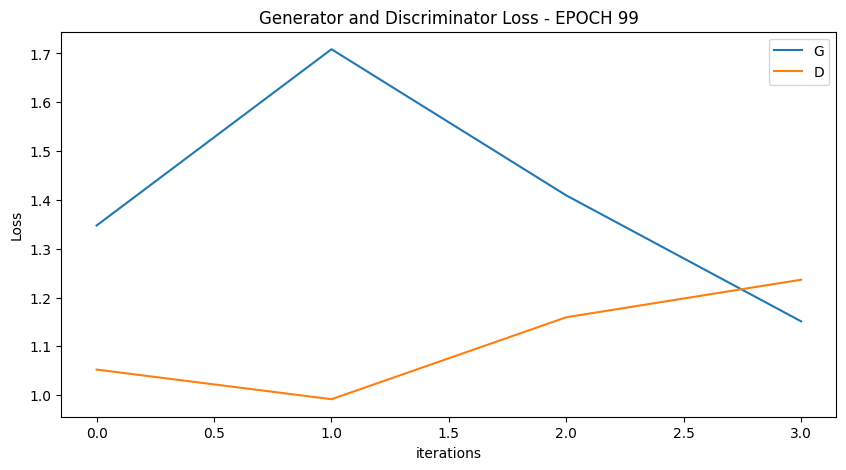

In [ ]:
for epoch in range(epochs):
    start = time.time()
    for ii, real_images in tqdm(enumerate(train_loader), total=len(train_loader)):

        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        labels.fill_(real_label)
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        G_losses.append(errG.item())
        D_losses.append(errD.item())
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)

Prikaz slika generisanih na osnovu prethodno istreniranog modela


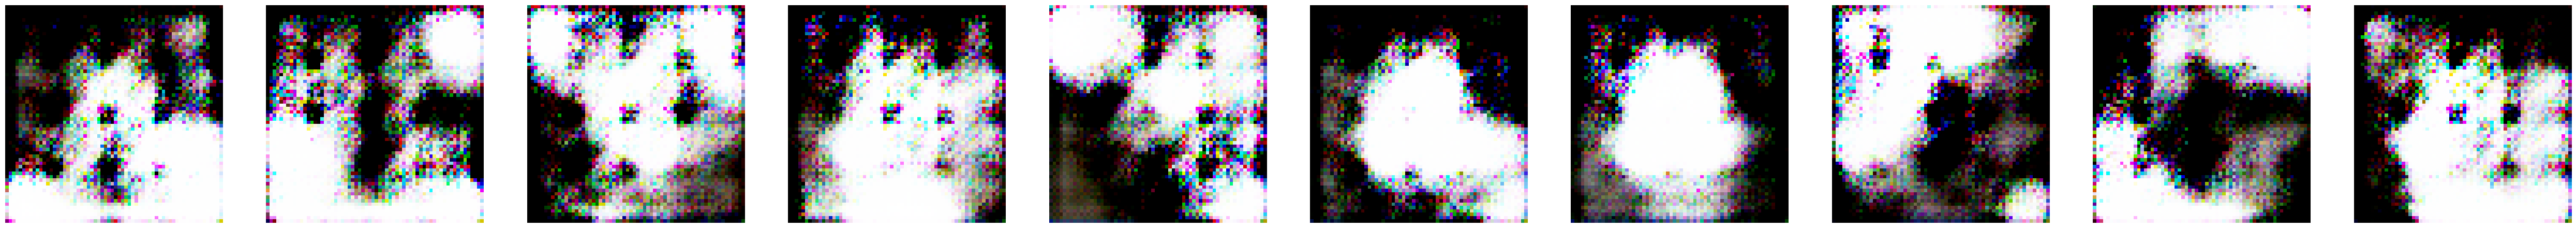

In [ ]:
# Prikaz slika generisanih na osnovu prethodno istreniranog modela
show_generated_img(10)

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    # Prikazivanje generisanih slika
    figure, axes = plt.subplots(1, len(sample), figsize=(10, 10))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    # Čuvanje generisanih slika
    output_dir = "/it32-2020/podaci/generated"
    os.makedirs(output_dir, exist_ok=True)
    for i, image in enumerate(sample):
        image_path = os.path.join(output_dir, f"generated_image_{i+1}.png")
        plt.imsave(image_path, image)
        print(f"Generisana slika {i+1} je sačuvana kao {image_path}")

    plt.show()
    plt.close()



Prikazivanje slika iz *test* foldera

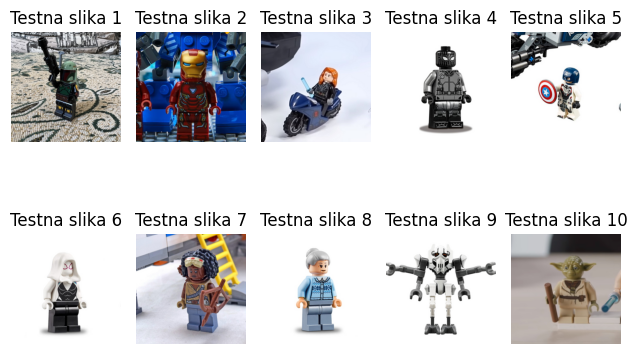

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

test_dir = "/it32-2020/podaci/test/"

# Učitavanje testnih slika iz direktorijuma
test_images = []
num_images = 10  # Broj slika za izvlačenje i prikazivanje

# Provera broja dostupnih slika u direktorijumu
num_files = len(os.listdir(test_dir))
if num_images > num_files:
    num_images = num_files

# Izvlačenje i prikazivanje testnih slika
for i, filename in enumerate(os.listdir(test_dir)):
    if i >= num_images:
        break

    img = Image.open(os.path.join(test_dir, filename))
    test_images.append(img)

    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(img)
    plt.title("Testna slika {}".format(i + 1))
    plt.axis("off")

plt.tight_layout()
plt.show()

# Prikaz testne slike i pet nasumično odabranih novih-generisanih slika

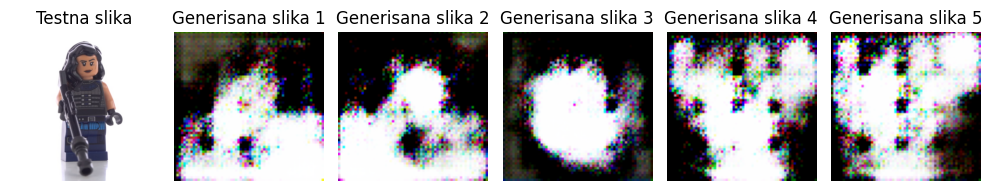

In [ ]:
import random
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

test_dir = "/it32-2020/podaci/test/"  # Putanja do direktorijuma sa testnim slikama
generated_images_dir = "/it32-2020/podaci/generated/"  # Putanja do direktorijuma za čuvanje generisanih slika

# Učitavanje slučajno odabrane testne slike
test_image_files = os.listdir(test_dir)
random_test_image_file = random.choice(test_image_files)
random_test_image = Image.open(os.path.join(test_dir, random_test_image_file))

# Generisanje i prikazivanje generisanih slika
n_images = 5
sample = []
for _ in range(n_images):
    noise = torch.randn(1, nz, 1, 1, device=device)
    gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
    gen_image = gen_image.numpy().transpose(1, 2, 0)
    sample.append(gen_image)

# Prikazivanje generisanih slika
figure, axes = plt.subplots(1, n_images+1, figsize=(10, 4))
axes[0].imshow(random_test_image)
axes[0].set_title("Testna slika")
axes[0].axis("off")

for i in range(n_images):
    axes[i+1].imshow(sample[i])
    axes[i+1].set_title(f"Generisana slika {i+1}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()


# SSIM vrednosti (Structural Similarity Index Measure) između testne slike i generisanih slika

SSIM je metrika koja se koristi za merenje sličnosti između dve slike, pri čemu se uzima u obzir strukturna sličnost, kontrast i svetlina elemenata na slikama.

SSIM vrednosti se kreću u opsegu od 0 do 1, gde vrednost 1 ukazuje na potpunu sličnost između slika, što znači da su slike identične ili izuzetno slične. Sa druge strane, vrednosti bliže nuli ukazuju na veće razlike između slika, implicirajući da su slike značajno različite. SSIM metrika uzima u obzir perceptualne karakteristike ljudskog vida i pruža bolji uvid u suptilne promene koje se dešavaju između slika u poređenju sa klasičnim metrikama poput MSE (Mean Squared Error) ili PSNR (Peak Signal-to-Noise Ratio).

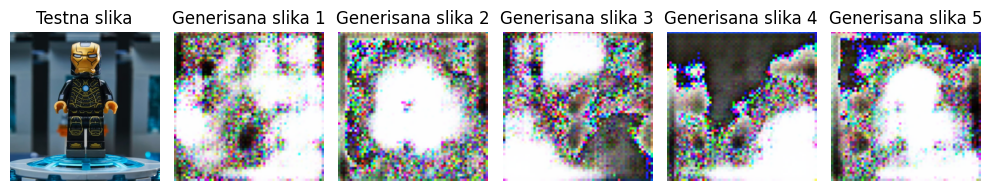

SSIM vrednosti:
Generisana slika 1: 0.1871
Generisana slika 2: 0.1569
Generisana slika 3: 0.1860
Generisana slika 4: 0.2285
Generisana slika 5: 0.1842


In [ ]:

import random
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim

test_dir = "/it32-2020/podaci/test/"  # Putanja do direktorijuma sa testnim slikama
generated_images_dir = "/it32-2020/podaci/generated/"  # Putanja do direktorijuma za čuvanje generisanih slika

# Učitavanje slučajno odabrane testne slike
test_image_files = os.listdir(test_dir)
random_test_image_file = random.choice(test_image_files)
random_test_image = Image.open(os.path.join(test_dir, random_test_image_file))
random_test_image_gray = random_test_image.convert("L")

# Generisanje i prikazivanje generisanih slika
n_images = 5
sample = []
sample_gray = []
for _ in range(n_images):
    noise = torch.randn(1, nz, 1, 1, device=device)
    gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
    gen_image = gen_image.numpy().transpose(1, 2, 0)
    gen_image = np.uint8(255 * gen_image)  # Konverzija u opseg 0-255
    gen_image_gray = Image.fromarray(gen_image).convert("L")
    gen_image_gray = gen_image_gray.resize(random_test_image_gray.size)  # Skaliranje na iste dimenzije kao testna slika
    sample.append(gen_image)
    sample_gray.append(gen_image_gray)

# Prikazivanje generisanih slika
figure, axes = plt.subplots(1, n_images+1, figsize=(10, 4))
axes[0].imshow(random_test_image)
axes[0].set_title("Testna slika")
axes[0].axis("off")

for i in range(n_images):
    axes[i+1].imshow(sample[i])
    axes[i+1].set_title(f"Generisana slika {i+1}")
    axes[i+1].axis("off")

plt.tight_layout()
plt.show()

# Računanje SSIM između testne slike i generisanih slika
ssim_scores = [ssim(np.array(random_test_image_gray), np.array(img_gray)) for img_gray in sample_gray]

# Prikazivanje rezultata
print("SSIM vrednosti:")
for i, score in enumerate(ssim_scores):
    print(f"Generisana slika {i+1}: {score:.4f}")
